In [ ]:
- [Presentation](/files/reports/presentation/2021-06-23_Soeren.pdf)

Imports

In [144]:
import IPython.core.display
import subprocess
#import csv

In [145]:
import os
import pathlib
import itertools
import string
import numpy as np
import pandas as pd
import pydna
import Bio
import Bio.SeqRecord
import Bio.Seq
import Bio.SeqFeature

In [146]:
path = os.path.abspath(os.getcwd())
path_for_utils = '../'
os.chdir(path_for_utils)
os.path.abspath(os.getcwd())

'/Users/Christine/Documents/Speciale/g8h_cpr_library'

In [147]:
#import constrain.constrain
import src.data.utils as utils
from src.data.utils import bioimager, imagingStation, nanophotometer, figures

In [148]:
os.chdir(path)
os.path.abspath(os.getcwd())

'/Users/Christine/Documents/Speciale/g8h_cpr_library/notebooks'

In [149]:
import pydna.editor
clc20 = pydna.editor.Editor("open -a CLC\ Main\ Workbench\ 20")
clc21 = pydna.editor.Editor("open -a CLC\ Main\ Workbench\ 21")
import pydna.primer
import pydna.dseqrecord
import pydna.amplify
import pydna.assembly
import pydna.gel
import pydna.ladders

In [150]:
export_csvs = True

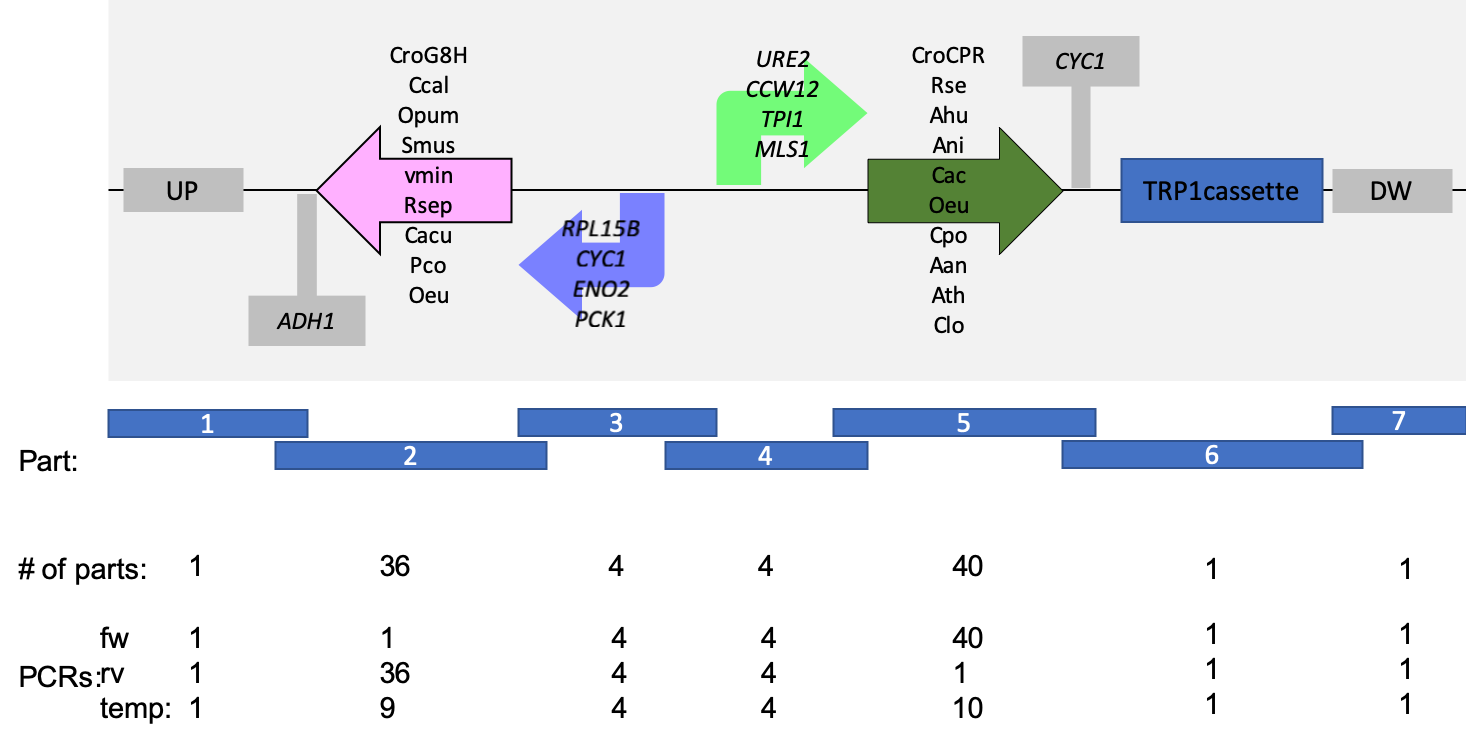

In [151]:
IPython.core.display.Image(utils.figures / 'library_design_1.png', width=600)

Note on sequence homology: 
- As G8H and CPR parts have homology this library cannot be made in one transformation. Instead should be made in 9*10 individual transformation so as not to add two G8H or CPR homologs in one transformation mixtures.

- G8H PcoG8H is not available

### What templates

In [152]:
G8H_template_names = ["pESC-CEN_RS-OeuG8H","PL_10_A1pMIA_JZ-40_CroG8H","pMIA_086_Rsep_G8O_in_p0057_(TRP)","pMIA_087_Vmin_G8O_in_p0057_(TRP)","pMIA_088_Opum_G8O_in_p0057_(TRP)","pMIA_089_Cacu_G8O_in_p0057_(TRP)","pMIA_090_Smus_G8O_in_p0057_(TRP)","pMIA_091_Ccal_G8O_in_p0057_(TRP)"]
pG8H_template_names = ['pCYC1','pENO2','pPCK1','pRPL15B']

CPR_template_names = ["pMIA_042_Cro_CPR_in_pRS415_USER_(leu)_-_TEF1","pMIA_048_(G2_Aan_CPR_(TEF1)_in_pRS415U_(LEU))","pMIA_055_ATR1_in_pRS415_USER_(leu)_-_TEF1","PL_13_E6_(pRS415U-P2_TEF1-CloCPR_opt2)","PL_13_E7_(pRS415U-P2_TEF1-RseCPR_opt2)","PL_13_E8_(pRS415U-P2_TEF1-AhuCPR_opt2)","PL_13_E9_(pRS415U-P2_TEF1-AniCPR_opt2)","PL_13_F1_(pRS415U-P2_TEF1-CacCPR_opt2)","PL_13_F2_(pRS415U-P2_TEF1-OeuCPR_opt2)","PL_13_F3_(pRS415U-P2_TEF1-CpoCPR_opt2)"]
pCPR_template_names = ['pCCW12','pMLS1','pTPI1','pURE2']

marker_template_names = ["pL_01_E8_(pRS414-USER-ccdB)"]

download

In [153]:
pG8H_templates = [utils.from_benchling(pname) for pname in pG8H_template_names]
G8H_templates = [utils.from_benchling(tname) for tname in G8H_template_names]

CPR_templates = [utils.from_benchling(tname) for tname in CPR_template_names]
pCPR_templates = [utils.from_benchling(pname) for pname in pCPR_template_names]

marker_templates = [utils.from_benchling(tname) for tname in marker_template_names]

Update template locations

In [154]:
#G8H_template_locations = ["Konrad plasmidbox_A6, Cryobox_A5", "PL_10_A1"    , "PL_13_E5"    , "lc_AT_C6"    , "lc_AT_C7"      , "lc_AT_C8"     ,"lc_AT_C9"      ,"lc_AT_D1"     ,"lc_AT_D2"]
#G8H_template_locations=["p1_H01", "p1_H02", "p1_H04", "p1_H05", "p1_H06", "p1_H07", "p1_H08", "p1_H09"]

#pG8H_template_locations = ['l4_A01'] * 4

#pCPR_template_locations = ['l4_A01'] * 4
#CPR_template_locations = ["p1_F06","p1_F07","p1_F08","p1_F09","p1_G01","p1_G02","p1_G03","p1_G04","p1_G05","p1_G06"]

#marker_cassette_template_locations = ['pL_01_E8']



Update locations

In [155]:
p_temp_loc = 'l4_A01'
#for loc, temp in zip(G8H_template_locations, G8H_templates):
    #temp.annotations['batches'] = [{'location':loc}]
    
for temp in pG8H_templates:
    temp.annotations["batches"] = [{'location':p_temp_loc, 'volume':20,'concentration:': 120}]

#for loc, temp in zip(CPR_template_locations, CPR_templates):
    #temp.annotations['location'] = loc
    
for temp in pCPR_templates:
    temp.annotations["batches"] = [{'location':p_temp_loc, 'volume':20,'concentration:': 120}]
    
for temp in marker_templates:
    temp.annotations["batches"] = [{'location':'pL_01_E8', 'volume':100,'concentration:': 40}]

'#### Template amplification sites

names

In [156]:
G8H_CDS_annotations = ["OeuG8O", "CroG8O", "Rsep_G8O_opt", "Vmin_G8O_opt", "Opum_G8O_opt", "Cacu_G8O_opt", "Smus_G8O_opt", "Ccal_G8O_opt"]
#G8H_terminator_annotations = ["T ADH1"] * 9
G8H_site_names = ["OeuG8H_tADH1", "CroG8H_tADH1", "RsepG8H_tADH", "Vmin_G8H_tADH1", "OpumG8H_tADH1", "CacuG8H_tADH1", "SmusG8_tADH1", "CcalG8_tADH1"]

pG8H_annotations = ['pCYC1','pENO2','pPCK1','pRPL15B']
pG8H_names = ['pCYC1','pENO2','pPCK1','pRPL15B']

pCPR_annotations = ['pCCW12','pMLS1','pTPI1','pURE2']
pCPR_names = ['pCCW12','pMLS1','pTPI1','pURE2']

CPR_CDS_annotations = ['Cro CPR', 'Aan CPR', 'ATR1 Arabidopsis CPR','CloCPR_opt2','RseCPR_opt2','AhuCPR_opt2','AniCPR_opt2','CacCPR_opt2','OeuCPR_opt2','CpoCPR_opt2']
#CPR_terminator_annotations = ["T CYC1"] * 10
CPR_site_names = ['CroCPR_tCYC1', 'AanCPR_tCYC1', 'AraCPR_tCYC1','CloCPR_tCYC1','RseCPR_tCYC1','AhuCPR_tCYC1','AniCPR_tCYC1','CacCPR_tCYC1','OeuCPR_tCYC1','CpoCPR_tCYC1']

marker_cassette_annotations = ["TRP1_marker"]
marker_cassette_names = ["cTRP1"]
#marker_cassette_site_names = ["TRP1casette"]

download

In [157]:
#strain: "BY4742" or "CENPK113-7d"
#isite_names: pd.read_csv("gRNAtable.csv", index_col="name")
UP_sites, DW_sites = utils.UPandDW(strain = "CENPK113-7d",isite_name="XI-2")
UP_sites[0].annotations['batches'] = [{'location':'l4_A01', 'volume':20,'concentration:': 120}]
DW_sites[0].annotations['batches'] = [{'location':'l4_A01', 'volume':20,'concentration': 120}]

extract sites

In [158]:
G8H_sites = utils.extract_template_amplification_sites1(G8H_templates, G8H_CDS_annotations, "T ADH1")
pG8H_sites =  utils.extract_sites1(pG8H_annotations, pG8H_templates, pG8H_names)
pG8H_sites =[site.reverse_complement(annotations=True,name=True) for site in pG8H_sites]

CPR_sites = utils.extract_template_amplification_sites1(CPR_templates, CPR_CDS_annotations, "T CYC1")
pCPR_sites = utils.extract_sites1(pCPR_annotations, pCPR_templates, pCPR_names)

marker_sites = utils.extract_sites1(marker_cassette_annotations, marker_templates, marker_cassette_names)

In [159]:
for site in marker_sites:
    print(site.annotations['batches'])

[{'location': 'pL_01_E8', 'volume': 100, 'concentration:': 40}]


Update site names

In [160]:
for name, site in zip(G8H_site_names, G8H_sites):
    site.name = name
for name, site in zip(pG8H_names, pG8H_sites):
    site.name = name
    
for name, site in zip(CPR_site_names, CPR_sites):
    site.name = name
for name, site in zip(pCPR_names, pCPR_sites):
    site.name = name

for name, site in zip(marker_cassette_names, marker_sites):
    site.name = name

'#### Determine primer sequences

from:  fragment list (7) containing parts lists (1,9,4,4,10,1,1 or variable) 

to  :  combinations list 7 fragments * x combinations (1440 or variable; matrix)

In [161]:
#Create a list of fragments within a list of parts.
fragment_list = [UP_sites,G8H_sites,pG8H_sites,pCPR_sites,CPR_sites,marker_sites,DW_sites]
#fragment_list = [[UP_sites[0]],[G8H_sites[1]],pG8H_sites,pCPR_sites,[CPR_sites[0]],[marker_sites[0]],[DW_sites[0]]]

#The number of fragments to be assembled
no_frags = len(fragment_list)
print("Number of fragments:", no_frags)

#The number of parts of each fragment
no_parts = [len(l) for l in fragment_list]
print("Number of parts: ",no_parts)

#The number of possible combinations
no_combs = utils.multiplyList(no_parts)
print("Number of possible combinations:",no_combs)

#How many repitions are needed?
repetition_list = [int(no_comb/no_part) for no_comb, no_part in zip([no_combs]*len(no_parts),no_parts)]
print("The number of time each fragment must be repeated:", repetition_list)

#Matrix with all combinations
print("\nCombinations:")
combinations_matrix = [t for t in itertools.product(*fragment_list)]
for row in combinations_matrix:
    names = []
    for element in row:
        names.append(element.name)
    #print(names)

Number of fragments: 7
Number of parts:  [1, 8, 4, 4, 10, 1, 1]
Number of possible combinations: 1280
The number of time each fragment must be repeated: [1280, 160, 320, 320, 128, 1280, 1280]

Combinations:


Determine fw, rv primer pair for each part i.e.

From: combinations matrix

To  : primers matrix of tuples (fw,rv)

In [162]:
lea_primers = pd.read_excel("../data/raw/G8H_CPR_library.xls", sheet_name = "all primers").reset_index(drop=True)
lea_primers.head()

Id            Name  \
0  3460  PR_UP_tADH1_05   
1  3461  PR_UP_tADH1_06   
2  3407       PR_G8H_01   
3  3408       PR_G8H_02   
4  3409       PR_G8H_03   

                                                                                                                 Target Parts  \
0                                                                                                                     XI-2_UP   
1                                                                                                                     XI-2_UP   
2  VminG8H_tADH1,SmusG8H_tADH1,RsepG8H_tADH1,CacuG8H_tADH1,OpumG8H_tADH1,CroG8H_tADH1,PcoG8H_tADH1,OeuG8H_tADH1,CcalG8H_tADH1   
3                                                                                                    VminG8H_tADH1,TIS_AAAACA   
4                                                                                                    VminG8H_tADH1,TIS_AAAACA   

   Size  Cost      Tm  Tm (3' only)    Sequence (3' only)  \
0    22   2.2  58.178        58.178    GAGGATTTTCGATGGAGC   
1    64   6.4  69.335        57.264     TTGTGGAAGTTCATGGC   
2    19   1.9  57.335        57.335   GAGCGACCTCATGCTATAC   
3    62   6.2  63.653        57.979  ATGGATTACTTGACGATCGC   
4    61   6.1  64.693        57.979  ATGGATTACTTGACGATCGC   

                                                         Sequence Location  
0                                              GAGGATTTTCGATGGAGC   o2_I06  
1       TAGGTCAGGTTGCTTTCTCAGGTATAGCATGAGGTCGCTCTTGTGGAAGTTCATGGC   o2_I07  
2                                             GAGCGACCTCATGCTATAC  op4_A10  
3  AGACACACAAACACAAATACACACACTAAATTAATAAAAACAATGGATTACTTGACGATCGC  op4_A01  
4   ACACCAAGCAACTAATACTATAACATACAATAATAAAAACAATGGATTACTTGACGATCGC  op4_B01

In [163]:
lea_parts = pd.read_excel("../data/raw/G8H_CPR_library.xls", sheet_name = "all parts").reset_index(drop=True)
lea_parts.head()

Overlaps_to  order Part Promoter    Id        Name Note  Forward Oligo Id  \
0       pCYC1      1  NaN      NaN  2339  PCR_G8H_01  PCR              3407   
1       pENO2      2  NaN      NaN  2340  PCR_G8H_02  PCR              3407   
2       pPCK1      3  NaN      NaN  2341  PCR_G8H_03  PCR              3407   
3     pRPL15B      4  NaN      NaN  2342  PCR_G8H_04  PCR              3407   
4       pCYC1      5  NaN      NaN  2343  PCR_G8H_05  PCR              3407   

  Forward Oligo Name  Reverse Oligo Id Reverse Oligo Name  Oligo Mean Tm  \
0          PR_G8H_01              3408          PR_G8H_02         60.494   
1          PR_G8H_01              3409          PR_G8H_03         61.014   
2          PR_G8H_01              3410          PR_G8H_04         62.060   
3          PR_G8H_01              3411          PR_G8H_05         63.629   
4          PR_G8H_01              3412          PR_G8H_06         60.578   

   Mean Oligo Tm (3' only)  Delta Oligo Tm  Delta Oligo Tm (3' only)  \
0                  57.6570           6.318                     0.644   
1                  57.6570           7.358                     0.644   
2                  57.6570           9.450                     0.644   
3                  57.6570          12.588                     0.644   
4                  57.6595           6.486                     0.649   

   Primary Template Id Primary Template Name  Secondary Template Id  \
0                14590         VminG8H_tADH1                    NaN   
1                14590         VminG8H_tADH1                    NaN   
2                14590         VminG8H_tADH1                    NaN   
3                14590         VminG8H_tADH1                    NaN   
4                14591         SmusG8H_tADH1                    NaN   

   Secondary Template Name  Q5_fw_tm  Q5_rv_tm  Q5_ta  Length  \
0                      NaN        62        62     63    1845   
1                      NaN        62        62     63    1844   
2                      NaN        62        62     63    1841   
3                      NaN        62        62     63    1839   
4                      NaN        62        62     63    1851   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [164]:
#Initialize matrix
primer_matrix = [[] for i in range(no_combs)]
for comb_no in range(0, no_combs):
    for frag_no in range(0, no_frags):
        comb_seq = str(combinations_matrix[comb_no][frag_no].seq.upper())
        #print(combinations_matrix[comb_no][frag_no].name)
        #print(comb_seq)
        if frag_no == 1:
            idx = frag_no + 1
        elif frag_no == 4:
            idx = frag_no - 1
        else:
            idx  = frag_no
        
        if idx != frag_no:
            name = combinations_matrix[comb_no][idx].name
            true_false = np.logical_and(lea_parts['Sequence'].str.contains(comb_seq), lea_parts['Overlaps_to'] == name)
        else:
            true_false = lea_parts['Sequence'].str.contains(comb_seq)
        
        #print(true_false.value_counts())

        comb_seq_idx = lea_parts[true_false].index
        #print(comb_seq_idx)

        forward_primer_name = lea_parts.loc[comb_seq_idx,['Forward Oligo Name']].values[0][0]
        reverse_primer_name = lea_parts.loc[comb_seq_idx,['Reverse Oligo Name']].values[0][0]
        
        forward_primer_idx  = lea_primers[lea_primers['Name'] == forward_primer_name].index
        forward_seq         = lea_primers.loc[forward_primer_idx,['Sequence']].values[0][0]
        forward_loc         = lea_primers.loc[forward_primer_idx,['Location']].values[0][0]
        forward_primer      = pydna.primer.Primer(pydna.dseqrecord.Dseqrecord(forward_seq, id = forward_primer_name))
        #forward_primer.annotations['location'] = forward_loc
        forward_primer.annotations['batches'] = []
        forward_primer.annotations['batches'].append({'location'      : forward_loc,
                                                      'volume'        : 100,
                                                      'concentration' : 10})
        reverse_primer_idx  = lea_primers[lea_primers['Name'] == reverse_primer_name].index
        reverse_seq         = lea_primers.loc[reverse_primer_idx,['Sequence']].values[0][0]
        reverse_loc         = lea_primers.loc[reverse_primer_idx,['Location']].values[0][0]
        reverse_primer      = pydna.primer.Primer(pydna.dseqrecord.Dseqrecord(reverse_seq, id = reverse_primer_name))
        #reverse_primer.annotations['location'] = reverse_loc
        reverse_primer.annotations['batches'] = []
        reverse_primer.annotations['batches'].append({'location'      : reverse_loc,
                                                      'volume'        : 100,
                                                      'concentration' : 10})
        
        primer_matrix[comb_no].append((forward_primer, reverse_primer))

Validate primer matrix by printing

In [165]:
primer_matrix_reshaped = [list(x) for x in zip(*primer_matrix)]

In [166]:
for frag_no, frag in enumerate(primer_matrix_reshaped):
    print("All primer pairs for fragment no: " + str(frag_no))
    #for frag_primer_pair in frag:
        #print(frag_primer_pair[0].id, "\t", frag_primer_pair[1].id)
    #print()

All primer pairs for fragment no: 0
All primer pairs for fragment no: 1
All primer pairs for fragment no: 2
All primer pairs for fragment no: 3
All primer pairs for fragment no: 4
All primer pairs for fragment no: 5
All primer pairs for fragment no: 6


Validate primer matrix by printing only different primers

In [167]:
primer_matrix_reshaped_no_duplicates = [utils.removeTupleDuplicates(lst) for lst in primer_matrix_reshaped]

In [168]:
len(primer_matrix_reshaped_no_duplicates[1])

32

In [169]:
for frag_no, frag in enumerate(primer_matrix_reshaped_no_duplicates):
    print("All primer pairs for fragment no: " + str(frag_no))
    #for frag_primer_pair in frag:
        #print(frag_primer_pair[0].id, "\t", frag_primer_pair[1].id)
    #print()

All primer pairs for fragment no: 0
All primer pairs for fragment no: 1
All primer pairs for fragment no: 2
All primer pairs for fragment no: 3
All primer pairs for fragment no: 4
All primer pairs for fragment no: 5
All primer pairs for fragment no: 6


Comments.
- All primer pairs for CPR contains 36 and not 40 pairs. This is because the four primers for RseCPR, CloCPR have the same sequence and the 4 and can be reused.
- Missing PR_CPR_05. Copy of PR_CPR_02 with additional t. Designed by mistake due to additional tCYC1 bp in template

In [170]:
lists_of_primers = []
# For each frag lst
for frag_no in range(0, no_frags):
    #From: list of tuples 
    #To  : list
    primers_tp = primer_matrix_reshaped_no_duplicates[frag_no]
    primers = [item for t in primers_tp for item in t]
    
    # From: list of primer
    # To: list of primers without sequence duplicates
    primers_no_dup = utils.recs_no_duplicates(primers)
    
    lists_of_primers.append(primers_no_dup)

In [171]:
primers = [item for sublist in lists_of_primers for item in sublist]
len(primers)

92

In [172]:
for primer in primers:
    print(primer.id, "\t", primer.annotations['batches'][0]['location'])

PR_UP_tADH1_05 	 o2_I06
PR_UP_tADH1_06 	 o2_I07
PR_G8H_01 	 op4_A10
PR_G8H_11 	 op4_B03
PR_G8H_14 	 op4_A04
PR_G8H_24 	 op4_C06
PR_G8H_37 	 op4_D09
PR_G8H_05 	 op4_D01
PR_G8H_33 	 op4_D08
PR_G8H_19 	 op4_B05
PR_G8H_13 	 op4_D03
PR_G8H_20 	 op4_C05
PR_G8H_03 	 op4_B01
PR_G8H_31 	 op4_B08
PR_G8H_32 	 op4_C08
PR_G8H_22 	 op4_A06
PR_G8H_30 	 op4_A08
PR_G8H_23 	 op4_B06
PR_G8H_08 	 op4_C02
PR_G8H_34 	 op4_A09
PR_G8H_12 	 op4_C03
PR_G8H_02 	 op4_A01
PR_G8H_36 	 op4_C09
PR_G8H_15 	 op4_B04
PR_G8H_21 	 op4_D05
PR_G8H_16 	 op4_C04
PR_G8H_25 	 op4_D06
PR_G8H_06 	 op4_A02
PR_G8H_07 	 op4_B02
PR_G8H_35 	 op4_B09
PR_G8H_09 	 op4_D02
PR_G8H_10 	 op4_A03
PR_G8H_04 	 op4_C01
PR_G8H_17 	 op4_D04
PR_G8H_18 	 op4_A05
PR_PRO_13 	 op4_G11
PR_PRO_14 	 op4_G12
PR_PRO_15 	 op4_H11
PR_PRO_16 	 op4_H12
PR_PRO_11 	 op4_F11
PR_PRO_12 	 op4_F12
PR_PRO_01 	 op4_A11
PR_PRO_02 	 op4_A12
PR_PRO_09 	 op4_E11
PR_PRO_10 	 op4_E12
PR_PRO_07 	 op4_D11
PR_PRO_08 	 op4_D12
PR_PRO_05 	 op4_C11
PR_PRO_06 	 op4_C12
PR_PRO_03 	 

### Primers (order)
- add primers to storage digitally
- receive primers, dissolve to 10 μM, note volume
- add primers to storage physical

### PCRs

- Simulate amplicons
- Add amplicons to to storage digitally
- Create pcrs, purify, estimate concentration and volume
- Add pcrs concentration and volume to storage digitally (Benchling batch information)
- Add pcrs to storage physical
- Retrieve pcrs concentration and volume from Benchling
- Restructure amplicons matrix to list of amplicons and amplicons

#### Simulate amplicons

In [173]:
combinations_matrix[0][0].name

'XI-2UP'

In [174]:
#Initizalise
amplicon_matrix = [[] for i in range(no_combs)]

for comb_no in range(0, no_combs):
    for frag_no in range(0, no_frags):
        template       = pydna.dseqrecord.Dseqrecord(combinations_matrix[comb_no][frag_no])

        forward_primer = primer_matrix[comb_no][frag_no][0]
        reverse_primer = primer_matrix[comb_no][frag_no][1]
        
        amplicon = pydna.amplify.pcr(forward_primer, reverse_primer,  template)
        
        amplicon.annotations['template_name'] = template.name
        #print(amplicon.annotations, template.annotations)
        #amplicon.annotations['template_location'] = template.annotations['batches'][0]['location']
        
        comb_seq = amplicon.seq.watson.upper()
        true_false = lea_parts['Sequence'].str.contains(comb_seq)
        comb_seq_idx = lea_parts[true_false].index
        
        amplicon_name  = lea_parts.loc[comb_seq_idx,['Name']].values[0][0]
        amplicon.name = amplicon_name
        
        amplicon_loc  = lea_parts.loc[comb_seq_idx,['Location']].values[0][0]
        amplicon_vol  = lea_parts.loc[comb_seq_idx,['volume']].values[0][0]
        amplicon_con  = lea_parts.loc[comb_seq_idx,['concentration']].values[0][0]
        amplicon.annotations['batches'] = []
        amplicon.annotations['batches'].append(  {'location'      : amplicon_loc,
                                                  'volume'        : amplicon_vol,
                                                  'concentration' : amplicon_con})
        
        amplicon.forward_primer.annotations['tm Q5 Hot Start'] = lea_parts.loc[comb_seq_idx,['Q5_fw_tm']].values[0][0]
        amplicon.reverse_primer.annotations['tm Q5 Hot Start'] = lea_parts.loc[comb_seq_idx,['Q5_rv_tm']].values[0][0]
        amplicon.annotations['ta Q5 Hot Start'] = lea_parts.loc[comb_seq_idx,['Q5_ta']].values[0][0]
        
        ## Remove additional wrong primer annotation added by pydna.amplify.pcr
        amplicon.features = [feat for feat in amplicon.features if feat.type != "primer_bind"]
        
        utils.seq_to_annotation(amplicon, amplicon, "PCR_product")
        utils.seq_to_annotation(forward_primer, amplicon, "primer_bind")
        utils.seq_to_annotation(reverse_primer, amplicon, "primer_bind")
        
        amplicon_matrix[comb_no].append(amplicon)

        #print(comb_seq)


In [175]:
amplicon_matrix[0][6].annotations['batches']

[{'location': 'l5_I09', 'volume': 100.0, 'concentration': 40.0}]

In [176]:
for amp in amplicon_matrix[0]:
    print(amp.name)
    print(amp.annotations['batches'])
    print(amp.template.annotations['batches'])
    print()

PCR_UP_tADH1_01
[{'location': 'l5_I08', 'volume': 100.0, 'concentration': 30.0}]
[{'location': 'l4_A01', 'volume': 20, 'concentration:': 120}]

PCR_G8H_29
[{'location': 'l5_D04', 'volume': 100.0, 'concentration': 30.0}]
[{'box': 'p1', 'position': 'h1', 'volume': 100, 'concentration': 70, 'location': 'p1_h1'}]

PCR_PRO_01
[{'location': 'l4_C07', 'volume': 100.0, 'concentration': 100.0}]
[{'location': 'l4_A01', 'volume': 20, 'concentration:': 120}]

PCR_PRO_02
[{'location': 'l4_C08', 'volume': 100.0, 'concentration': 100.0}]
[{'location': 'l4_A01', 'volume': 20, 'concentration:': 120}]

PCR_CPR_31
[{'location': 'l5_E06', 'volume': 100.0, 'concentration': 30.0}]
[{'box': 'p1', 'position': 'f6', 'volume': 30, 'concentration': 470, 'location': 'p1_f6'}]

PCR_TRP1-DW_01
[{'location': 'l5_I07', 'volume': 100.0, 'concentration': 155.0}]
[{'location': 'pL_01_E8', 'volume': 100, 'concentration:': 40}]

PCR_TRP1-DW_02
[{'location': 'l5_I09', 'volume': 100.0, 'concentration': 40.0}]
[{'location': 

In [177]:
#for comb_no in range(0, no_combs):
#    for frag_no in range(0, no_frags):
#        if amplicon_matrix[comb_no][frag_no].name == 'PCR_UP_tADH1_01':
#            amplicon_matrix[comb_no][frag_no].annotations['batches'][0]['concentration'] = 30
#        elif amplicon_matrix[comb_no][frag_no].name == 'PCR_TRP1-DW_02':
#            amplicon_matrix[comb_no][frag_no].annotations['batches'][0]['concentration'] = 155
#        elif amplicon_matrix[comb_no][frag_no].name == 'PCR_TRP1-DW_01':
#            amplicon_matrix[comb_no][frag_no].annotations['batches'][0]['concentration'] = 40
            

Validate amplicon matrix by printing

In [178]:
amplicon_matrix_reshaped = [list(x) for x in zip(*amplicon_matrix)]

In [179]:
#for frag_list_no, frag_list in enumerate(amplicon_matrix_reshaped):
#    print("All primer pairs for fragment no: " + str(frag_list_no))
#    for frag in frag_list:
#        print(frag.name)
#    print()

Validate amplicon matrix by printing only different ampllicons

In [180]:
amplicon_matrix_reshaped_no_duplicates = [utils.recs_no_duplicates(lst) for lst in amplicon_matrix_reshaped]

In [181]:
for frag_list_no, frag_list in enumerate(amplicon_matrix_reshaped_no_duplicates):
    print("All parts for fragment no: " + str(frag_list_no))
    for frag in frag_list:
        print(frag.name)
    print()

All parts for fragment no: 0
PCR_UP_tADH1_01

All parts for fragment no: 1
PCR_G8H_29
PCR_G8H_30
PCR_G8H_31
PCR_G8H_32
PCR_G8H_21
PCR_G8H_22
PCR_G8H_23
PCR_G8H_24
PCR_G8H_09
PCR_G8H_10
PCR_G8H_11
PCR_G8H_12
PCR_G8H_01
PCR_G8H_02
PCR_G8H_03
PCR_G8H_04
PCR_G8H_17
PCR_G8H_18
PCR_G8H_19
PCR_G8H_20
PCR_G8H_13
PCR_G8H_14
PCR_G8H_15
PCR_G8H_16
PCR_G8H_05
PCR_G8H_06
PCR_G8H_07
PCR_G8H_08
PCR_G8H_33
PCR_G8H_34
PCR_G8H_35
PCR_G8H_36

All parts for fragment no: 2
PCR_PRO_01
PCR_PRO_06
PCR_PRO_07
PCR_PRO_08

All parts for fragment no: 3
PCR_PRO_02
PCR_PRO_03
PCR_PRO_04
PCR_PRO_05

All parts for fragment no: 4
PCR_CPR_31
PCR_CPR_40
PCR_CPR_33
PCR_CPR_39
PCR_CPR_32
PCR_CPR_36
PCR_CPR_37
PCR_CPR_38
PCR_CPR_34
PCR_CPR_35
PCR_CPR_21
PCR_CPR_30
PCR_CPR_23
PCR_CPR_29
PCR_CPR_22
PCR_CPR_26
PCR_CPR_27
PCR_CPR_28
PCR_CPR_24
PCR_CPR_25
PCR_CPR_11
PCR_CPR_20
PCR_CPR_13
PCR_CPR_19
PCR_CPR_12
PCR_CPR_16
PCR_CPR_17
PCR_CPR_18
PCR_CPR_14
PCR_CPR_15
PCR_CPR_01
PCR_CPR_10
PCR_CPR_03
PCR_CPR_09
PCR_CPR_02
PCR_CPR_06

Print list of amplicons

In [182]:
amplicons = [item for sublist in amplicon_matrix_reshaped_no_duplicates for item in sublist]
len(amplicons)

83

In [183]:
amplicons[0].template.annotations

{'batches': [{'location': 'l4_A01', 'volume': 20, 'concentration:': 120}],
 'molecule_type': 'DNA'}

In [184]:
amplicon

Amplicon(599)

In [185]:
for amplicon in amplicons:
    print(amplicon.name, "\t", amplicon.annotations['batches'][0]['location'])

PCR_UP_tADH1_01 	 l5_I08
PCR_G8H_29 	 l5_D04
PCR_G8H_30 	 l5_D05
PCR_G8H_31 	 l5_D06
PCR_G8H_32 	 l5_D07
PCR_G8H_21 	 l5_C05
PCR_G8H_22 	 l5_C06
PCR_G8H_23 	 l5_C07
PCR_G8H_24 	 l5_C08
PCR_G8H_09 	 l5_B02
PCR_G8H_10 	 l5_B03
PCR_G8H_11 	 l5_B04
PCR_G8H_12 	 l5_B05
PCR_G8H_01 	 l5_A03
PCR_G8H_02 	 l5_A04
PCR_G8H_03 	 l5_A05
PCR_G8H_04 	 l5_A06
PCR_G8H_17 	 l5_C01
PCR_G8H_18 	 l5_C02
PCR_G8H_19 	 l5_C03
PCR_G8H_20 	 l5_C04
PCR_G8H_13 	 l5_B06
PCR_G8H_14 	 l5_B07
PCR_G8H_15 	 l5_B08
PCR_G8H_16 	 l5_B09
PCR_G8H_05 	 l5_A07
PCR_G8H_06 	 l5_A08
PCR_G8H_07 	 l5_A09
PCR_G8H_08 	 l5_B01
PCR_G8H_33 	 l5_D08
PCR_G8H_34 	 l5_D09
PCR_G8H_35 	 l5_E01
PCR_G8H_36 	 l5_E02
PCR_PRO_01 	 l4_C07
PCR_PRO_06 	 l4_D03
PCR_PRO_07 	 l4_D04
PCR_PRO_08 	 l4_D05
PCR_PRO_02 	 l4_C08
PCR_PRO_03 	 l4_C09
PCR_PRO_04 	 l4_D01
PCR_PRO_05 	 l4_D02
PCR_CPR_31 	 l5_E06
PCR_CPR_40 	 l5_F01
PCR_CPR_33 	 l5_F05
PCR_CPR_39 	 l5_F09
PCR_CPR_32 	 l5_G04
PCR_CPR_36 	 l5_G08
PCR_CPR_37 	 l5_H03
PCR_CPR_38 	 l5_H07
PCR_CPR_34 	 l5

In [186]:
#Checking that all concentrations have been saved properly 
#for amplicon in amplicons:
    #print(amplicon.name, "\t", amplicon.annotations['batches'][0]['concentration'])

In [187]:
pol = 'Q5 Hot Start'
for amplicon in amplicons:
    amplicon.annotations['polymerase'] = pol
    amplicon = utils.det_proc_speed(amplicon)
    amplicon = utils.det_elon_time(amplicon)

In [188]:
#amplicons[0].template.annotations

In [189]:
#Determine tms and tas for amplicons (added to G8H_CPR_library.xls for quick loading)
#
#pol = 'Q5 Hot Start'
#for amplicon in amplicons:
#    amplicon = utils.neb_tm_calculator(amplicon, pol)
#
#amp_names = []
#fw_tms    = []
#rv_tms    = []
#tas       = []
#
#amplicons[0].forward_primer.annotations
#
#for amplicon in amplicons:
#    amp_names.append(amplicon.name)
#    fw_tms.append(amplicon.forward_primer.annotations['tm ' + pol])
#    rv_tms.append(amplicon.reverse_primer.annotations['tm ' + pol])
#    tas.append(amplicon.annotations['ta ' + pol])
#
#list_of_tuples = list(zip(amp_names, fw_tms, rv_tms, tas))
#
#df = pd.DataFrame(list_of_tuples, columns = ['amp_names', 'fw_tms', 'rv_tms', 'tas'])
#
#df.to_csv("test.csv",index=False)

#### Add amplicons to storage digitally
- to_benchling...

#### Create physical pcrs, purify, estimate concentration and volume

PCR
- Polymerase: Q5 2x MasterMix [protocol](https://international.neb.com/protocols/2012/08/30/protocol-for-q5-hot-start-high-fidelity-2x-master-mix-m0494)
- Program: Create according to protocol
- Elongation time: 1.5 min (30 s/ kb)
- Annealing temp 58
    - All primers are designed to have 3' Tm 59C-54C, and Ta 59C-62C when using  Q5 2x MasterMix (calculated with NEB Tm calculator)

In [190]:
longest_amplicon = 0
for parts in amplicon_matrix_reshaped_no_duplicates:
    for amp in parts:
        if len(amp) > longest_amplicon: longest_amplicon = len(amp)
print("Length of longest amplicon: \t" + str(longest_amplicon) + " bp")
print("Elongation time: \t\t"  + str(round(longest_amplicon/1000 * 35,1))+ " seconds")

Length of longest amplicon: 	2369 bp
Elongation time: 		82.9 seconds


In [191]:
# annealing temp: double check. Lea writes 59. 57 maybe fine. most cases amplification from plasmid
# annealing time: 10–30 seconds -> increase a bit from 10s
# elongation time: 0:27 seconds -> increase to 1:30 seconds
#amplicon_matrix[0][4].dbd_program() #.dbd_program

In [192]:
for a in amplicon_matrix_reshaped_no_duplicates[4]:
    print(a.name, len(a))

PCR_CPR_31 2364
PCR_CPR_40 2334
PCR_CPR_33 2298
PCR_CPR_39 2364
PCR_CPR_32 2364
PCR_CPR_36 2364
PCR_CPR_37 2304
PCR_CPR_38 2346
PCR_CPR_34 2346
PCR_CPR_35 2259
PCR_CPR_21 2369
PCR_CPR_30 2339
PCR_CPR_23 2303
PCR_CPR_29 2369
PCR_CPR_22 2369
PCR_CPR_26 2369
PCR_CPR_27 2309
PCR_CPR_28 2351
PCR_CPR_24 2351
PCR_CPR_25 2264
PCR_CPR_11 2364
PCR_CPR_20 2334
PCR_CPR_13 2298
PCR_CPR_19 2364
PCR_CPR_12 2364
PCR_CPR_16 2364
PCR_CPR_17 2304
PCR_CPR_18 2346
PCR_CPR_14 2346
PCR_CPR_15 2259
PCR_CPR_01 2365
PCR_CPR_10 2335
PCR_CPR_03 2299
PCR_CPR_09 2365
PCR_CPR_02 2365
PCR_CPR_06 2365
PCR_CPR_07 2305
PCR_CPR_08 2347
PCR_CPR_04 2347
PCR_CPR_05 2260


Lane no. 2 has bands ~1400bp. This is PcoG8H that are shorter than other G8H
Investigate via:
- amplicon_matrix_reshaped_no_duplicates
- amplicon_matrix_reshaped_no_duplicates[1][9].name
- amplicon_matrix_reshaped_no_duplicates[1][9].name
- amplicon_matrix_reshaped_no_duplicates[1][9].annotations['template_name']

Design PCR plate:

- Locations and amounts (each well ~20x 50 µl PCR reactions):
    - amplicons
    - templates          >= 20 µl, 10-20 ng/ul
    - fw_primers         >= 75 µl, 10 µM total
    - rv_primers         >= 75 µl, 10 µM total
    - fw_and_rv_primers  >= 100 µl, 10 µM total (5 µM each)

ampliconPools
1. Design
2. Upload (name, sequence, register)
3. construct
    - when constructed
        - purify (physically)
        - find box with available position (algorithmically)
        - create container and batch (algorithmically)
        - label and place (physically)
4. Download for simulation

In [193]:
#1. Design
#See above
#pool after amplification

Want enough parts:
Don't want to pool parts that have been purified individually.
Create more parts redo 2021-02-25 PCR
 - adding new primers template for D11 and E11
 - op4_:D10,11; E10,11
 - Template = MIA-HA-1 col # 3 
 - At pTPI1 58, pURE2 58 (should work although last time 61)
 
Pool homolog / promoter parts and purify and measure concentration, upload information to benchling

redo 2021-02-25 PCR
PCR
- Polymerase: Q5 2x MasterMix [protocol](https://international.neb.com/protocols/2012/08/30/protocol-for-q5-hot-start-high-fidelity-2x-master-mix-m0494)
- Program: Create according to protocol
- Elongation time: 1.5 min (30 s/ kb)
- Annealing temp 58

In [194]:
# 2. Upload (name, sequence, register)

In [195]:
# 3. construct

In [196]:
plate_locations = []
for amplicon in amplicons:
    plate_locations.append([amplicon.name, 
                            amplicon.annotations['batches'][0]['location'],
                            amplicon.annotations['template_name'],
                            amplicon.template.annotations['batches'][0]['location'],
                            amplicon.forward_primer.id,
                            amplicon.forward_primer.annotations['batches'][0]['location'],
                            amplicon.reverse_primer.id,
                            amplicon.reverse_primer.annotations['batches'][0]['location']
                           ])
amplicon_df = pd.DataFrame(plate_locations, columns=['name', 'location','template_name','template_location','fw_name','fw_location','rv_name','rv_location'])
amplicon_df = amplicon_df.set_index('name')

map_name_plocation = pd.read_csv("../data/raw/mapping PCR name to plate location.csv").set_index('name') #mapping: PCR plate location to PCR name
amplicon_df = pd.concat([amplicon_df, map_name_plocation], axis=1, join="outer")
amplicon_df.index.names = ['name']
amplicon_df = amplicon_df.reset_index()
amplicon_df = amplicon_df.sort_values(by=['prow', 'pcol'])
amplicon_df.head()

name location   template_name template_location    fw_name  \
13  PCR_G8H_01   l5_A03  Vmin_G8H_tADH1             p1_h5  PR_G8H_01   
25  PCR_G8H_05   l5_A07    SmusG8_tADH1             p1_h8  PR_G8H_01   
9   PCR_G8H_09   l5_B02    RsepG8H_tADH             p1_h4  PR_G8H_01   
21  PCR_G8H_13   l5_B06   CacuG8H_tADH1             p1_h7  PR_G8H_01   
17  PCR_G8H_17   l5_C01   OpumG8H_tADH1             p1_h6  PR_G8H_01   

   fw_location    rv_name rv_location prow  pcol  
13     op4_A10  PR_G8H_02     op4_A01    A     1  
25     op4_A10  PR_G8H_06     op4_A02    A     2  
9      op4_A10  PR_G8H_10     op4_A03    A     3  
21     op4_A10  PR_G8H_14     op4_A04    A     4  
17     op4_A10  PR_G8H_18     op4_A05    A     5

Template:
- name

In [197]:
utils.plate_plot(amplicon_df, 'name')

name                                                              \
pcol          1           2           3           4           5           6    
prow                                                                           
A     PCR_G8H_01  PCR_G8H_05  PCR_G8H_09  PCR_G8H_13  PCR_G8H_17  PCR_G8H_21   
B     PCR_G8H_02  PCR_G8H_06  PCR_G8H_10  PCR_G8H_14  PCR_G8H_18  PCR_G8H_22   
C     PCR_G8H_03  PCR_G8H_07  PCR_G8H_11  PCR_G8H_15  PCR_G8H_19  PCR_G8H_23   
D     PCR_G8H_04  PCR_G8H_08  PCR_G8H_12  PCR_G8H_16  PCR_G8H_20  PCR_G8H_24   
E     PCR_CPR_01  PCR_CPR_10  PCR_CPR_03  PCR_CPR_09  PCR_CPR_02  PCR_CPR_06   
F     PCR_CPR_11  PCR_CPR_20  PCR_CPR_13  PCR_CPR_19  PCR_CPR_12  PCR_CPR_16   
G     PCR_CPR_21  PCR_CPR_30  PCR_CPR_23  PCR_CPR_29  PCR_CPR_22  PCR_CPR_26   
H     PCR_CPR_31  PCR_CPR_40  PCR_CPR_33  PCR_CPR_39  PCR_CPR_32  PCR_CPR_36   

                                                                             
pcol          7           8           9                10          11    12  
prow                                                                         
A     PCR_G8H_25  PCR_G8H_29  PCR_G8H_33  PCR_UP_tADH1_01  PCR_PRO_01  NaN1  
B     PCR_G8H_26  PCR_G8H_30  PCR_G8H_34   PCR_TRP1-DW_02  PCR_PRO_02  NaN2  
C     PCR_G8H_27  PCR_G8H_31  PCR_G8H_35   PCR_TRP1-DW_01  PCR_PRO_03  NaN3  
D     PCR_G8H_28  PCR_G8H_32  PCR_G8H_36             NaN4  PCR_PRO_04  NaN5  
E     PCR_CPR_07  PCR_CPR_08  PCR_CPR_04       PCR_CPR_05  PCR_PRO_05  NaN6  
F     PCR_CPR_17  PCR_CPR_18  PCR_CPR_14       PCR_CPR_15  PCR_PRO_06  NaN7  
G     PCR_CPR_27  PCR_CPR_28  PCR_CPR_24       PCR_CPR_25  PCR_PRO_07  NaN8  
H     PCR_CPR_37  PCR_CPR_38  PCR_CPR_34       PCR_CPR_35  PCR_PRO_08  NaN9

Template:
- name
- location

In [198]:
utils.plate_plot(amplicon_df, 'template_name')

template_name                                             \
pcol              1             2             3              4    
prow                                                              
A     Vmin_G8H_tADH1  SmusG8_tADH1  RsepG8H_tADH  CacuG8H_tADH1   
B     Vmin_G8H_tADH1  SmusG8_tADH1  RsepG8H_tADH  CacuG8H_tADH1   
C     Vmin_G8H_tADH1  SmusG8_tADH1  RsepG8H_tADH  CacuG8H_tADH1   
D     Vmin_G8H_tADH1  SmusG8_tADH1  RsepG8H_tADH  CacuG8H_tADH1   
E       CroCPR_tCYC1  AanCPR_tCYC1  AraCPR_tCYC1   CloCPR_tCYC1   
F       CroCPR_tCYC1  AanCPR_tCYC1  AraCPR_tCYC1   CloCPR_tCYC1   
G       CroCPR_tCYC1  AanCPR_tCYC1  AraCPR_tCYC1   CloCPR_tCYC1   
H       CroCPR_tCYC1  AanCPR_tCYC1  AraCPR_tCYC1   CloCPR_tCYC1   

                                                                             \
pcol             5             6             7             8             9    
prow                                                                          
A     OpumG8H_tADH1  CroG8H_tADH1           NaN  OeuG8H_tADH1  CcalG8_tADH1   
B     OpumG8H_tADH1  CroG8H_tADH1           NaN  OeuG8H_tADH1  CcalG8_tADH1   
C     OpumG8H_tADH1  CroG8H_tADH1           NaN  OeuG8H_tADH1  CcalG8_tADH1   
D     OpumG8H_tADH1  CroG8H_tADH1           NaN  OeuG8H_tADH1  CcalG8_tADH1   
E      RseCPR_tCYC1  AhuCPR_tCYC1  AniCPR_tCYC1  CacCPR_tCYC1  OeuCPR_tCYC1   
F      RseCPR_tCYC1  AhuCPR_tCYC1  AniCPR_tCYC1  CacCPR_tCYC1  OeuCPR_tCYC1   
G      RseCPR_tCYC1  AhuCPR_tCYC1  AniCPR_tCYC1  CacCPR_tCYC1  OeuCPR_tCYC1   
H      RseCPR_tCYC1  AhuCPR_tCYC1  AniCPR_tCYC1  CacCPR_tCYC1  OeuCPR_tCYC1   

                                  
pcol            10       11   12  
prow                              
A           XI-2UP    pCYC1  NaN  
B           XI-2DW   pCCW12  NaN  
C            cTRP1    pMLS1  NaN  
D              NaN    pTPI1  NaN  
E     CpoCPR_tCYC1    pURE2  NaN  
F     CpoCPR_tCYC1    pENO2  NaN  
G     CpoCPR_tCYC1    pPCK1  NaN  
H     CpoCPR_tCYC1  pRPL15B  NaN

In [199]:
utils.plate_plot(amplicon_df, 'template_location')

template_location                                                   \
pcol                1      2      3      4      5      6      7      8    
prow                                                                      
A                p1_h5  p1_h8  p1_h4  p1_h7  p1_h6  p1_h2    NaN  p1_h1   
B                p1_h5  p1_h8  p1_h4  p1_h7  p1_h6  p1_h2    NaN  p1_h1   
C                p1_h5  p1_h8  p1_h4  p1_h7  p1_h6  p1_h2    NaN  p1_h1   
D                p1_h5  p1_h8  p1_h4  p1_h7  p1_h6  p1_h2    NaN  p1_h1   
E                p1_f6  p1_f7  p1_f8  p1_f9  p1_g1  p1_g2  p1_g3  p1_g4   
F                p1_f6  p1_f7  p1_f8  p1_f9  p1_g1  p1_g2  p1_g3  p1_g4   
G                p1_f6  p1_f7  p1_f8  p1_f9  p1_g1  p1_g2  p1_g3  p1_g4   
H                p1_f6  p1_f7  p1_f8  p1_f9  p1_g1  p1_g2  p1_g3  p1_g4   

                                    
pcol     9         10      11   12  
prow                                
A     p1_h9    l4_A01  l4_A01  NaN  
B     p1_h9    l4_A01  l4_A01  NaN  
C     p1_h9  pL_01_E8  l4_A01  NaN  
D     p1_h9       NaN  l4_A01  NaN  
E     p1_g5     p1_g6  l4_A01  NaN  
F     p1_g5     p1_g6  l4_A01  NaN  
G     p1_g5     p1_g6  l4_A01  NaN  
H     p1_g5     p1_g6  l4_A01  NaN

fw_primer
- name
- location

In [200]:
utils.plate_plot(amplicon_df, 'fw_name')

fw_name                                                         \
pcol         1          2          3          4          5          6    
prow                                                                     
A     PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01   
B     PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01   
C     PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01   
D     PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01  PR_G8H_01   
E     PR_CPR_01  PR_CPR_11  PR_CPR_04  PR_CPR_03  PR_CPR_03  PR_CPR_08   
F     PR_CPR_12  PR_CPR_20  PR_CPR_14  PR_CPR_13  PR_CPR_13  PR_CPR_17   
G     PR_CPR_21  PR_CPR_29  PR_CPR_23  PR_CPR_22  PR_CPR_22  PR_CPR_26   
H     PR_CPR_30  PR_CPR_38  PR_CPR_32  PR_CPR_31  PR_CPR_31  PR_CPR_35   

                                                                       
pcol         7          8          9               10         11   12  
prow                                                                   
A           NaN  PR_G8H_01  PR_G8H_01  PR_UP_tADH1_05  PR_PRO_01  NaN  
B           NaN  PR_G8H_01  PR_G8H_01   PR_TRP1-DW_05  PR_PRO_03  NaN  
C           NaN  PR_G8H_01  PR_G8H_01   PR_TRP1-DW_01  PR_PRO_05  NaN  
D           NaN  PR_G8H_01  PR_G8H_01             NaN  PR_PRO_07  NaN  
E     PR_CPR_09  PR_CPR_10  PR_CPR_06       PR_CPR_07  PR_PRO_09  NaN  
F     PR_CPR_18  PR_CPR_19  PR_CPR_15       PR_CPR_16  PR_PRO_11  NaN  
G     PR_CPR_27  PR_CPR_28  PR_CPR_24       PR_CPR_25  PR_PRO_13  NaN  
H     PR_CPR_36  PR_CPR_37  PR_CPR_33       PR_CPR_34  PR_PRO_15  NaN

In [201]:
utils.plate_plot(amplicon_df, 'fw_location')

fw_location                                                        \
pcol          1        2        3        4        5        6        7    
prow                                                                     
A        op4_A10  op4_A10  op4_A10  op4_A10  op4_A10  op4_A10      NaN   
B        op4_A10  op4_A10  op4_A10  op4_A10  op4_A10  op4_A10      NaN   
C        op4_A10  op4_A10  op4_A10  op4_A10  op4_A10  op4_A10      NaN   
D        op4_A10  op4_A10  op4_A10  op4_A10  op4_A10  op4_A10      NaN   
E        op4_E01  op4_E02  op4_E03  op4_E04  op4_E04  op4_E06  op4_E07   
F        op4_F01  op4_F02  op4_F03  op4_F04  op4_F04  op4_F06  op4_F07   
G        op4_G01  op4_G02  op4_G03  op4_G04  op4_G04  op4_G06  op4_G07   
H        op4_H01  op4_H02  op4_H03  op4_H04  op4_H04  op4_H06  op4_H07   

                                               
pcol       8        9        10       11   12  
prow                                           
A     op4_A10  op4_A10   o2_I06  op4_A11  NaN  
B     op4_A10  op4_A10   o2_I08  op4_B11  NaN  
C     op4_A10  op4_A10  op4_C10  op4_C11  NaN  
D     op4_A10  op4_A10      NaN  op4_D11  NaN  
E     op4_E08  op4_E09  op4_E10  op4_E11  NaN  
F     op4_F08  op4_F09  op4_F10  op4_F11  NaN  
G     op4_G08  op4_G09  op4_G10  op4_G11  NaN  
H     op4_H08  op4_H09  op4_H10  op4_H11  NaN

rv_primer
- name
- location

In [202]:
utils.plate_plot(amplicon_df, 'rv_name')

rv_name                                                         \
pcol         1          2          3          4          5          6    
prow                                                                     
A     PR_G8H_02  PR_G8H_06  PR_G8H_10  PR_G8H_14  PR_G8H_18  PR_G8H_22   
B     PR_G8H_03  PR_G8H_07  PR_G8H_11  PR_G8H_15  PR_G8H_19  PR_G8H_23   
C     PR_G8H_04  PR_G8H_08  PR_G8H_12  PR_G8H_16  PR_G8H_20  PR_G8H_24   
D     PR_G8H_05  PR_G8H_09  PR_G8H_13  PR_G8H_17  PR_G8H_21  PR_G8H_25   
E     PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02   
F     PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02   
G     PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02   
H     PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02  PR_CPR_02   

                                                                       
pcol         7          8          9               10         11   12  
prow                                                                   
A           NaN  PR_G8H_30  PR_G8H_34  PR_UP_tADH1_06  PR_PRO_02  NaN  
B           NaN  PR_G8H_31  PR_G8H_35   PR_TRP1-DW_06  PR_PRO_04  NaN  
C           NaN  PR_G8H_32  PR_G8H_36   PR_TRP1-DW_02  PR_PRO_06  NaN  
D           NaN  PR_G8H_33  PR_G8H_37             NaN  PR_PRO_08  NaN  
E     PR_CPR_02  PR_CPR_02  PR_CPR_02       PR_CPR_02  PR_PRO_10  NaN  
F     PR_CPR_02  PR_CPR_02  PR_CPR_02       PR_CPR_02  PR_PRO_12  NaN  
G     PR_CPR_02  PR_CPR_02  PR_CPR_02       PR_CPR_02  PR_PRO_14  NaN  
H     PR_CPR_02  PR_CPR_02  PR_CPR_02       PR_CPR_02  PR_PRO_16  NaN

In [203]:
utils.plate_plot(amplicon_df, 'rv_location')

rv_location                                                        \
pcol          1        2        3        4        5        6        7    
prow                                                                     
A        op4_A01  op4_A02  op4_A03  op4_A04  op4_A05  op4_A06      NaN   
B        op4_B01  op4_B02  op4_B03  op4_B04  op4_B05  op4_B06      NaN   
C        op4_C01  op4_C02  op4_C03  op4_C04  op4_C05  op4_C06      NaN   
D        op4_D01  op4_D02  op4_D03  op4_D04  op4_D05  op4_D06      NaN   
E        op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10   
F        op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10   
G        op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10   
H        op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10  op4_B10   

                                               
pcol       8        9        10       11   12  
prow                                           
A     op4_A08  op4_A09   o2_I07  op4_A12  NaN  
B     op4_B08  op4_B09   o2_I09  op4_B12  NaN  
C     op4_C08  op4_C09  op4_D10  op4_C12  NaN  
D     op4_D08  op4_D09      NaN  op4_D12  NaN  
E     op4_B10  op4_B10  op4_B10  op4_E12  NaN  
F     op4_B10  op4_B10  op4_B10  op4_F12  NaN  
G     op4_B10  op4_B10  op4_B10  op4_G12  NaN  
H     op4_B10  op4_B10  op4_B10  op4_H12  NaN

In [204]:
utils.pcr_locations1(amplicons)

location             name  template       fw       rv
0     l4_A01  PCR_UP_tADH1_01    l4_A01   o2_I06   o2_I07
1      p1_h1       PCR_G8H_29     p1_h1  op4_A10  op4_A08
2      p1_h1       PCR_G8H_30     p1_h1  op4_A10  op4_B08
3      p1_h1       PCR_G8H_31     p1_h1  op4_A10  op4_C08
4      p1_h1       PCR_G8H_32     p1_h1  op4_A10  op4_D08
5      p1_h2       PCR_G8H_21     p1_h2  op4_A10  op4_A06
6      p1_h2       PCR_G8H_22     p1_h2  op4_A10  op4_B06
7      p1_h2       PCR_G8H_23     p1_h2  op4_A10  op4_C06
8      p1_h2       PCR_G8H_24     p1_h2  op4_A10  op4_D06
9      p1_h4       PCR_G8H_09     p1_h4  op4_A10  op4_A03
10     p1_h4       PCR_G8H_10     p1_h4  op4_A10  op4_B03
11     p1_h4       PCR_G8H_11     p1_h4  op4_A10  op4_C03
12     p1_h4       PCR_G8H_12     p1_h4  op4_A10  op4_D03
13     p1_h5       PCR_G8H_01     p1_h5  op4_A10  op4_A01
14     p1_h5       PCR_G8H_02     p1_h5  op4_A10  op4_B01
15     p1_h5       PCR_G8H_03     p1_h5  op4_A10  op4_C01
16     p1_h5       PCR_G8H_04     p1_h5  op4_A10  op4_D01
17     p1_h6       PCR_G8H_17     p1_h6  op4_A10  op4_A05
18     p1_h6       PCR_G8H_18     p1_h6  op4_A10  op4_B05
19     p1_h6       PCR_G8H_19     p1_h6  op4_A10  op4_C05
20     p1_h6       PCR_G8H_20     p1_h6  op4_A10  op4_D05
21     p1_h7       PCR_G8H_13     p1_h7  op4_A10  op4_A04
22     p1_h7       PCR_G8H_14     p1_h7  op4_A10  op4_B04
23     p1_h7       PCR_G8H_15     p1_h7  op4_A10  op4_C04
24     p1_h7       PCR_G8H_16     p1_h7  op4_A10  op4_D04
25     p1_h8       PCR_G8H_05     p1_h8  op4_A10  op4_A02
26     p1_h8       PCR_G8H_06     p1_h8  op4_A10  op4_B02
27     p1_h8       PCR_G8H_07     p1_h8  op4_A10  op4_C02
28     p1_h8       PCR_G8H_08     p1_h8  op4_A10  op4_D02
29     p1_h9       PCR_G8H_33     p1_h9  op4_A10  op4_A09
30     p1_h9       PCR_G8H_34     p1_h9  op4_A10  op4_B09
31     p1_h9       PCR_G8H_35     p1_h9  op4_A10  op4_C09
32     p1_h9       PCR_G8H_36     p1_h9  op4_A10  op4_D09
33    l4_A01       PCR_PRO_01    l4_A01  op4_A11  op4_A12
34    l4_A01       PCR_PRO_06    l4_A01  op4_F11  op4_F12
35    l4_A01       PCR_PRO_07    l4_A01  op4_G11  op4_G12
36    l4_A01       PCR_PRO_08    l4_A01  op4_H11  op4_H12
37    l4_A01       PCR_PRO_02    l4_A01  op4_B11  op4_B12
38    l4_A01       PCR_PRO_03    l4_A01  op4_C11  op4_C12
39    l4_A01       PCR_PRO_04    l4_A01  op4_D11  op4_D12
40    l4_A01       PCR_PRO_05    l4_A01  op4_E11  op4_E12
41     p1_f6       PCR_CPR_31     p1_f6  op4_H01  op4_B10
42     p1_f7       PCR_CPR_40     p1_f7  op4_H02  op4_B10
43     p1_f8       PCR_CPR_33     p1_f8  op4_H03  op4_B10
44     p1_f9       PCR_CPR_39     p1_f9  op4_H04  op4_B10
45     p1_g1       PCR_CPR_32     p1_g1  op4_H04  op4_B10
46     p1_g2       PCR_CPR_36     p1_g2  op4_H06  op4_B10
47     p1_g3       PCR_CPR_37     p1_g3  op4_H07  op4_B10
48     p1_g4       PCR_CPR_38     p1_g4  op4_H08  op4_B10
49     p1_g5       PCR_CPR_34     p1_g5  op4_H09  op4_B10
50     p1_g6       PCR_CPR_35     p1_g6  op4_H10  op4_B10
51     p1_f6       PCR_CPR_21     p1_f6  op4_G01  op4_B10
52     p1_f7       PCR_CPR_30     p1_f7  op4_G02  op4_B10
53     p1_f8       PCR_CPR_23     p1_f8  op4_G03  op4_B10
54     p1_f9       PCR_CPR_29     p1_f9  op4_G04  op4_B10
55     p1_g1       PCR_CPR_22     p1_g1  op4_G04  op4_B10
56     p1_g2       PCR_CPR_26     p1_g2  op4_G06  op4_B10
57     p1_g3       PCR_CPR_27     p1_g3  op4_G07  op4_B10
58     p1_g4       PCR_CPR_28     p1_g4  op4_G08  op4_B10
59     p1_g5       PCR_CPR_24     p1_g5  op4_G09  op4_B10
60     p1_g6       PCR_CPR_25     p1_g6  op4_G10  op4_B10
61     p1_f6       PCR_CPR_11     p1_f6  op4_F01  op4_B10
62     p1_f7       PCR_CPR_20     p1_f7  op4_F02  op4_B10
63     p1_f8       PCR_CPR_13     p1_f8  op4_F03  op4_B10
64     p1_f9       PCR_CPR_19     p1_f9  op4_F04  op4_B10
65     p1_g1       PCR_CPR_12     p1_g1  op4_F04  op4_B10
66     p1_g2       PCR_CPR_16     p1_g2  op4_F06  op4_B10
67     p1_g3       PCR_CPR_17     p1_g3  op4_F07  op4_B10
68

In [205]:
utils.volumes(vol_p_reac = 50, 
        no_of_reactions = 100,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

vol_p_reac  vol_p_100_reac
Template         1.0           100.0
Primer 1         2.5           250.0
Primer 2         2.5           250.0
H20             19.0          1900.0
Pol             25.0          2500.0
Total           50.0          5000.0

In [206]:
amplicon_df

name location   template_name template_location  \
13       PCR_G8H_01   l5_A03  Vmin_G8H_tADH1             p1_h5   
25       PCR_G8H_05   l5_A07    SmusG8_tADH1             p1_h8   
9        PCR_G8H_09   l5_B02    RsepG8H_tADH             p1_h4   
21       PCR_G8H_13   l5_B06   CacuG8H_tADH1             p1_h7   
17       PCR_G8H_17   l5_C01   OpumG8H_tADH1             p1_h6   
5        PCR_G8H_21   l5_C05    CroG8H_tADH1             p1_h2   
83       PCR_G8H_25      NaN             NaN               NaN   
1        PCR_G8H_29   l5_D04    OeuG8H_tADH1             p1_h1   
29       PCR_G8H_33   l5_D08    CcalG8_tADH1             p1_h9   
0   PCR_UP_tADH1_01   l5_I08          XI-2UP            l4_A01   
33       PCR_PRO_01   l4_C07           pCYC1            l4_A01   
84             NaN1      NaN             NaN               NaN   
14       PCR_G8H_02   l5_A04  Vmin_G8H_tADH1             p1_h5   
26       PCR_G8H_06   l5_A08    SmusG8_tADH1             p1_h8   
10       PCR_G8H_10   l5_B03    RsepG8H_tADH             p1_h4   
22       PCR_G8H_14   l5_B07   CacuG8H_tADH1             p1_h7   
18       PCR_G8H_18   l5_C02   OpumG8H_tADH1             p1_h6   
6        PCR_G8H_22   l5_C06    CroG8H_tADH1             p1_h2   
85       PCR_G8H_26      NaN             NaN               NaN   
2        PCR_G8H_30   l5_D05    OeuG8H_tADH1             p1_h1   
30       PCR_G8H_34   l5_D09    CcalG8_tADH1             p1_h9   
82   PCR_TRP1-DW_02   l5_I09          XI-2DW            l4_A01   
37       PCR_PRO_02   l4_C08          pCCW12            l4_A01   
86             NaN2      NaN             NaN               NaN   
15       PCR_G8H_03   l5_A05  Vmin_G8H_tADH1             p1_h5   
27       PCR_G8H_07   l5_A09    SmusG8_tADH1             p1_h8   
11       PCR_G8H_11   l5_B04    RsepG8H_tADH             p1_h4   
23       PCR_G8H_15   l5_B08   CacuG8H_tADH1             p1_h7   
19       PCR_G8H_19   l5_C03   OpumG8H_tADH1             p1_h6   
7        PCR_G8H_23   l5_C07    CroG8H_tADH1             p1_h2   
87       PCR_G8H_27      NaN             NaN               NaN   
3        PCR_G8H_31   l5_D06    OeuG8H_tADH1             p1_h1   
31       PCR_G8H_35   l5_E01    CcalG8_tADH1             p1_h9   
81   PCR_TRP1-DW_01   l5_I07           cTRP1          pL_01_E8   
38       PCR_PRO_03   l4_C09           pMLS1            l4_A01   
88             NaN3      NaN             NaN               NaN   
16       PCR_G8H_04   l5_A06  Vmin_G8H_tADH1             p1_h5   
28       PCR_G8H_08   l5_B01    SmusG8_tADH1             p1_h8   
12       PCR_G8H_12   l5_B05    RsepG8H_tADH             p1_h4   
24       PCR_G8H_16   l5_B09   CacuG8H_tADH1             p1_h7   
20       PCR_G8H_20   l5_C04   OpumG8H_tADH1             p1_h6   
8        PCR_G8H_24   l5_C08    CroG8H_tADH1             p1_h2   
89       PCR_G8H_28      NaN             NaN               NaN   
4        PCR_G8H_32   l5_D07    OeuG8H_tADH1             p1_h1   
32       PCR_G8H_36   l5_E02    CcalG8_tADH1             p1_h9   
90             NaN4      NaN             NaN               NaN   
39       PCR_PRO_04   l4_D01           pTPI1            l4_A01   
91             NaN5      NaN             NaN               NaN   
71       PCR_CPR_01   l5_E03    CroCPR_tCYC1             p1_f6   
72       PCR_CPR_10   l5_E07    AanCPR_tCYC1             p1_f7   
73       PCR_CPR_03   l5_F02    AraCPR_tCYC1             p1_f8   
74       PCR_CPR_09   l5_F06    CloCPR_tCYC1             p1_f9   
75       PCR_CPR_02   l5_G01    RseCPR_tCYC1             p1_g1   
76       PCR_CPR_06   l5_G05    AhuCPR_tCYC1             p1_g2   
77       PCR_CPR_07   l5_G09    AniCPR_tCYC1             p1_g3   
78       PCR_CPR_08   l5_H04    CacCPR_tCYC1             p1_g4   
79       PCR_CPR_04   l5_H08    OeuCPR_tCYC1             p1_g5   
80       PCR_CPR_05   l5_I03    CpoCPR_tCYC1             p1_g6   
40       PCR_PRO_05   l4_D02           pURE2            l4_A01   
92             NaN6      NaN             NaN           

In [207]:
def row_amplicons(row):
    row_names = amplicon_df[amplicon_df['prow']==row][['name']]['name'].tolist()
    
    row_amplicons = []
    for name in row_names:
        for amplicon in amplicons:
            if amplicon.name == name:
                row_amplicons.append([amplicon])
                
    return(row_amplicons)

In [208]:
def col_amplicons(col):
    col_names = amplicon_df[amplicon_df['pcol']==col][['name']]['name'].tolist()
    
    col_amplicons = []
    for name in col_names:
        for amplicon in amplicons:
            if amplicon.name == name:
                col_amplicons.append([amplicon])
                
    return(col_amplicons)

In [209]:
simulate_gels = False

In [210]:
if simulate_gels:
    row = row_amplicons("A")+row_amplicons("B")
    row_no = 1
    for amp in row:
        print("Row "+str(row_no)+": "+amp[0].name)
        row_no += 1
    pydna.gel.gel([pydna.ladders.PennStateLadder,*row])

In [211]:
if simulate_gels:
    row = row_amplicons("C")+row_amplicons("D")
    row_no = 1
    for amp in row:
        print("Row "+str(row_no)+": "+amp[0].name)
        row_no += 1
    pydna.gel.gel([pydna.ladders.PennStateLadder,*row])

In [212]:
if simulate_gels:
    row = row_amplicons("E")+row_amplicons("F")
    row_no = 1
    for amp in row:
        print("Row "+str(row_no)+": "+amp[0].name)
        row_no += 1
    pydna.gel.gel([pydna.ladders.PennStateLadder,*row])

In [213]:
if simulate_gels:
    row = row_amplicons("G")+row_amplicons("H")
    row_no = 1
    for amp in row:
        print("Row "+str(row_no)+": "+amp[0].name)
        row_no += 1
    pydna.gel.gel([pydna.ladders.PennStateLadder,*row])

In [214]:
# Sync odrive to gdrive
#!python ../src/data/sync_with_odrive.py

In Preview
- in 'adjust color' max exposure, max shadows
- annotated with filename, sample number to well correspondande and other helpfull annotations 

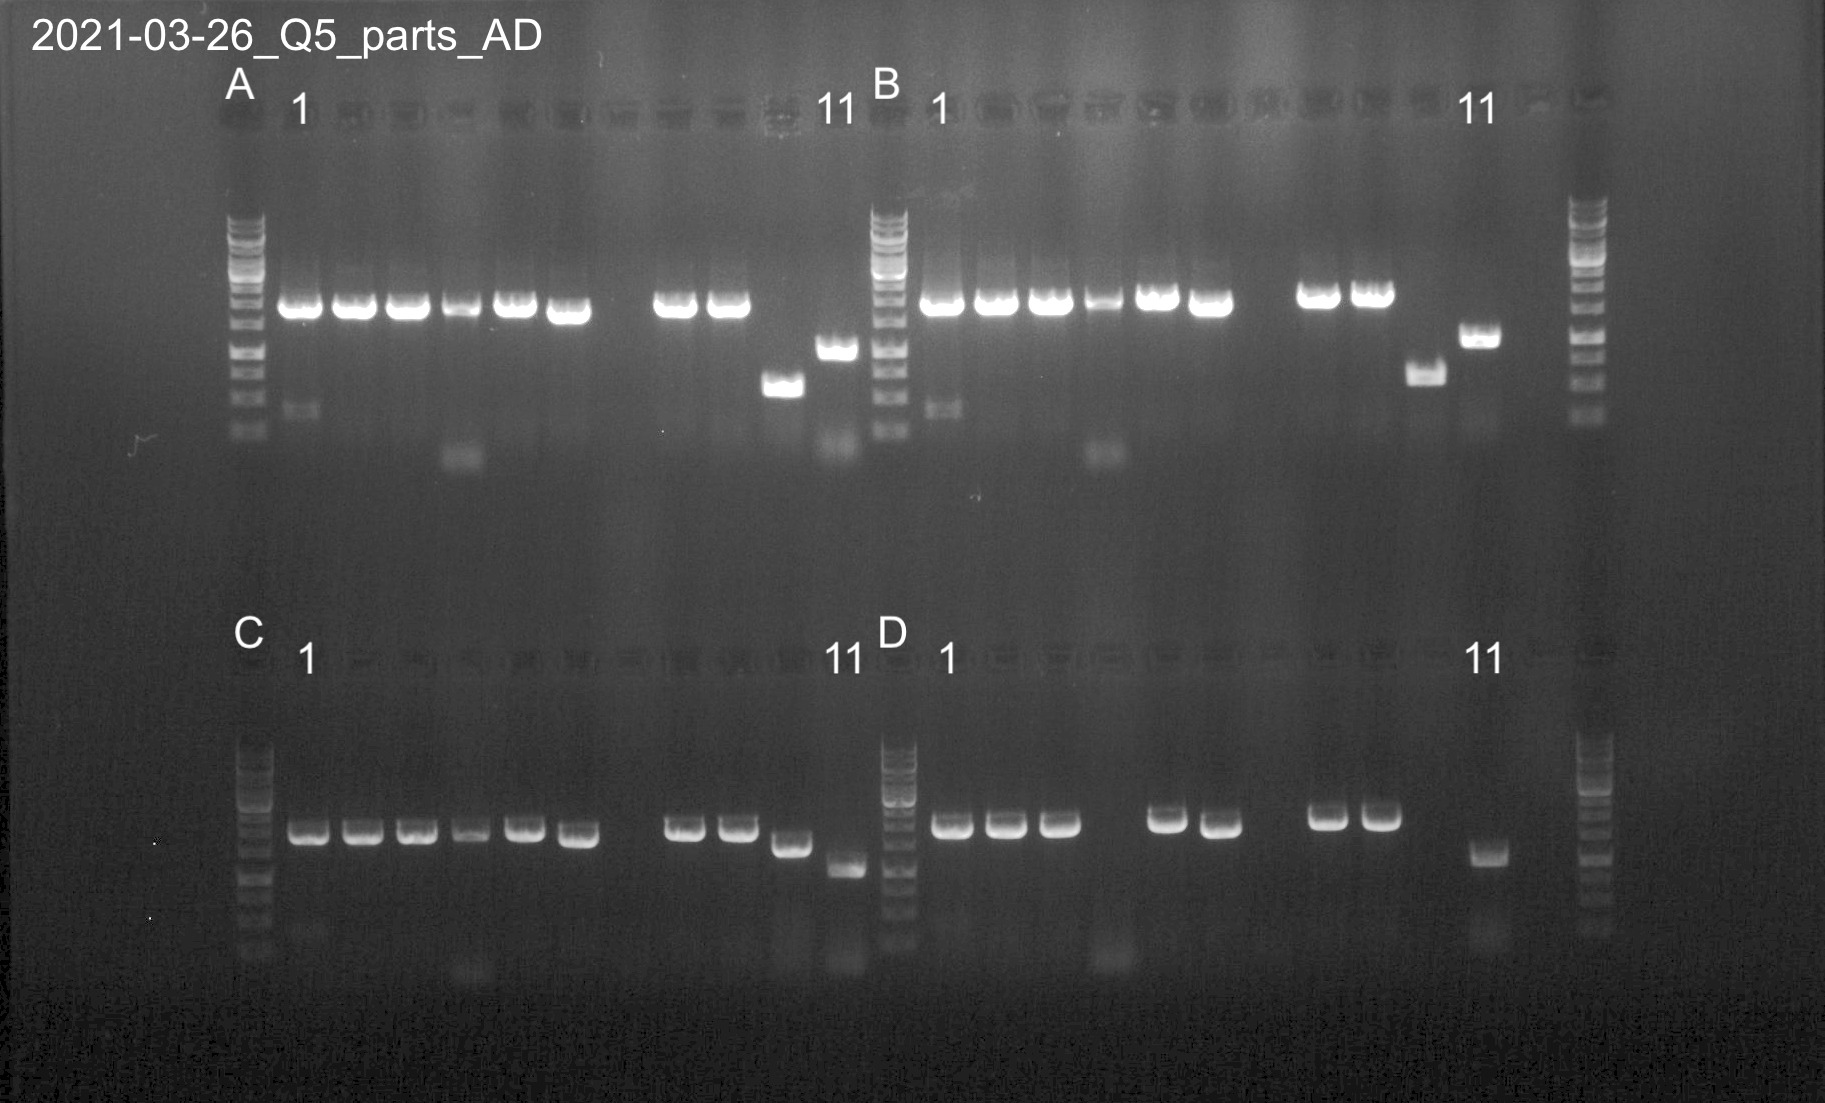

In [215]:
IPython.core.display.Image(utils.bioimager / '2021-03-26_Q5_parts_AD.jpg', width=600)

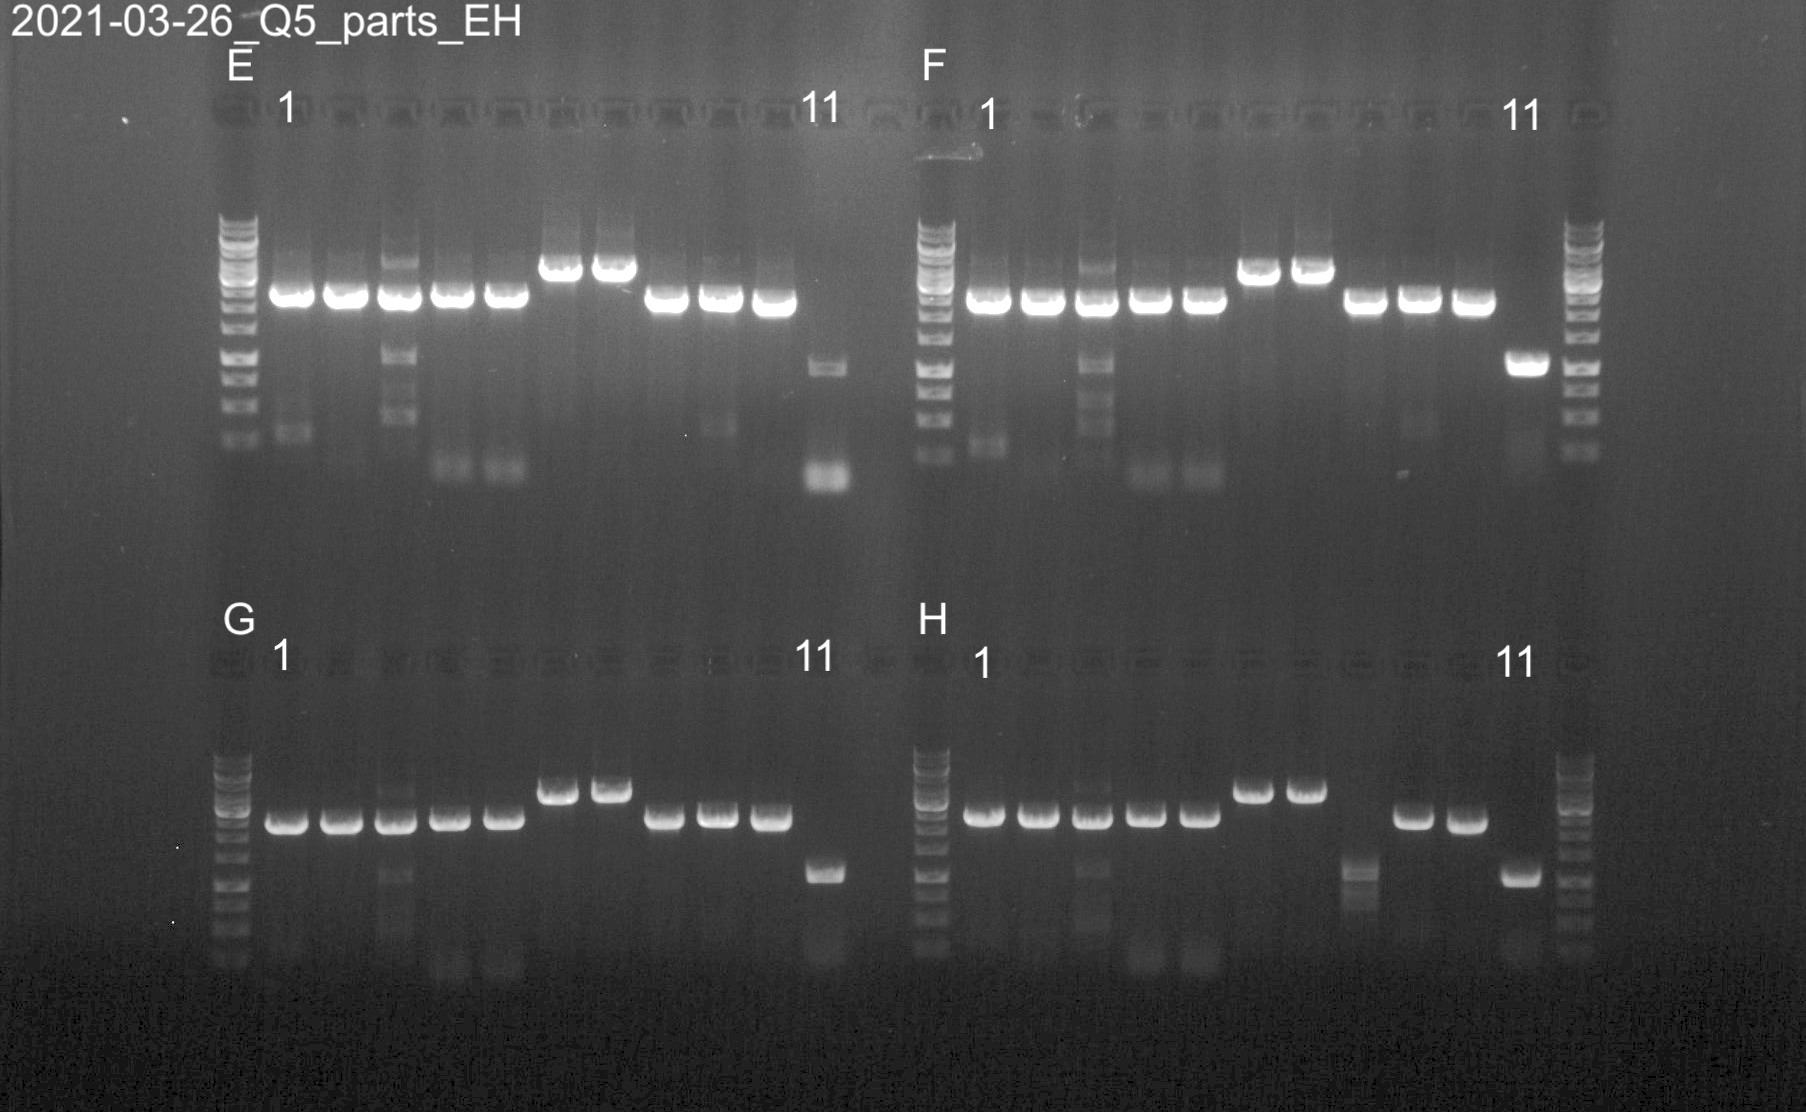

In [216]:
IPython.core.display.Image(utils.bioimager / '2021-03-26_Q5_parts_EH.jpg', width=600)

# **Results**

**Discussion**
- failed
    - D4
    - H8
    - AD7 (expected no template)

- unspecific bands 
    - AD1 (still most of correct band) 
    - EH3 (alot uncorrect band)

**Conclusion**
- redo EH3 AT 63 C

redo EH3 with AT 63C

In [217]:
utils.volumes(vol_p_reac = 50, 
        no_of_reactions = 4,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

vol_p_reac  vol_p_4_reac
Template         1.0           4.0
Primer 1         2.5          10.0
Primer 2         2.5          10.0
H20             19.0          76.0
Pol             25.0         100.0
Total           50.0         200.0

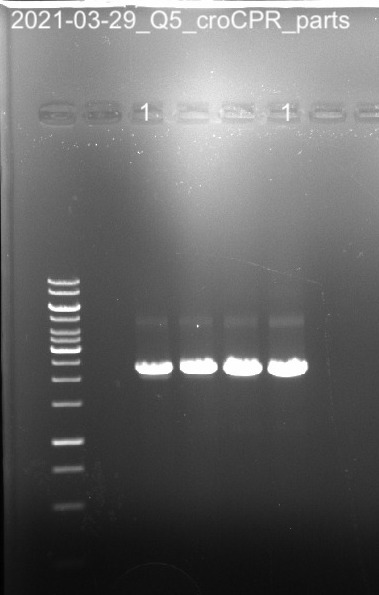

In [218]:
IPython.core.display.Image(utils.bioimager / '2021-03-26_Q5_croCPR_parts.jpg', width=300)

**Results**

**Discussion**

**Conclusion**

column purify:
- pool:
    - homologs (4PCRs) 9+10 = 19
    - promoters (2x4PCRS; pool after purification) 2
- individually
    - AC10 (A10=UP, DW, cTRP) 3

1. Order homologs (G8H, CPR), promoters (1-4, 5-8), UP, DW, cTRP
2. Pool UP DW and cTRP with earlier batches to get enough.
3. Use a pool of batches of promoters earlier purified to get equimolar amounts.

## Assemblies

In [219]:
#list(range(1,8))
#
#assembly_names = []
#for g_no in range(1,9):
#    for gp_no in range(1,5):
#        for cp_no in range(1,5):
#            for c_no in range(1,11):
#                assembly_names.append(str(g_no) +"_"+ str(gp_no) +"_"+ str(cp_no) +"_"+ str(c_no))
#                
#
#len(assembly_names)
#
#parameters = {
#'bg_strain': HA1,
#'site_names': ["XI_2"],
#'gRNAs': [XI2_2_gRNA],
##'parts': [flat_cro_combinations_matrix[0]],
#'assembly_limits':[30],
##'assembly_names': ["pCYC1_pURE2"],
#'verbose': False,
#'to_benchling': False  
#}
#
#assemble_strains = True
#
#if assemble_strains:
#    assemblies = []
#    for i, name in enumerate(assembly_names):
#        assembly = utils.casembler(**{'parts'          : [amplicon_matrix[i]],
#                                      'assembly_names' : [name], 
#                                       **parameters})
#        assemblies.append(assembly)
#    assemblies
#    
#    #HA2 = assemblies[0]
#    
#    #clc20.open(HA2)
#
#clc20.open(assemblies[811])
#
#assembly_names[811]
#
#possible_genotypes = pathlib.Path('../data/processed/sequence/possible_genotypes_by_promoter/').resolve()
#possible_genotypes
#
#possible_genotypes
#
#for assembly in assemblies:
#    name_ext = assembly.name + ".gbk"
#    path = possible_genotypes / pathlib.Path(name_ext)
#    assembly.write(str(path))

In [220]:
#2. Upload
# Function not yet finished. Construct and upload csv

In [221]:
pool_concentrations = utils.nanophotometer_concentrations(utils.nanophotometer / '2021-03-29_G8H_CPR_library_part_concentrations.tsv')

In [222]:
# remove sample AD7 (PcoG8H_tADH1)  3.8 ng /ul
#pool_concentrations.remove(3.8) later

# pool 2 promoter samples 88,77.6 into 82.8
concs = pool_concentrations[-5:-3]
concs_mean = sum(concs) / len(concs)
pool_concentrations = [conc for conc in pool_concentrations if conc not in concs]
pool_concentrations.insert(-3, concs_mean)
len(pool_concentrations)

23

Add  sites batches to pool: 
- UP
    - PCR_UP_tADH1_01-002 - 005 into XI-2_UP-001
    - l4_E7 - F1 into H9 (23.7)
    
- DW
    - PCR_TRP1-DW_02-002 - 005 into XI-2_DW-001
    - l4_F2 - F6 into I1 (17.5)

- cTRP
    - PCR_TRP1-DW_01-001 - 004 into cTRP1-001
    - l4_E4 - E6 into I2 (39.9)

Archive expanded samples l4_E4-F6

In [223]:
def amplicon_by_name(name, amplicons_lst):
    for amplicon in amplicons_lst:
        if amplicon.name == name:
            return amplicon

In [224]:
def mean(lst):
    mean = sum(lst) / len(lst)
    return mean

In [225]:
# pool equimolar ratio
promoter_conc = [100,100,100,90,120,110,75,120]

# pool all, fragments are the same, same length
UP_concs = [40, 30, 30, 35, 23.7]
DW_concs = [60, 60, 40, 50, 17.5]
cTRP_concs = [160, 150, 140, 39.9]

In [226]:
pool_names = ['VminG8H_tADH1','SmusG8H_tADH1','RsepG8H_tADH1','CacuG8H_tADH1','OpumG8H_tADH1','CroG8H_tADH1','PcoG8H_tADH1','OeuG8H_tADH1','CcalG8H_tADH1','CroCPR_tCYC1','AanCPR_tCYC1','AraCPR_tCYC1','CloCPR_tCYC1','RseCPR_tCYC1','AhuCPR_tCYC1','AniCPR_tCYC1','CacCPR_tCYC1','OeuCPR_tCYC1','CpoCPR_tCYC1','Promoters','XI-2_UP','XI-2_DW','cTRP1']

pool_lengths = [1845,1851,1845,1869,1902,1737,1412,1845,1845,2365,2335,2300,2365,2365,2365,2305,2347,2347,2260,1033,609,599,1451]
pool_bases = ['A'* pool_length for pool_length in pool_lengths]

pool_positions = ['F7','F8','F9','G1','G2','G3','G4','G5','G6','G7','G8','G9','H1','H2','H3','H4','H5','H6','H7','H8','H9','I1','I2']

# Update due pooling with previously made batches

pool_bases[-3] = amplicon_by_name('PCR_UP_tADH1_01',amplicons).seq.watson # UP
pool_bases[-2] = amplicon_by_name('PCR_TRP1-DW_02',amplicons).seq.watson # DW
pool_bases[-1] = amplicon_by_name('PCR_TRP1-DW_01',amplicons).seq.watson # cTRP

pool_concentrations[-3] = mean(UP_concs)
pool_concentrations[-2] = mean(DW_concs)
pool_concentrations[-1] = mean(cTRP_concs)

pool_volumes = [100] * len(pool_names)
pool_volumes[-3] = 100 * len(UP_concs) # UP
pool_volumes[-2] = 100 * len(DW_concs) # DW
pool_volumes[-1] = 100 * len(cTRP_concs) # cTRP

In [227]:
cro_strain_batches = pd.DataFrame.from_dict({
'entity_name' : pool_names,
'Bases': pool_bases,
'Box_barcode' : ['81BOX827'] * len(pool_names),
'position' : pool_positions,
'volume' : pool_volumes,
'volume unit' : ['ul'] * len(pool_names),
'concentration' : pool_concentrations,
'concentration unit' : ['ng/ul'] * len(pool_names),
}
)
cro_strain_batches

entity_name  \
0   VminG8H_tADH1   
1   SmusG8H_tADH1   
2   RsepG8H_tADH1   
3   CacuG8H_tADH1   
4   OpumG8H_tADH1   
5    CroG8H_tADH1   
6    PcoG8H_tADH1   
7    OeuG8H_tADH1   
8   CcalG8H_tADH1   
9    CroCPR_tCYC1   
10   AanCPR_tCYC1   
11   AraCPR_tCYC1   
12   CloCPR_tCYC1   
13   RseCPR_tCYC1   
14   AhuCPR_tCYC1   
15   AniCPR_tCYC1   
16   CacCPR_tCYC1   
17   OeuCPR_tCYC1   
18   CpoCPR_tCYC1   
19      Promoters   
20        XI-2_UP   
21        XI-2_DW   
22          cTRP1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Bases  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [228]:
if export_csvs:
    cro_strain_batches.to_csv('cro_strain_batches.csv',index=False)
    os.system('mv cro_strain_batches.csv /Users/Christine/Documents/Speciale/g8h_cpr_library')

upload

### Use a pool of batches of promoters earlier purified to get equimolar amounts.

In [229]:
# part/pool amount per reaction.
#part_amounts_per_reaction
#promoters = 0.001

# How many times are each part / pool needed?
#times_needed
#promoters = 90

# amount needed in total = amt_per_reaction * times_need
#pp_amounts_total = {}
#for key, value in part_amounts_per_reaction.items():
#    amt = value
#    times = times_needed[key]
#    amount_total = amt * times
#    pp_amounts_total.update({key: amount_total})

# pooled amounts need = 1/8 of needed from individual promoter
promoters_amounts_total = 0.001*8 #pp_amounts_total['Promoters']
promoter_names = ('PCR_PRO_01','PCR_PRO_06','PCR_PRO_07','PCR_PRO_08','PCR_PRO_02','PCR_PRO_03','PCR_PRO_04','PCR_PRO_05')
# inidividual promoter parts needed
promoter_parts_amounts_total = {k: v for (k, v) in zip(promoter_names,[promoters_amounts_total/8]*len(promoter_names))}
promoters = [amplicon_by_name(name,amplicons) for name in promoter_names]

def wanted_mass(wanted_moles, size):
    """
    wanted moles in nmol, 
    size in bp
    
    Returns:
    in ng = nmol * bp * 650 ng/(nmol * bp)
    
    """
    w_mass = wanted_moles * size * 650
    w_mass_rounded = round(w_mass,1)
    return(w_mass_rounded)

def wanted_volume(wanted_mass, actual_concentration):
    """
    wanted mass in ng
    actual_concentration in ng/ul
    return in ul
    """
    wanted_volume = wanted_mass / actual_concentration
    wanted_volume_rounded = round(wanted_volume,1)
    return(wanted_volume_rounded)

#What volume is that?
volumes = []
ngs = []
for amp in promoters:
    w_moles = promoter_parts_amounts_total[amp.name]
    w_mass = wanted_mass(wanted_moles=w_moles, size=len(amp))
    act_conc = amp.annotations['batches'][0]['concentration']
    w_volume = wanted_volume(w_mass, act_conc)
    volumes.append(w_volume)
    ngs.append(w_volume * act_conc)
    print(amp.name, w_volume, act_conc)

    
total_vol = sum(volumes)
total_ngs = sum(ngs)
total_conc = total_ngs/total_vol
print('total volume: ', sum(volumes))
print()
print('total ngs: ', sum(ngs))
print('total conc: ', total_conc)
#There is enough

# Add 30 µl water to have enough
# Create new entity + batch of Promoters pools
    # volume 608.7 + 30 = 638.7 ul
    # concentration = 100  ng/ul
# Make sure this batch is used for DNA mix calculations

PCR_PRO_01 6.7 100.0
PCR_PRO_06 6.2 110.0
PCR_PRO_07 9.1 75.0
PCR_PRO_08 5.6 120.0
PCR_PRO_02 6.6 100.0
PCR_PRO_03 6.8 100.0
PCR_PRO_04 7.5 90.0
PCR_PRO_05 5.6 120.0
total volume:  54.1

total ngs:  5393.5
total conc:  99.69500924214418


In [230]:
promoter_pool_entity = cro_strain_batches[cro_strain_batches['entity_name']=='Promoters'].reset_index(drop=True)
promoter_pool_entity['entity_name'] = 'promoters'
promoter_pool_entity['position'] = 'D6'
promoter_pool_entity['volume'] = total_vol + 20
promoter_pool_entity['concentration'] = total_conc
promoter_pool_entity

entity_name  \
0   promoters   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Bases  \
0  AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA   

  Box_barcode position  volume volume unit  concentration concentration unit  
0    81BOX827       D6    74.1          ul      99.695009              ng/ul

In [318]:
len('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA')

1033

In [233]:
pool_names[20:21]

['XI-2_UP']

In [234]:
cro_UP_names       = pool_names[20:21]
cro_G8H_names      = pool_names[0:9]
cro_promoter_names = pool_names[19:20]

cro_CPR_names      = pool_names[9:19]
cro_marker_names   = pool_names[22:23]
cro_DW_names       = pool_names[21:22]

cro_G8H_names.remove('PcoG8H_tADH1') # No template
cro_promoter_names = ['promoters'] #use enity and batch with equimolar amounts instead of pool_names[19:20]

In [235]:
pool_UP_sites         = [pydna.dseqrecord.Dseqrecord(utils.from_benchling(tname)) for tname in cro_UP_names]
pool_G8H_sites        = [pydna.dseqrecord.Dseqrecord(utils.from_benchling(tname)) for tname in cro_G8H_names]
pool_promoter_sites   = [pydna.dseqrecord.Dseqrecord(utils.from_benchling(pname)) for pname in cro_promoter_names]
pool_CPR_sites        = [pydna.dseqrecord.Dseqrecord(utils.from_benchling(tname)) for tname in cro_CPR_names]
pool_marker_sites     = [pydna.dseqrecord.Dseqrecord(utils.from_benchling(tname)) for tname in cro_marker_names]
pool_DW_sites         = [pydna.dseqrecord.Dseqrecord(utils.from_benchling(tname)) for tname in cro_DW_names]

In [236]:
#Create a list of fragments within a list of parts.
pool_fragment_list = [pool_UP_sites,pool_G8H_sites,pool_promoter_sites,pool_CPR_sites,pool_marker_sites,pool_DW_sites]

#The number of fragments to be assembled
pool_no_frags = len(pool_fragment_list)
print("Number of fragments:", pool_no_frags)

#The number of parts of each fragment
pool_no_parts = [len(l) for l in pool_fragment_list]
print("Number of parts: ",pool_no_parts)

#The number of possible combinations
pool_no_combs = utils.multiplyList(pool_no_parts)
print("Number of possible combinations:",pool_no_combs)

#How many repitions are needed?
pool_repetition_list = [int(pool_no_comb/pool_no_part) for pool_no_comb, pool_no_part in zip([pool_no_combs]*len(pool_no_parts),pool_no_parts)]
print("The number of time each fragment must be repeated:", pool_repetition_list)

times_needed = {}
for frag_list, rep in zip(pool_fragment_list, pool_repetition_list):
    for frag in frag_list:
        times_needed.update({frag.name : rep})


#Matrix with all combinations
print("\nCombinations:")
pool_combinations_matrix = [t for t in itertools.product(*pool_fragment_list)]
for row in pool_combinations_matrix:
    names = []
    for element in row:
        names.append(element.name)
    print(names)

Number of fragments: 6
Number of parts:  [1, 8, 1, 10, 1, 1]
Number of possible combinations: 80
The number of time each fragment must be repeated: [80, 10, 80, 8, 80, 80]

Combinations:
['XI-2_UP', 'VminG8H_tADH1', 'promoters', 'CroCPR_tCYC1', 'cTRP1', 'XI-2_DW']
['XI-2_UP', 'VminG8H_tADH1', 'promoters', 'AanCPR_tCYC1', 'cTRP1', 'XI-2_DW']
['XI-2_UP', 'VminG8H_tADH1', 'promoters', 'AraCPR_tCYC1', 'cTRP1', 'XI-2_DW']
['XI-2_UP', 'VminG8H_tADH1', 'promoters', 'CloCPR_tCYC1', 'cTRP1', 'XI-2_DW']
['XI-2_UP', 'VminG8H_tADH1', 'promoters', 'RseCPR_tCYC1', 'cTRP1', 'XI-2_DW']
['XI-2_UP', 'VminG8H_tADH1', 'promoters', 'AhuCPR_tCYC1', 'cTRP1', 'XI-2_DW']
['XI-2_UP', 'VminG8H_tADH1', 'promoters', 'AniCPR_tCYC1', 'cTRP1', 'XI-2_DW']
['XI-2_UP', 'VminG8H_tADH1', 'promoters', 'CacCPR_tCYC1', 'cTRP1', 'XI-2_DW']
['XI-2_UP', 'VminG8H_tADH1', 'promoters', 'OeuCPR_tCYC1', 'cTRP1', 'XI-2_DW']
['XI-2_UP', 'VminG8H_tADH1', 'promoters', 'CpoCPR_tCYC1', 'cTRP1', 'XI-2_DW']
['XI-2_UP', 'SmusG8H_tADH1', 'pro

In [237]:
#lib_names = []
#for row in pool_combinations_matrix:
#    names = []
#    for i, element in enumerate(row):
#        if i in (1,3):
#            short_name = element.name.split('_')[1][0:3]
#            names.append(short_name)
#    print(names)
#    lib_name = '_'.join(names)
#    lib_names.append(lib_name)

In [238]:
pool_assembly_names       = ["MIA-HA-" + str(i+21) for i in range(0,len(pool_combinations_matrix))]
pool_assembly_names_short = ["HA" + str(i+21) for i in range(0,len(pool_combinations_matrix))]
#pool_assembly_names

In [239]:
pool_assembly_names[0]

'MIA-HA-21'

In [240]:
len(pool_assembly_names_short)

80

Upload strains to benchling. Create spreadsheets for
1. Benchling 
    1. add strain entities
    2. add sequence as plasmid entities (not sure if benchling supports DNA pools)

Add strain entities

In [241]:
pool_combinations_matrix[0][1]

Dseqrecord(-1845)

## Background strain

MIA-HA-1

In [242]:
HA1 = utils.from_benchling("MIA-HA-1")
HA1.annotations['topology'] = "linear"

In [243]:

#clc21.open(HA1)
#Bio.SeqIO.write([HA1], "../data/raw/MIA-HA-1.gb", "genbank")

In [244]:
XI2_2_gRNA = pydna.dseqrecord.Dseqrecord("ACCCCCCTCAACTGATCAAC", name = "XI2-2_gRNA")

In [245]:
pool_combinations_matrix[0][1].seq

Dseq(-1845)
AAAA..AAAA
TTTT..TTTT

In [246]:
genotype_changes = []
for strain in pool_combinations_matrix:
    part_descriptions = []
    for i, part in enumerate(strain):
        if i != 0 and i != 5:
            if i == 1: 
                part_description = part.name
                first, second = part_description.split('_')
                part_description = '_'.join([second, first])
                part_descriptions.append(part_description)  
            else:
                part_description = part.name
                part_descriptions.append(part_description)   
    genotype_change = '_'.join(part_descriptions)
    genotype_change += ' @ XI-2'
    genotype_changes.append(genotype_change)
#print(genotype_changes)

In [247]:
genotype_changes_short = []
for geno in genotype_changes:
    x = geno.split('_')
    short_genotype = x[1] + " " + x[3]
    genotype_changes_short.append(short_genotype)

In [248]:
library_entities = pd.DataFrame.from_dict(
{
    'Name' : pool_assembly_names,
    'Organism'              : ['Saccharomyces cerevisiae'] * len(pool_assembly_names_short),
    'Designed by'           : ['sorpet@biosustain.dtu.dk'] * len(pool_assembly_names_short),
    'Status'                : ['Complete'] * len(pool_assembly_names_short), 
    'Growth temp (°C)'      : ['30'] * len(pool_assembly_names_short), 
    'Parent strain'         : ['MIA-HA-1'] * len(pool_assembly_names_short), 
    'medium'                : ['SC-URA-TRP agar'] * len(pool_assembly_names_short),  
    'Clonal or population?' : ['Library'] * len(pool_assembly_names_short), 
    'Genotype Change'       : genotype_changes,
    'Comments'              : ['MIA-HA-1 colony used as bg strain had mutated, however this colony has higher growthrate and relatively easy to transform. These strains based on this background colony do not produce strictosidine de novo even after G8H and CPR integration. '] * len(pool_assembly_names_short),
#    'Auxotrophy'            : ['Histidine Leusine'] * len(pool_assembly_names_short), 
}
)
library_entities.head()

Name                  Organism               Designed by    Status  \
0  MIA-HA-21  Saccharomyces cerevisiae  sorpet@biosustain.dtu.dk  Complete   
1  MIA-HA-22  Saccharomyces cerevisiae  sorpet@biosustain.dtu.dk  Complete   
2  MIA-HA-23  Saccharomyces cerevisiae  sorpet@biosustain.dtu.dk  Complete   
3  MIA-HA-24  Saccharomyces cerevisiae  sorpet@biosustain.dtu.dk  Complete   
4  MIA-HA-25  Saccharomyces cerevisiae  sorpet@biosustain.dtu.dk  Complete   

  Growth temp (°C) Parent strain           medium Clonal or population?  \
0               30      MIA-HA-1  SC-URA-TRP agar               Library   
1               30      MIA-HA-1  SC-URA-TRP agar               Library   
2               30      MIA-HA-1  SC-URA-TRP agar               Library   
3               30      MIA-HA-1  SC-URA-TRP agar               Library   
4               30      MIA-HA-1  SC-URA-TRP agar               Library   

                                     Genotype Change  \
0  tADH1_VminG8H_promoters_CroCPR_tCYC1_cTRP1 @ XI-2   
1  tADH1_VminG8H_promoters_AanCPR_tCYC1_cTRP1 @ XI-2   
2  tADH1_VminG8H_promoters_AraCPR_tCYC1_cTRP1 @ XI-2   
3  tADH1_VminG8H_promoters_CloCPR_tCYC1_cTRP1 @ XI-2   
4  tADH1_VminG8H_promoters_RseCPR_tCYC1_cTRP1 @ XI-2   

                                                                                                                                                                                                                                             Comments  
0  MIA-HA-1 colony used as bg strain had mutated, however this colony has higher growthrate and relatively easy to transform. These strains based on this background colony do not produce strictosidine de novo even after G8H and CPR integration.   
1  MIA-HA-1 colony used as bg strain had mutated, however this colony has higher growthrate and relatively easy to transform. These strains based on this background colony do not produce strictosidine de novo even after G8H and CPR integration.   
2  MIA-HA-1 colony used as bg strain had mutated, however this colony has higher growthrate and relatively easy to transform. These strains based on this background colony do not produce strictosidine de novo even after G8H and CPR integration.   
3  MIA-HA-1 colony used as bg strain had mutated, however this colony has higher growthrate and relatively easy to transform. These strains based on this background colony do not produce strictosidine de novo even after G8H and CPR integration.   
4  MIA-HA-1 colony used as bg strain had mutated, however this colony has higher growthrate and relatively easy to transform. These strains based on this background colony do not produce strictosidine de novo even after G8H and CPR integration.

In [249]:
if False:
    library_entities.to_csv('library_entities.csv',index=False)

Uploaded to benchling. Register when complete

## Transformation reactions

MIA-HA-21 - 50 (libraries; As MIA-HA-2 - 17 transformations) 

**Bg strain culture experiment**

For 30 transformations: Need 5 ml cells (OD1) * 30 = 150 ml YPD

Background:
- MIA-HA-1 colony:
We know colonies have lost an outside strictosidine module burdening gene. Only few MIA-HA-1 colonies appeared on plate. I chose one that had correct genotype. It may be that the initial cell of this colony had mutated. This colony was cultured, GS, and plated. Alternatively these plated colonies are different (I picked biggest). It would be ideal to make all 90 libraries from one single colony from this plate. However, colonies are not big enough to inoculate all starter cultures. I could grow larger colony/make cell patch but this could also introduce heterogeneity. Instead pick 3 big (colonies no. 2-4 on picture below) and make libraries in 3 x 30 transformations. 

M&M:
- MIA-HA-1 (YPD)
   1. Make 4x 1/40 and 4x 9/40 of one big colony in 2x 20 ml YPD
       1. Take biggest colony and diluted it in 160 µl
       2. 4xtimes; added 4 µl, 36 µl to 20 ml YPD in each of two 50 ml falcon tubes

Results:
   1. OD at 08:45 = 0.4x4 (9/40 dilutions) and 0.052x4 (1/40; see picture below). Half of what Christine observed thus next time need more cell mass or inoculate 3 hours earlier. Pool 2x 20 ml 9/40 + 2x 20 ml 1/40 in 250 ml shakeflask. Resulting in 2x80 ml YPD each with OD ~ 0.21. 
    2. OD at 13.17 = 0.565. Added 100 ml Culture to 2x 50 ml falcon tubes and start transf. protocol. 
    3. OD at 15.27 = 0.996. 
     
Discussion:
   1. MIA-HA-1 doubling times are lower than expected for CM-3.
   2. could remove last 4 ml of water adding transformation mix (cells to loose. removing water would loose to many cells, perhaps washed them one too many times?). Made new master mix. Amounts to 2 ml extra water in total 15 ml mastermix.
   3. accidentally transferred cells to balance tube that may be contaminated. Carried on. 

Conclusion:
   1. Carry on with transformation
       





In [250]:
utils.ODtime(0.21, 6.5, td=0.33)

0.929

td ~ .33

In [251]:
#Protocol for transformation:
IPython.display.FileLink('../references/methods.ipynb')

/Users/Christine/Documents/Speciale/g8h_cpr_library/references/methods.ipynb

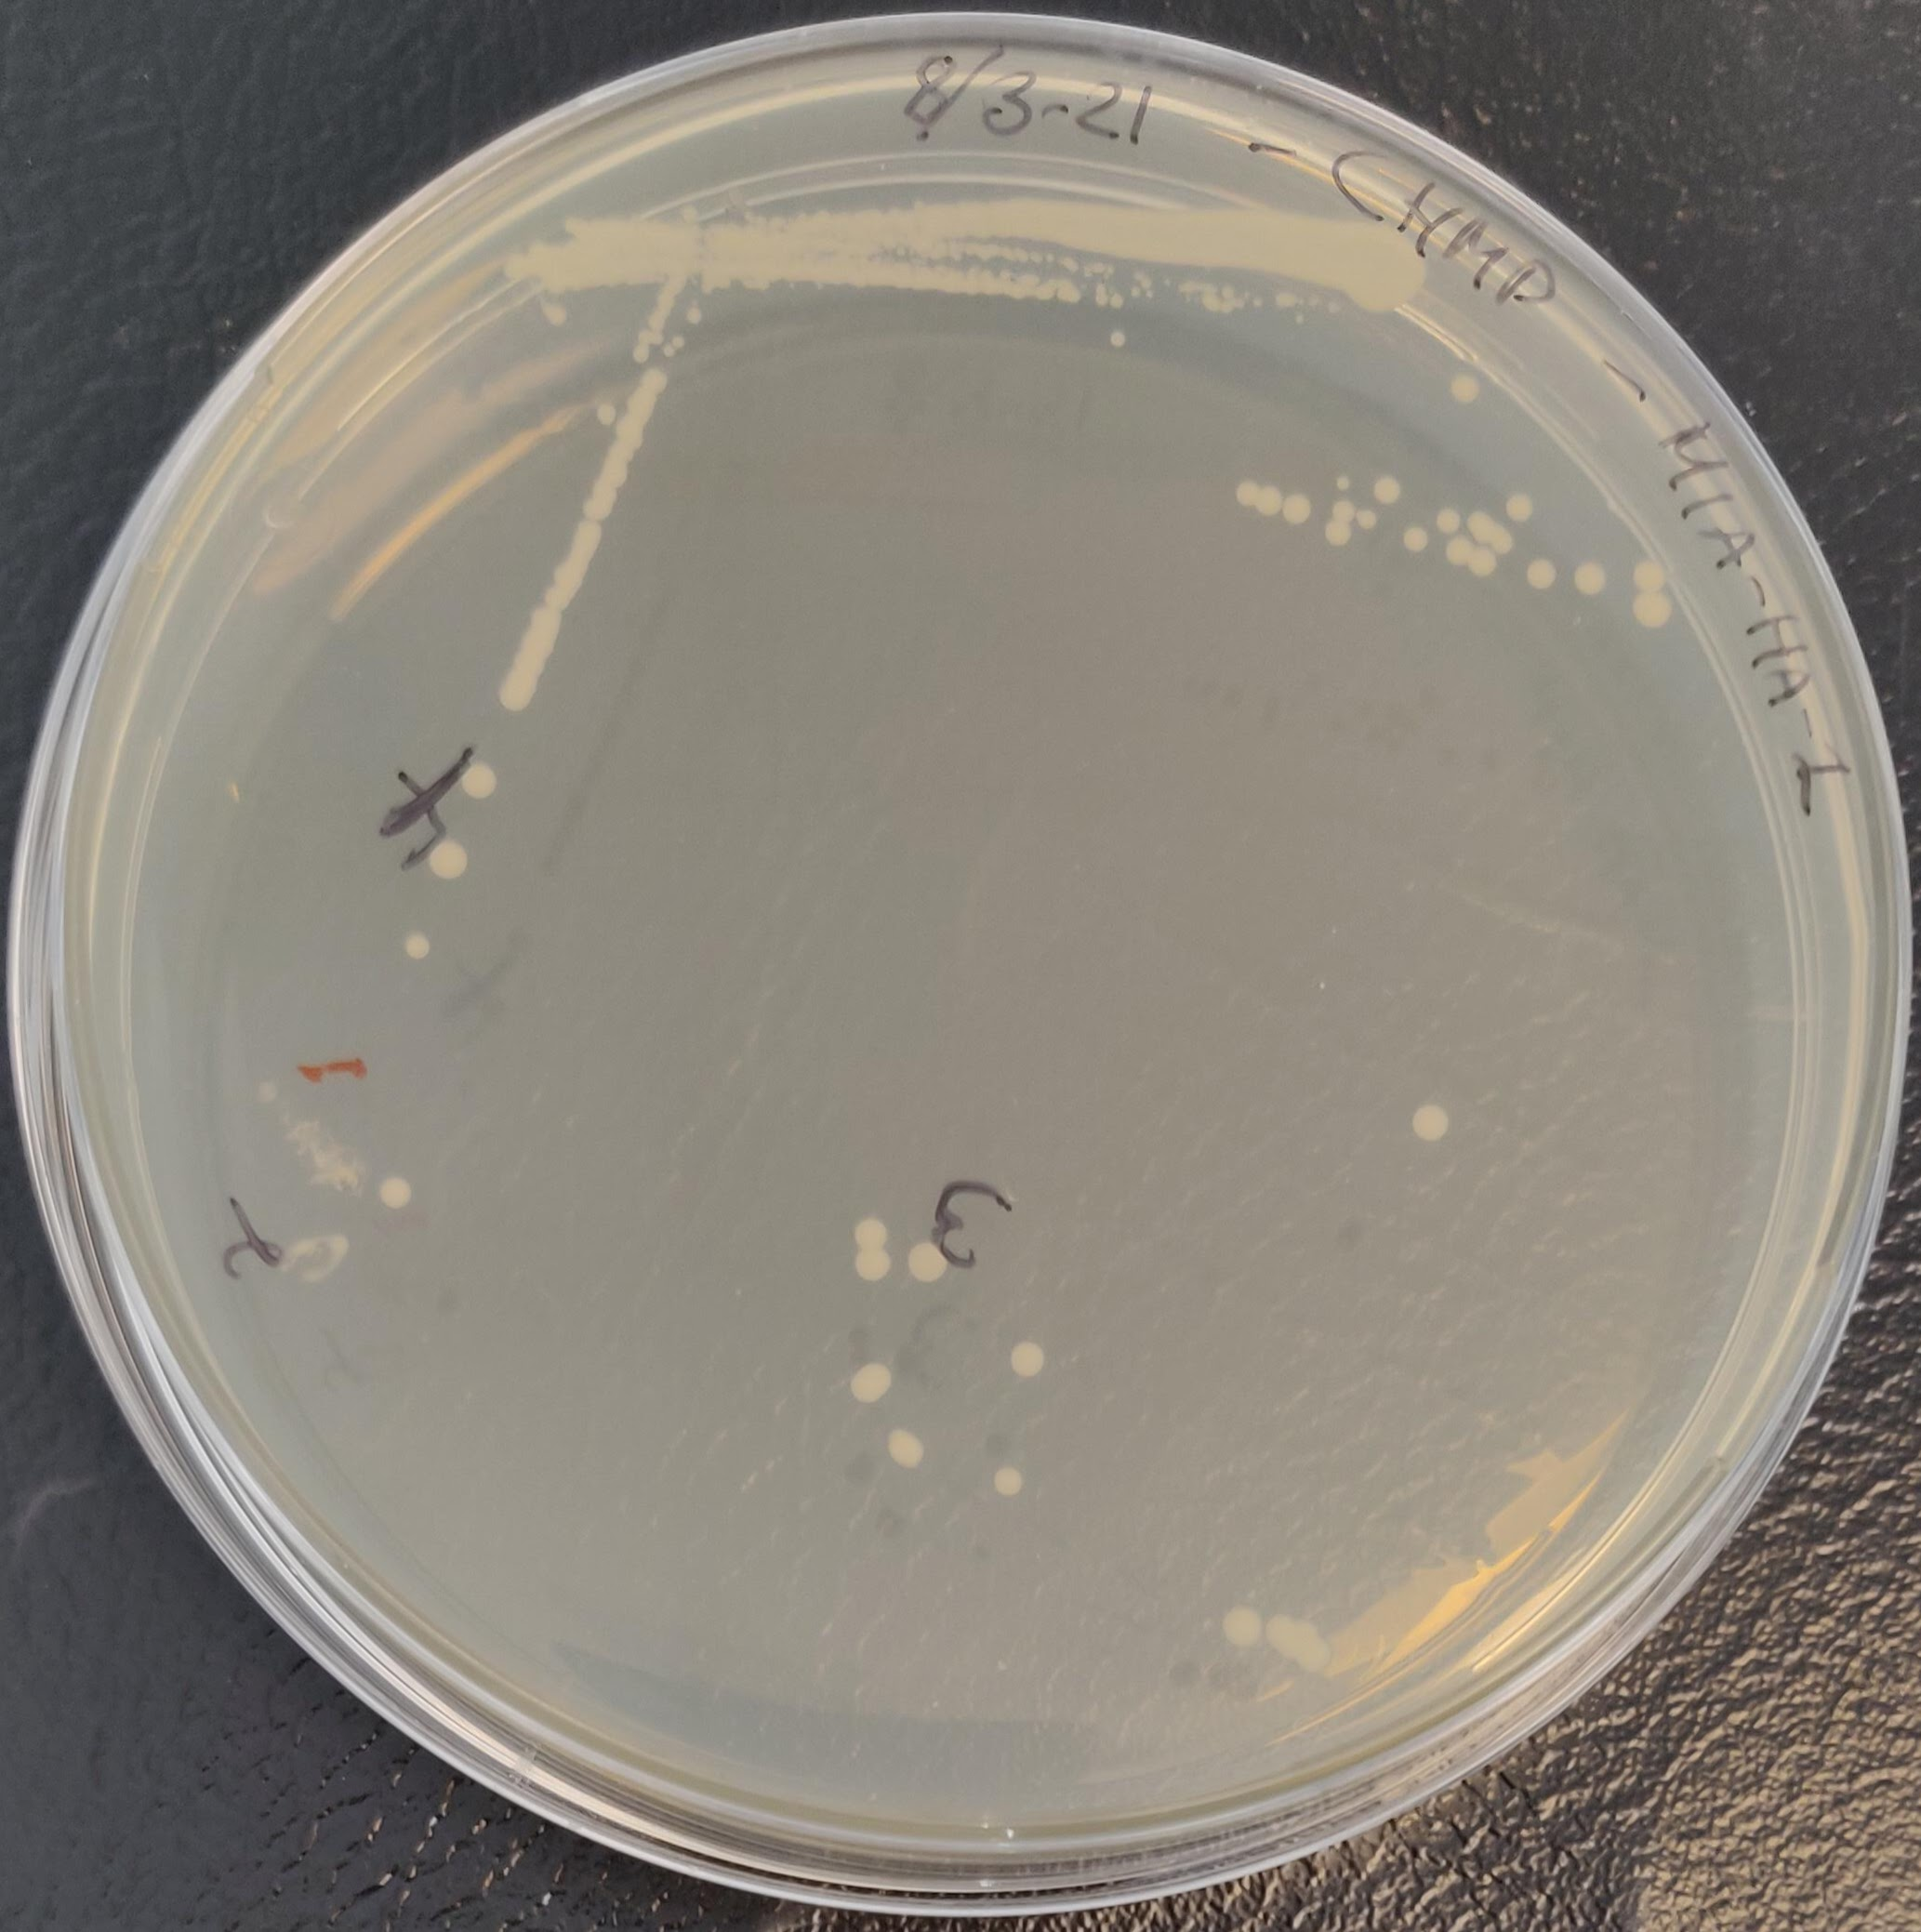

In [252]:
IPython.core.display.Image(utils.figures / '2021-04-14_MIA-HA-1_plate.jpg', width=300)

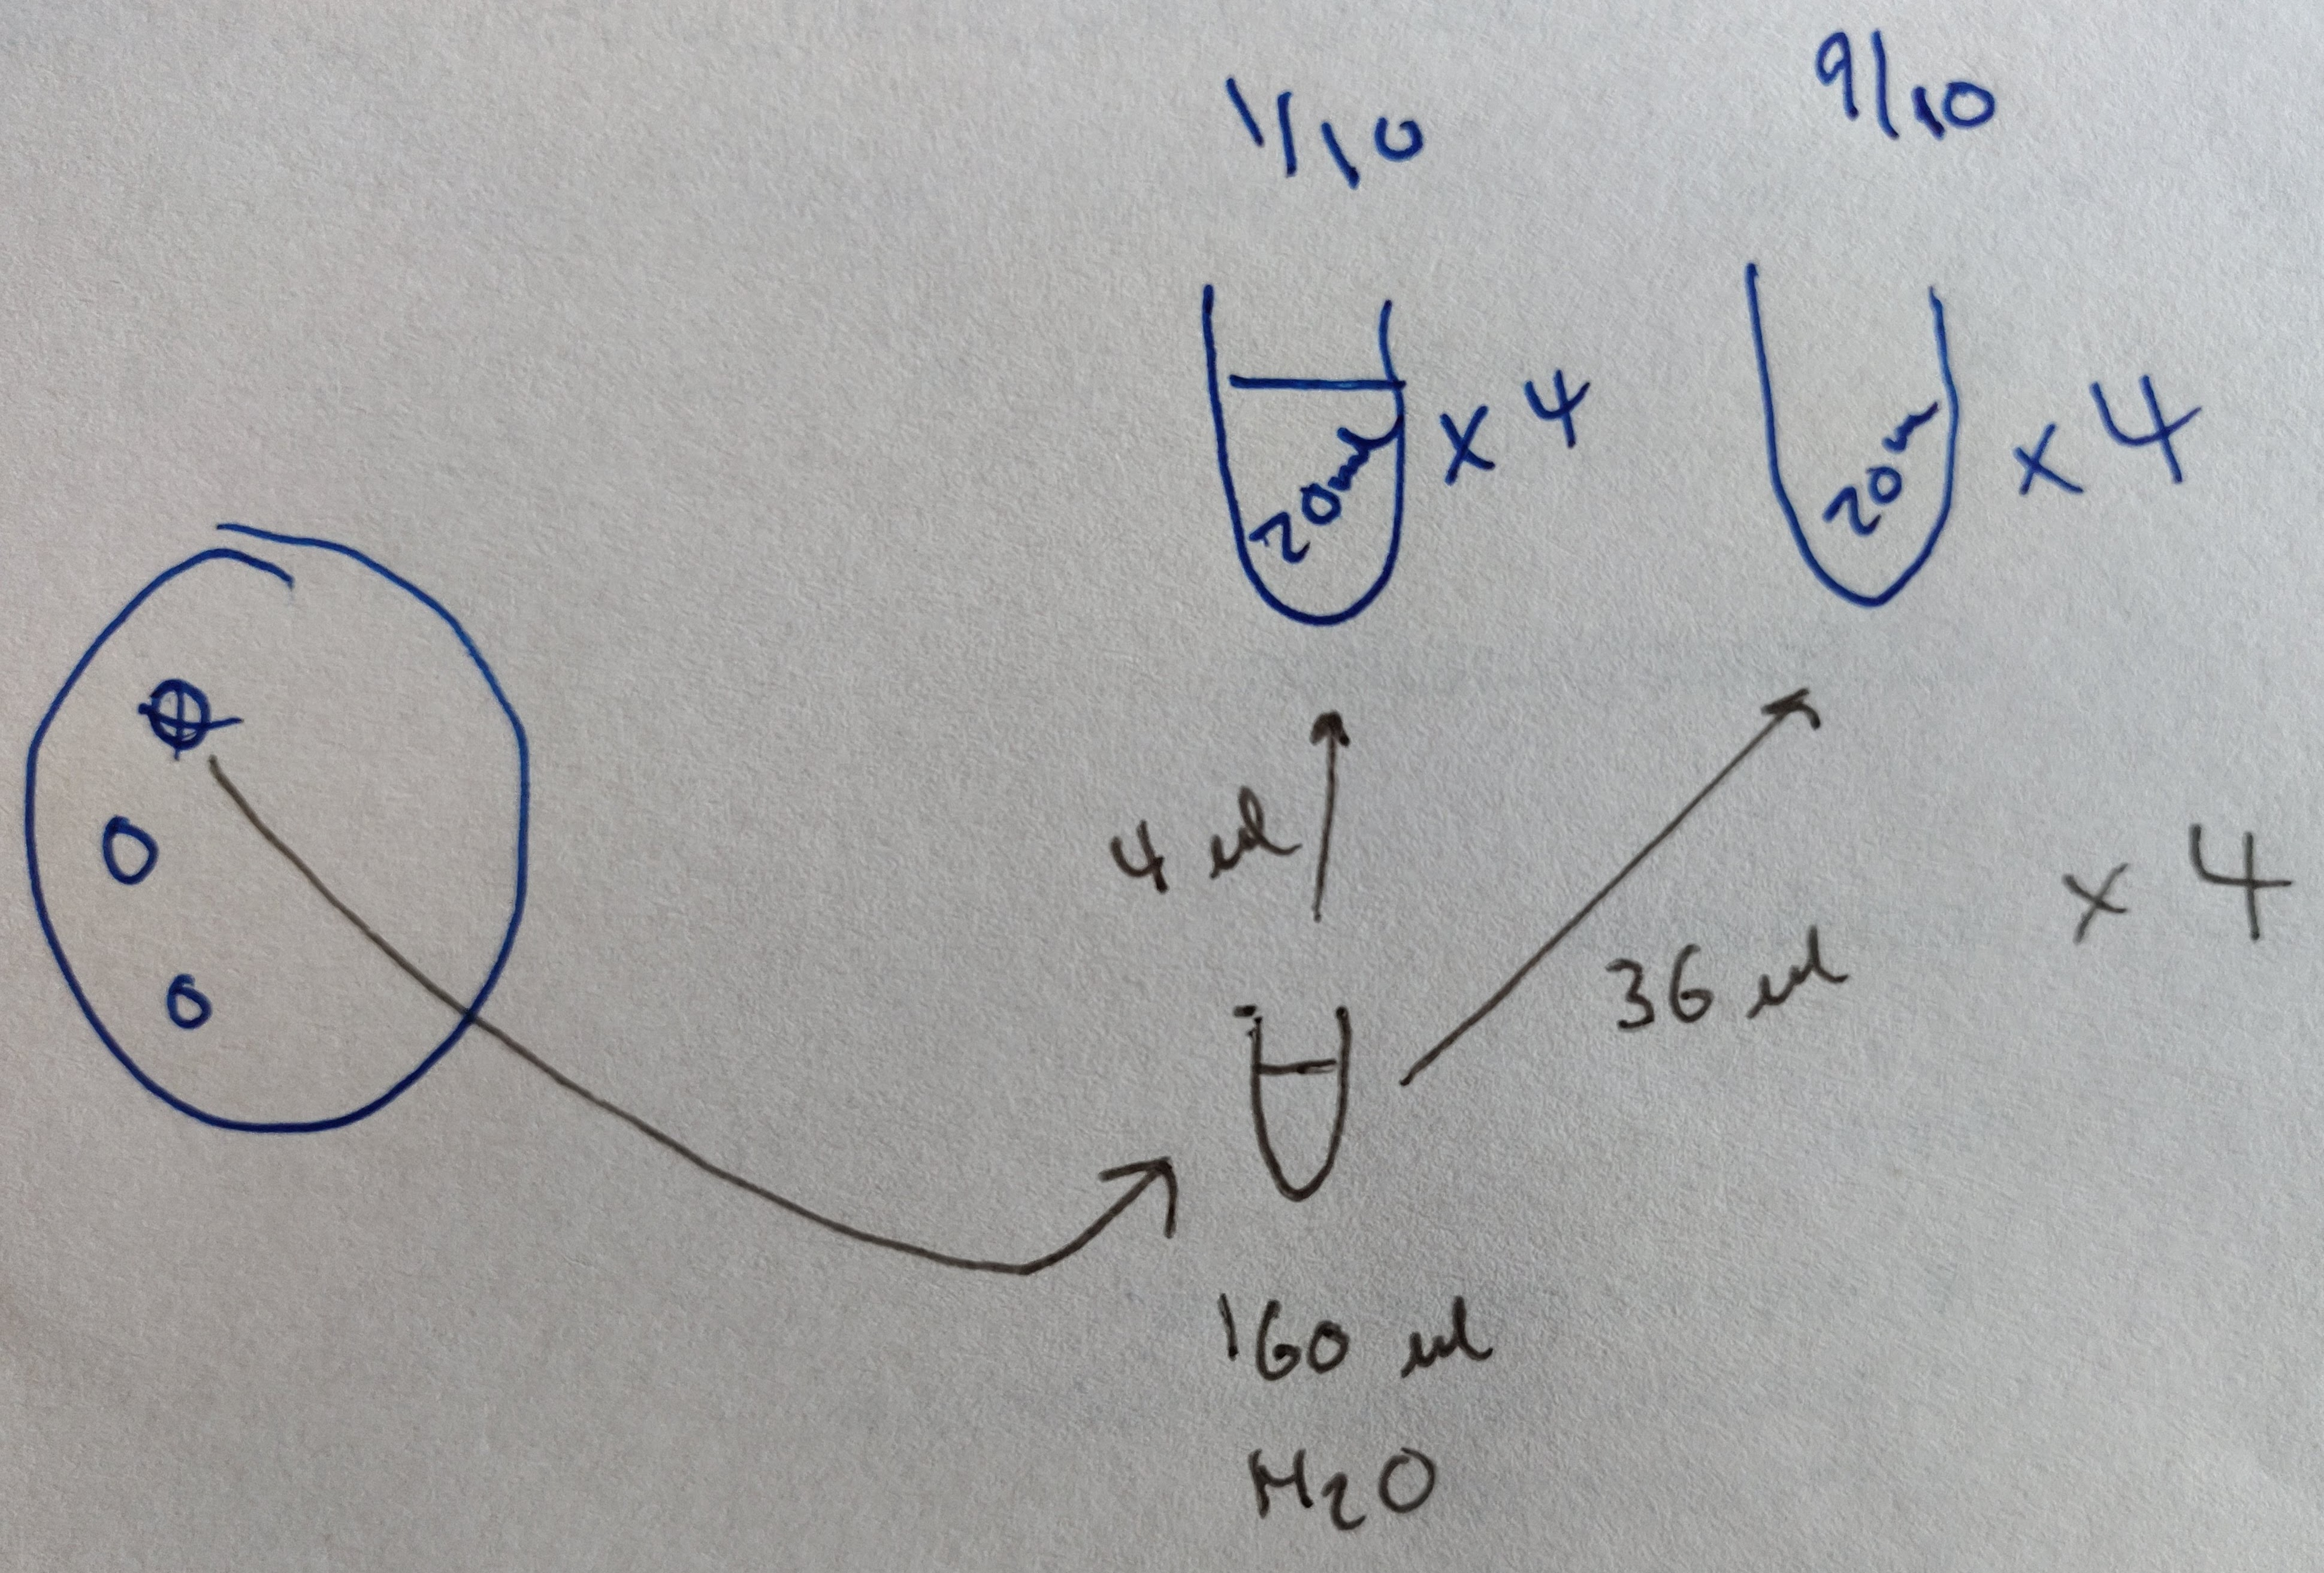

In [253]:
IPython.core.display.Image(figures / '2021-03-11_inoculation.jpg', width=300)

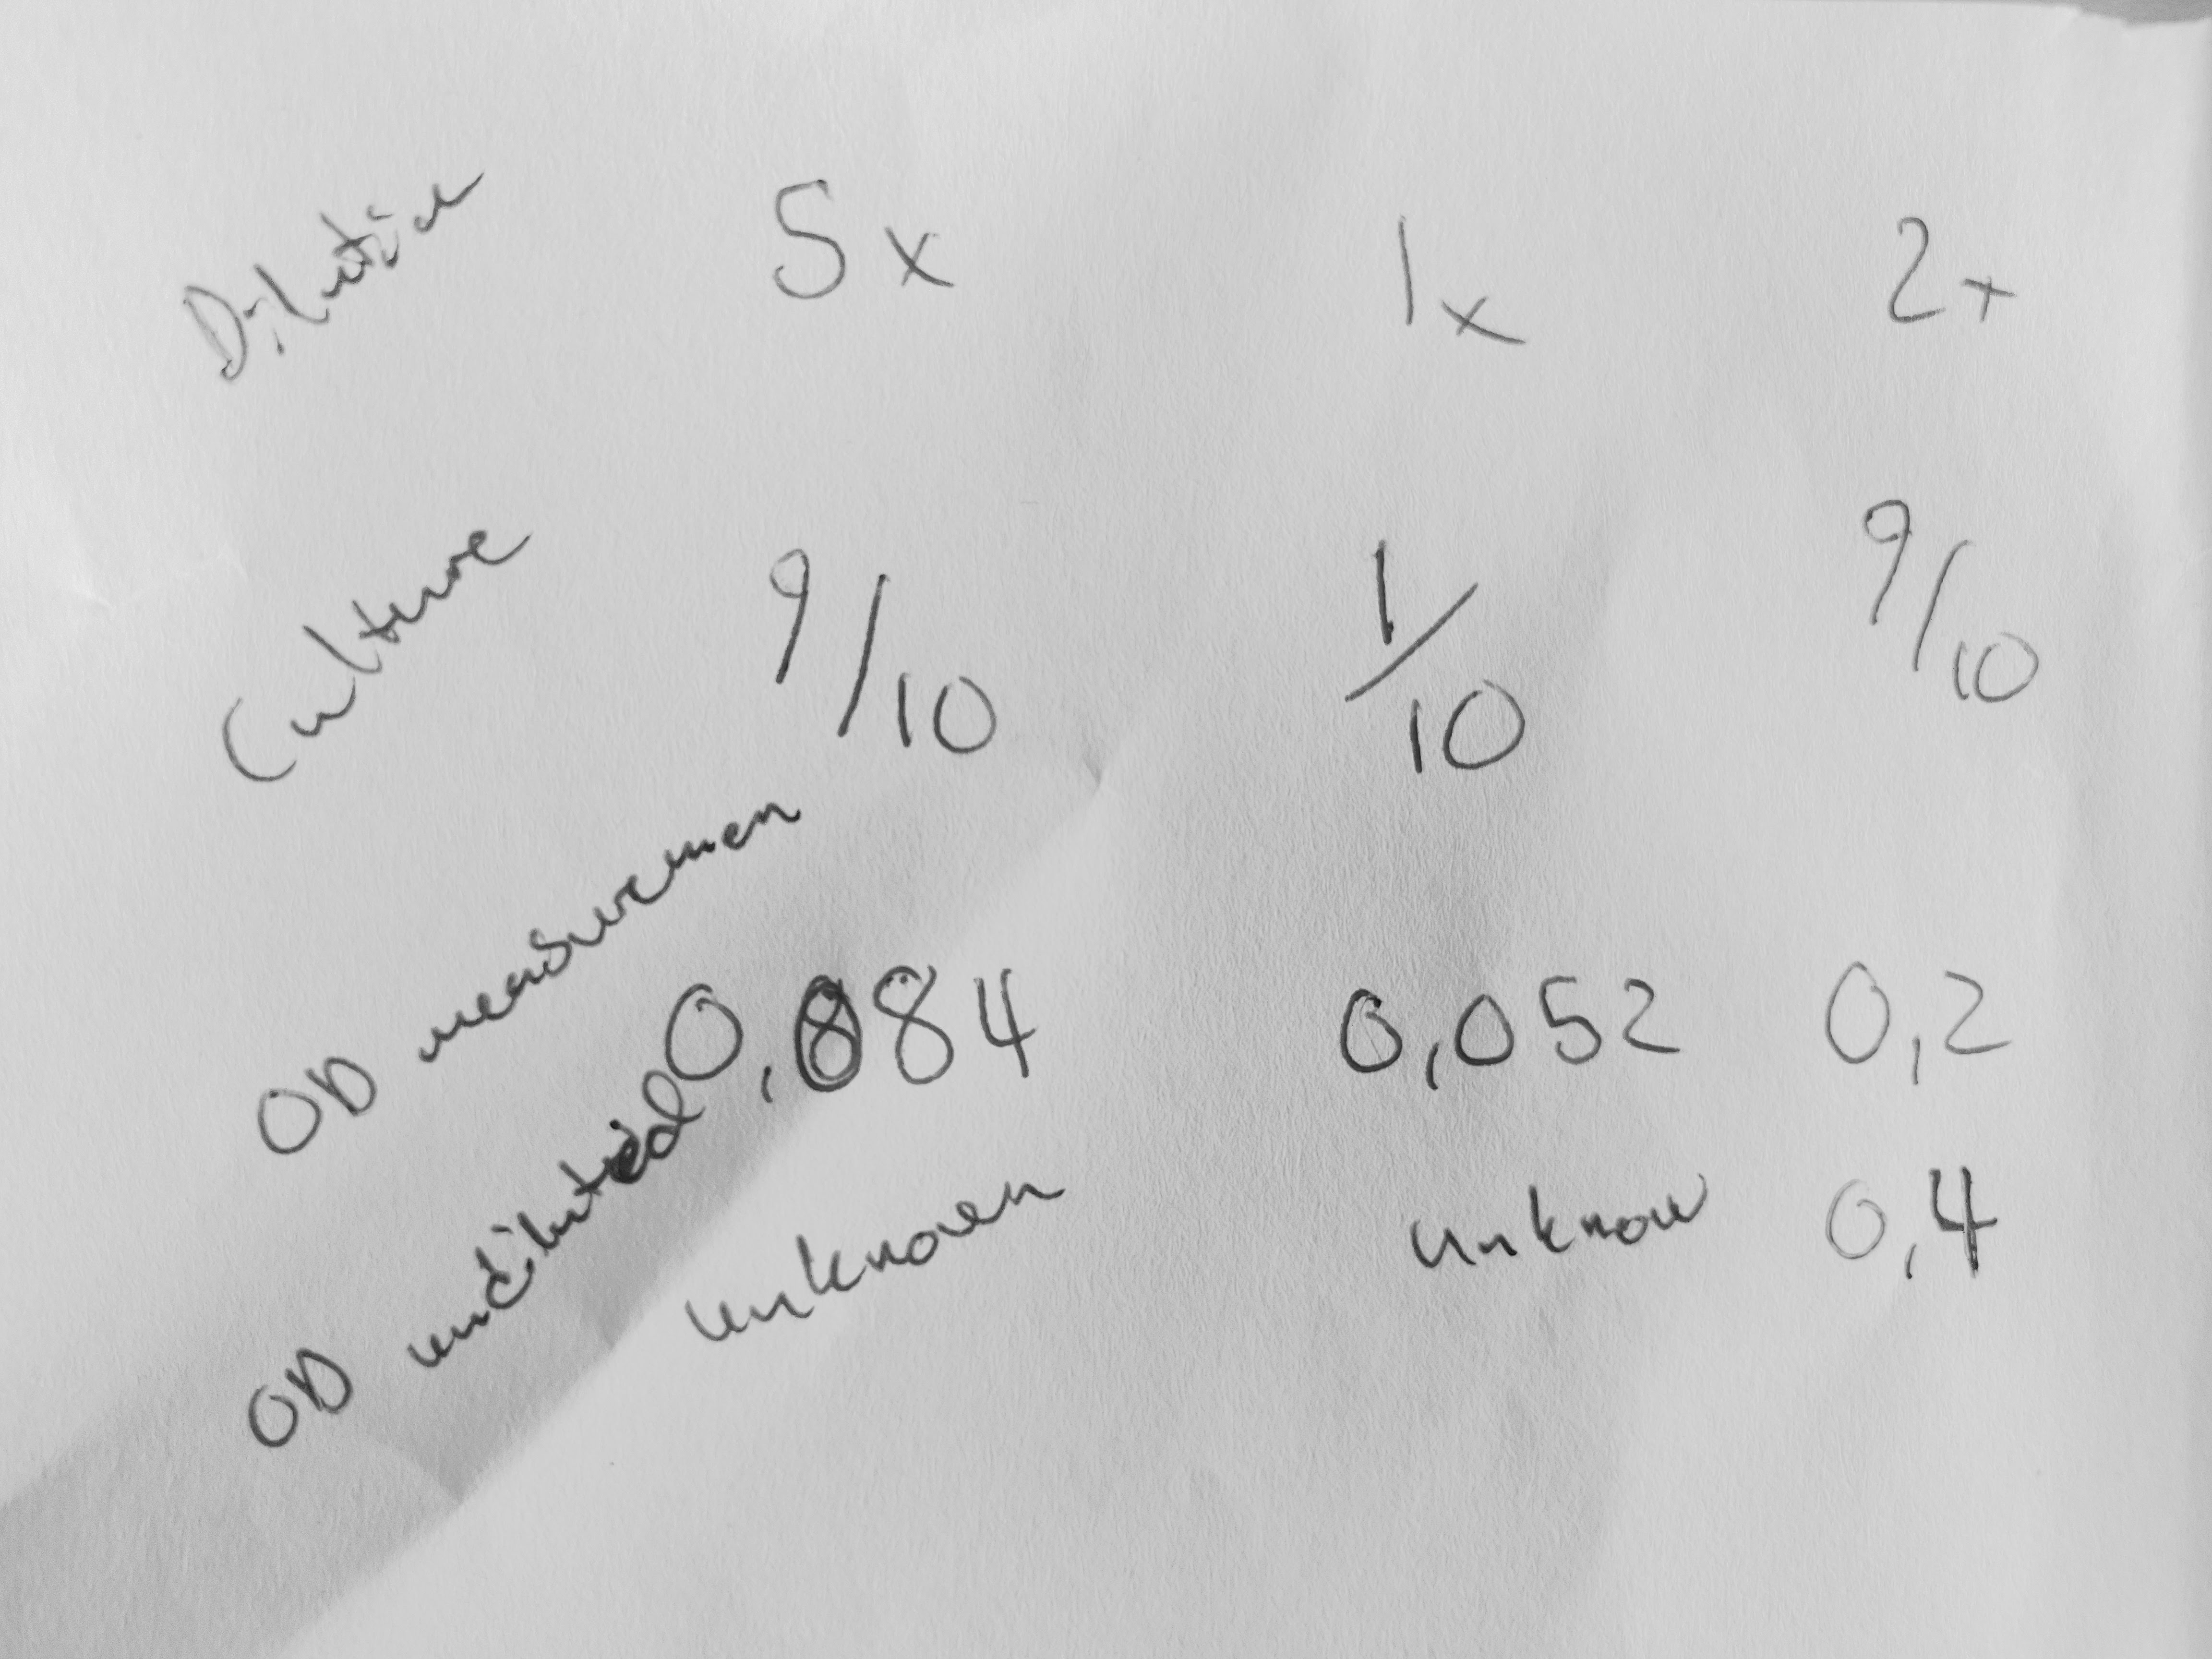

In [254]:
IPython.core.display.Image(utils.figures / '2021-04-15_ODmeasurements.jpg', width=300)

In [255]:
#utils.time_to_inculate(initialOD=0.005, td=0.33,)

Import gRNAs

pESC-URA-gRNA_XI2-2

In [256]:
pgRNA = pydna.dseqrecord.Dseqrecord(utils.from_benchling("PL_12_I6_(pESC-URA-gRNA_XI2-2)"))

In [257]:
pgRNA.name = "pESC-URA-gRNA_XI2-2"
pgRNA.annotations['batches'] = [{'location'    :'p1_a4',
                                 'volume'       : 170,
                                 'concentration': 234}]

Transformations
- Strains
    - MIA-HA-(21-110)
- Controls:
    - positive (colonies should appear)
        1. No parts and directly on YPD (to check cell viability)
        2. URA and TRP plasmid on SD-URA-TRP (to check transformed markers match selection media)
    - negative (colonies should not appear)
        1. transform cells with gRNA + TRP plasmid (to check whether gRNA cuts and thus kill cells when they miss repair template)

In [258]:
#2. import plasmids need for controls
TRP_plasmid = pydna.dseqrecord.Dseqrecord(utils.from_benchling("pL_01_C2_(pRS414-TRP)"))
TRP_plasmid.annotations['batches']=[{'location':'pL_01_C2', 'volume':30, 'concentration':190 }]
URA_plasmid = pydna.dseqrecord.Dseqrecord(utils.from_benchling("pL_01_C4_(pRS416-URA)"))
URA_plasmid.annotations['batches']=[{'location':'pL_01_C4', 'volume':20, 'concentration':600 }] # Lav egen batch Actual {'location':'pL_01_C4', 'volume':40, 'concentration':600 }

Reaction names

In [259]:
reaction_names = pool_assembly_names_short + ['n.ctr','p.ctr','p.ctr']

Reaction participants

In [260]:
reaction_participants = []
for row in pool_combinations_matrix:
    temp = []
    for ele in row:
        temp.append(ele)
    temp.append(pgRNA)
    reaction_participants.append(temp)

In [261]:
reaction_participants.append([pgRNA, TRP_plasmid]) # n.ctr
reaction_participants.append([URA_plasmid, TRP_plasmid]) #p.ctr
reaction_participants.append([])  #p.ctr

Wanted amounts of reaction participants
- Parts:
    - 0.5 pmol = 0.0005 nmol
- Plasmid:
    - 500 ng pESC-URA-gRNA_XI2-2
    - 0.5 pmol TRP and URA

In [262]:
#Construct dict with reaction name as keys and wanted amounts as values
pool_amplicons =  pool_UP_sites + pool_G8H_sites + pool_promoter_sites + pool_CPR_sites + pool_marker_sites + pool_DW_sites    
pool_amplicon_names = [amp.name for amp in pool_amplicons]
part_amounts_per_reaction = dict(zip(pool_amplicon_names,[0.0005]*len(pool_amplicon_names)))

# pool promoters contains amps for two fragments i.e. pG8H and pCPR
part_amounts_per_reaction['promoters'] = 0.001

# plasmid participants are typically given in ng....
#nmol_gRNA = utils.ng_to_nmol(ng = 500, bp = len(pgRNA))
nmol_gRNA = 0.00014
nmol_pctr_TRP = 0.0005
nmol_pctr_URA = 0.0005

# in nmol
wanted_amounts = {'pESC-URA-gRNA_XI2-2'  : nmol_gRNA,
                         'pL_01_C2_(pRS414-TRP)': nmol_pctr_TRP,
                         'pL_01_C4_(pRS416-URA)': nmol_pctr_URA,
                          **part_amounts_per_reaction}

In [263]:
wanted_amounts

{'pESC-URA-gRNA_XI2-2': 0.00014,
 'pL_01_C2_(pRS414-TRP)': 0.0005,
 'pL_01_C4_(pRS416-URA)': 0.0005,
 'XI-2_UP': 0.0005,
 'VminG8H_tADH1': 0.0005,
 'SmusG8H_tADH1': 0.0005,
 'RsepG8H_tADH1': 0.0005,
 'CacuG8H_tADH1': 0.0005,
 'OpumG8H_tADH1': 0.0005,
 'CroG8H_tADH1': 0.0005,
 'OeuG8H_tADH1': 0.0005,
 'CcalG8H_tADH1': 0.0005,
 'promoters': 0.001,
 'CroCPR_tCYC1': 0.0005,
 'AanCPR_tCYC1': 0.0005,
 'AraCPR_tCYC1': 0.0005,
 'CloCPR_tCYC1': 0.0005,
 'RseCPR_tCYC1': 0.0005,
 'AhuCPR_tCYC1': 0.0005,
 'AniCPR_tCYC1': 0.0005,
 'CacCPR_tCYC1': 0.0005,
 'OeuCPR_tCYC1': 0.0005,
 'CpoCPR_tCYC1': 0.0005,
 'cTRP1': 0.0005,
 'XI-2_DW': 0.0005}

In [264]:
media = ['SC-UT'] * len(pool_assembly_names)
media = media + ['SC-UT'] * 2 # controls
media = media + ['YPD'] # controls

Location neccesary parts. Bring out before and place afterwards

In [265]:
#pool_promoter_sites[0].annotations['batches'][0]['concentration'] = 100
#pool_UP_sites[0].annotations['batches'][0]['concentration'] = 31
#pool_DW_sites[0].annotations['batches'][0]['concentration'] = 45
#pool_marker_sites[0].annotations['batches'][0]['concentration'] = 122
#pgRNA.annotations['batches'][0]['concentration'] = 234

In [266]:
pool_amplicons[9].annotations['batches'] = [{'location':'test'}]

In [267]:
for amp in pool_amplicons + [pgRNA] + [URA_plasmid, TRP_plasmid]:
    print(amp.name, amp.annotations['batches'][0]['location'])

XI-2_UP l4_h9
VminG8H_tADH1 l4_f7
SmusG8H_tADH1 l4_f8
RsepG8H_tADH1 l4_f9
CacuG8H_tADH1 l4_g1
OpumG8H_tADH1 l4_g2
CroG8H_tADH1 l4_g3
OeuG8H_tADH1 l4_g5
CcalG8H_tADH1 l4_g6
promoters test
CroCPR_tCYC1 l4_g7
AanCPR_tCYC1 l4_g8
AraCPR_tCYC1 l4_g9
CloCPR_tCYC1 l4_h1
RseCPR_tCYC1 l4_h2
AhuCPR_tCYC1 l4_h3
AniCPR_tCYC1 l4_h4
CacCPR_tCYC1 l4_h5
OeuCPR_tCYC1 l4_h6
CpoCPR_tCYC1 l4_h7
cTRP1 l4_i2
XI-2_DW l4_i1
pESC-URA-gRNA_XI2-2 p1_a4
pL_01_C4_(pRS416-URA) pL_01_C4
pL_01_C2_(pRS414-TRP) pL_01_C2


In [270]:
for part in reaction_participants:
    for p in part:
        if p.name == 'promoters':
            print('yes')
            p.annotations = {'batches':[{'volume':100,'concentration':50, 'location':'unknown'}]}
        print(p.name,p.annotations['batches'])

XI-2_UP [{'box': 'l4', 'position': 'h9', 'volume': 500, 'concentration': 31, 'location': 'l4_h9'}]
VminG8H_tADH1 [{'box': 'l4', 'position': 'f7', 'volume': 100, 'concentration': 142, 'location': 'l4_f7'}]
yes
promoters [{'volume': 100, 'concentration': 50, 'location': 'unknown'}]
CroCPR_tCYC1 [{'box': 'l4', 'position': 'g7', 'volume': 100, 'concentration': 141, 'location': 'l4_g7'}]
cTRP1 [{'box': 'l4', 'position': 'i2', 'volume': 400, 'concentration': 122, 'location': 'l4_i2'}]
XI-2_DW [{'box': 'l4', 'position': 'i1', 'volume': 500, 'concentration': 45, 'location': 'l4_i1'}]
pESC-URA-gRNA_XI2-2 [{'location': 'p1_a4', 'volume': 170, 'concentration': 234}]
XI-2_UP [{'box': 'l4', 'position': 'h9', 'volume': 500, 'concentration': 31, 'location': 'l4_h9'}]
VminG8H_tADH1 [{'box': 'l4', 'position': 'f7', 'volume': 100, 'concentration': 142, 'location': 'l4_f7'}]
yes
promoters [{'volume': 100, 'concentration': 50, 'location': 'unknown'}]
AanCPR_tCYC1 [{'box': 'l4', 'position': 'g8', 'volume':

In [271]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None) 
transf_names = utils.transf_locations1(reaction_names, reaction_participants, wanted_amounts = wanted_amounts, water_dna_p_reac = 74, media = media)
transf_names.index += 1 
transf_names

name  XI-2_UP  VminG8H_tADH1  promoters  CroCPR_tCYC1  cTRP1  XI-2_DW  \
1    HA21      6.4            4.2      314.2           5.5    3.9      4.3   
2    HA22      6.4            4.2      314.2           NaN    3.9      4.3   
3    HA23      6.4            4.2      314.2           NaN    3.9      4.3   
4    HA24      6.4            4.2      314.2           NaN    3.9      4.3   
5    HA25      6.4            4.2      314.2           NaN    3.9      4.3   
6    HA26      6.4            4.2      314.2           NaN    3.9      4.3   
7    HA27      6.4            4.2      314.2           NaN    3.9      4.3   
8    HA28      6.4            4.2      314.2           NaN    3.9      4.3   
9    HA29      6.4            4.2      314.2           NaN    3.9      4.3   
10   HA30      6.4            4.2      314.2           NaN    3.9      4.3   
11   HA31      6.4            NaN      314.2           5.5    3.9      4.3   
12   HA32      6.4            NaN      314.2           NaN    3.9      4.3   
13   HA33      6.4            NaN      314.2           NaN    3.9      4.3   
14   HA34      6.4            NaN      314.2           NaN    3.9      4.3   
15   HA35      6.4            NaN      314.2           NaN    3.9      4.3   
16   HA36      6.4            NaN      314.2           NaN    3.9      4.3   
17   HA37      6.4            NaN      314.2           NaN    3.9      4.3   
18   HA38      6.4            NaN      314.2           NaN    3.9      4.3   
19   HA39      6.4            NaN      314.2           NaN    3.9      4.3   
20   HA40      6.4            NaN      314.2           NaN    3.9      4.3   
21   HA41      6.4            NaN      314.2           5.5    3.9      4.3   
22   HA42      6.4            NaN      314.2           NaN    3.9      4.3   
23   HA43      6.4            NaN      314.2           NaN    3.9      4.3   
24   HA44      6.4            NaN      314.2           NaN    3.9      4.3   
25   HA45      6.4            NaN      314.2           NaN    3.9      4.3   
26   HA46      6.4            NaN      314.2           NaN    3.9      4.3   
27   HA47      6.4            NaN      314.2           NaN    3.9      4.3   
28   HA48      6.4            NaN      314.2           NaN    3.9      4.3   
29   HA49      6.4            NaN      314.2           NaN    3.9      4.3   
30   HA50      6.4            NaN      314.2           NaN    3.9      4.3   
31   HA51      6.4            NaN      314.2           5.5    3.9      4.3   
32   HA52      6.4            NaN      314.2           NaN    3.9      4.3   
33   HA53      6.4            NaN      314.2           NaN    3.9      4.3   
34   HA54      6.4            NaN      314.2           NaN    3.9      4.3   
35   HA55      6.4            NaN      314.2           NaN    3.9      4.3   
36   HA56      6.4            NaN      314.2           NaN    3.9      4.3   
37   HA57      6.4            NaN      314.2           NaN    3.9      4.3   
38   HA58      6.4            NaN      314.2           NaN    3.9      4.3   
39   HA59      6.4            NaN      314.2           NaN    3.9      4.3   
40   HA60      6.4            NaN      314.2           NaN    3.9      4.3   
41   HA61      6.4            NaN      314.2           5.5    3.9      4.3   
42   HA62      6.4            NaN      314.2           NaN    3.9      4.3   
43   HA63      6.4            NaN      314.2           NaN    3.9      4.3   
44   HA64      6.4            NaN      314.2           NaN    3.9      4.3   
45   HA65      6.4            NaN      314.2           NaN    3.9      4.3   
46   HA66      6.4            NaN      314.2           NaN    3.9      4.3   
47   HA67      6.4            NaN      314.2           NaN    3.9      4.3   
48   HA68      6.4            NaN      314.2           NaN    3.9      4.3   
49   HA69      6.4            NaN      314.2           NaN    3.9      4.3   
50   HA70      6.4            NaN      314.2           NaN    3.9      4.3   
51   HA71      6.4         

In [272]:
for part in reaction_participants:
    for p in part:
        print(p.name, p.annotations['batches'])

XI-2_UP [{'box': 'l4', 'position': 'h9', 'volume': 500, 'concentration': 31, 'location': 'l4_h9'}]
VminG8H_tADH1 [{'box': 'l4', 'position': 'f7', 'volume': 100, 'concentration': 142, 'location': 'l4_f7'}]
promoters [{'volume': 100, 'concentration': 50, 'location': 'unknown'}]
CroCPR_tCYC1 [{'box': 'l4', 'position': 'g7', 'volume': 100, 'concentration': 141, 'location': 'l4_g7'}]
cTRP1 [{'box': 'l4', 'position': 'i2', 'volume': 400, 'concentration': 122, 'location': 'l4_i2'}]
XI-2_DW [{'box': 'l4', 'position': 'i1', 'volume': 500, 'concentration': 45, 'location': 'l4_i1'}]
pESC-URA-gRNA_XI2-2 [{'location': 'p1_a4', 'volume': 170, 'concentration': 234}]
XI-2_UP [{'box': 'l4', 'position': 'h9', 'volume': 500, 'concentration': 31, 'location': 'l4_h9'}]
VminG8H_tADH1 [{'box': 'l4', 'position': 'f7', 'volume': 100, 'concentration': 142, 'location': 'l4_f7'}]
promoters [{'volume': 100, 'concentration': 50, 'location': 'unknown'}]
AanCPR_tCYC1 [{'box': 'l4', 'position': 'g8', 'volume': 100, 'c

In [273]:
#pd.reset_option('all')

In [274]:
transf_names.sum(numeric_only = True)

XI-2_UP                    512.0
VminG8H_tADH1               42.0
promoters                25136.0
CroCPR_tCYC1                44.0
cTRP1                      312.0
XI-2_DW                    344.0
pESC-URA-gRNA_XI2-2        178.2
AanCPR_tCYC1                40.0
AraCPR_tCYC1                53.6
CloCPR_tCYC1                53.6
RseCPR_tCYC1                51.2
AhuCPR_tCYC1                51.2
AniCPR_tCYC1                45.6
CacCPR_tCYC1                58.4
OeuCPR_tCYC1                45.6
CpoCPR_tCYC1                44.0
SmusG8H_tADH1               45.0
RsepG8H_tADH1               44.0
CacuG8H_tADH1              152.0
OpumG8H_tADH1               46.0
CroG8H_tADH1                39.0
OeuG8H_tADH1                46.0
CcalG8H_tADH1               45.0
pL_01_C2_(pRS414-TRP)       16.4
pL_01_C4_(pRS416-URA)        2.7
water                   -21305.5
dtype: float64

promoters                 536

Have max 500 ul:
XI-2_UP                   512.0

Have max 100 µl of part pools:
- CacuG8H_tADH1             152.0
Add water for remaining and use what there is for transformation.

Make first 30 and controls

In [275]:
#transf_names.iloc[list(range(0,30)) + list(range(-3,-0))]

In [276]:
utils.volumes(vol_p_reac = 360, 
        no_of_reactions = 35,
        standard_reagents = ["PEG", "LiAc_1M", "ssDNA", "water_dna"],
        standard_volumes = [240, 36, 10, 74])

vol_p_reac  vol_p_35_reac
PEG             240.0         8400.0
LiAc_1M          36.0         1260.0
ssDNA            10.0          350.0
water_dna        74.0         2590.0
Total           360.0        12600.0

Expectation:
- colonies on plates: 
- 82 > 1-30 > 81 

In [277]:
IPython.core.display.Image(utils.imagingStation / '2021-04-19_1-3_81-83.jpg', width=600)

FileNotFoundError: No such file or directory: '/Users/Christine/Documents/Speciale/data/processed/012_Doc-it Imaging station/2021-04-19_1-3_81-83.jpg'

FileNotFoundError: No such file or directory: '/Users/Christine/Documents/Speciale/data/processed/012_Doc-it Imaging station/2021-04-19_1-3_81-83.jpg'

<IPython.core.display.Image object>

**Results**
- Almost no colonies on 1-30. colonies on 81 and 82.

**Discussion**
Troubleshooting. What's different from Christine succesfull transformation? 
1. DNA
    1. Controls strains show that cells where viable with correct URA and TRP marker and that gRNA's cut. This suggests that either too little DNA added for 1-30 or one fragments is missing. 
        1. too little DNA 
            1. Problem may be that I decided to not remove last 5 ml of water from cells before adding to transformation mix (cells to loose. removing water would loose to many cells, perhaps washed them one too many times?)
            2. 4x less molecules of each individual G8H, CPR, and Promoter part.
        2. fragment missing
            3. Did I not mix in a particular single part? Not likely
2. Cells 
    1. Bg colony. Did I pick a slow growing that still has burdening genes and less viability? Only way to use exactly same strain would be taking from Christines YPD control plate 2021-03-16_plate_18
    2. Less cells? She used OD ~ 100 ml OD2.1. Did i loose to many cells when washing? Not likely but would like more on positive control.
3. Plates
    1. Batch March. Works. Same as Christines succesfull transformation. Bettina concerned about april batch of SD-UTLH. Are new SD-UT plates good?

**Conclusion**
1. DNA
    1. Transf. 41 add up on G8H, CPR, and Promoter part .
    2. Transf. 42 add up on G8H, CPR, and Promoter as well as [UP DW and cTRP (15 ul of mix)]
    3. Scale up transf. mix to accomodate more water.
2. Cells
    1. Remove all water from cells before adding to transf. mix!
    2. Use MIA-HA-1 scrape from 2021-03-16_plate_18.
3. Plates
    1. plate p. ctr on both march and april SC-UT plate

**Make more parts**
- for UP promoters cTRP, DW 
- later for transf. 1-30
- gDNA template = colony no. 5 instead of 3

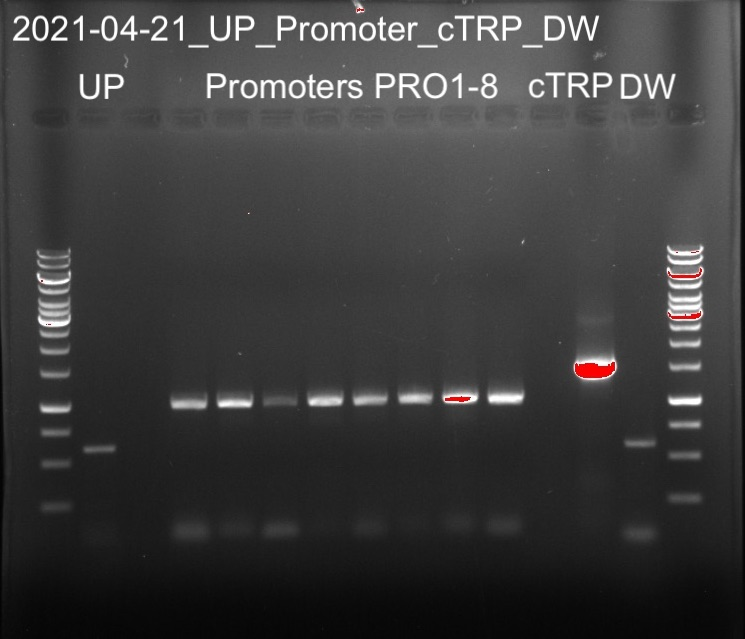

In [278]:
IPython.core.display.Image(utils.bioimager / '2021-04-21_UP_Promoter_cTRP_DW.jpg', width=400)

In [279]:
names = ['UP', 'PRO_01', 'PRO_02', 'PRO_03', 'PRO_04', 'PRO_05', 'PRO_06', 'PRO_07', 'PRO_08', 'cTRP', 'DW']
concs = utils.nanophotometer_concentrations(utils.nanophotometer / '2021-04-22_UP_Promoter_cTRP_DW.tsv')
vols = volumes = [100*4] + [100] * 8 + [100*4] + [100*4] 

In [280]:
promoter_names = names[1:9]
promoter_names = ['PCR_' + name for name in promoter_names]
promoter_concs = concs[1:9]
promoter_names

['PCR_PRO_01',
 'PCR_PRO_02',
 'PCR_PRO_03',
 'PCR_PRO_04',
 'PCR_PRO_05',
 'PCR_PRO_06',
 'PCR_PRO_07',
 'PCR_PRO_08']

In [281]:
# part/pool amount per reaction.
#part_amounts_per_reaction
#promoters = 0.001

# How many times are each part / pool needed?
#times_needed
#promoters = 90

# amount needed in total = amt_per_reaction * times_need
#pp_amounts_total = {}
#for key, value in part_amounts_per_reaction.items():
#    amt = value
#    times = times_needed[key]
#    amount_total = amt * times
#    pp_amounts_total.update({key: amount_total})

# pooled amounts need = 1/8 of needed from individual promoter
promoters_amounts_total = 0.001*40 #pp_amounts_total['Promoters']
#promoter_names = ('PCR_PRO_01','PCR_PRO_06','PCR_PRO_07','PCR_PRO_08','PCR_PRO_02','PCR_PRO_03','PCR_PRO_04','PCR_PRO_05')
# inidividual promoter parts needed
promoter_parts_amounts_total = {k: v for (k, v) in zip(promoter_names,[promoters_amounts_total/8]*len(promoter_names))}
promoters = [amplicon_by_name(name,amplicons) for name in promoter_names]
for prom, conc in zip(promoters, promoter_concs):
    prom.annotations['batches'][0]['concentration'] = conc

def wanted_mass(wanted_moles, size):
    """
    wanted moles in nmol, 
    size in bp
    
    Returns:
    in ng = nmol * bp * 650 ng/(nmol * bp)
    
    """
    w_mass = wanted_moles * size * 650
    w_mass_rounded = round(w_mass,1)
    return(w_mass_rounded)

def wanted_volume(wanted_mass, actual_concentration):
    """
    wanted mass in ng
    actual_concentration in ng/ul
    return in ul
    """
    wanted_volume = wanted_mass / actual_concentration
    wanted_volume_rounded = round(wanted_volume,1)
    return(wanted_volume_rounded)

#What volume is that?
volumes = []
ngs = []
for amp in promoters:
    w_moles = promoter_parts_amounts_total[amp.name]
    w_mass = wanted_mass(wanted_moles=w_moles, size=len(amp))
    act_conc = amp.annotations['batches'][0]['concentration']
    w_volume = wanted_volume(w_mass, act_conc)
    volumes.append(w_volume)
    ngs.append(w_volume * act_conc)
    print(amp.name, w_volume) #, act_conc

    
total_vol = sum(volumes)
total_ngs = sum(ngs)
total_conc = total_ngs/total_vol
print('total volume: ', sum(volumes))
print()
print('total ngs: ', sum(ngs))
print('total conc: ', total_conc)
#There is enough

# Add 30 µl water to have enough
# Create new entity + batch of Promoters pools
    # volume 608.7 + 30 = 638.7 ul
    # concentration = 100  ng/ul
# Make sure this batch is used for DNA mix calculations

PCR_PRO_01 55.5
PCR_PRO_02 56.1
PCR_PRO_03 80.7
PCR_PRO_04 57.2
PCR_PRO_05 112.0
PCR_PRO_06 61.3
PCR_PRO_07 64.1
PCR_PRO_08 48.1
total volume:  535.0

total ngs:  26981.019999999997
total conc:  50.43181308411214


In [282]:
promoter_pool_entity = cro_strain_batches[cro_strain_batches['entity_name']=='Promoters'].reset_index(drop=True)
promoter_pool_entity['entity_name'] = 'promoters'
promoter_pool_entity['position'] = 'D6'
promoter_pool_entity['volume'] = total_vol + 20
promoter_pool_entity['concentration'] = total_conc
promoter_pool_entity

entity_name  \
0   promoters   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Bases  \
0  AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA   

  Box_barcode position  volume volume unit  concentration concentration unit  
0    81BOX827       D6   555.0          ul      50.431813              ng/ul

In [283]:
if export_csvs:
    promoter_pool_entity.to_csv('promoter_pool_entity.csv',index=False)
    os.system('mv promoter_pool_entity.csv $HOME/Desktop/')

In [284]:
#IPython.core.display.Image(utils.imagingStation / '2021-04-26_41-42_81-82a.jpg', width=600)

**Bg strain culture experiment**

For 5 transformations (41,42,n.ctr, 2xp.ctr): Need 5 ml cells (OD1) * 5 = 25 ml YPD

Background:
- Cells, DNA, and Plates
    - see above conclusion

M&M:
- Day -1 09:00
    1. MIA-HA-1 scrape from 2021-03-16_plate_18 into 80 ul. add 4, 36 ul to 20 ml YPD Sam batch and 36 ul to new batch. 

Results:
- Day 1
    1. OD at 08:50 = 0.592x10 = 5.92 (Only cells in new YPD batch grew!). Take 5 ml into 45 ml. If OD ~ 2 at 14.00 then transform else abort.
    2. OD at 08:50 = 0.628x 1 = 0.628
    3. OD at 12:47 = 0.144x10 = 1.44
    4. OD at 14.40 = 0.235x10 = 2.35

In [285]:
from datetime import timedelta
time = timedelta(hours = 2) * 0.942
print("h:m:s: ", str(time))

h:m:s:  1:53:02.400000


In [286]:
# What's the doubling time?
utils.ODtime(initialOD = 1.44, time = 1.942, td = 0.3635)

2.349

**Results**
- doubling time: 0.36 > 0.33
**Discussion**
- The colony Christine used and thus also colonies on 2021-03-16_plate_18 grows faster than other colonies on MIA-HA-1 streak.
**Conclusion**
- MIA-HA-1 g.stock not mutated. Only the biggest colony on my MIA-HA-1 streak is which Christine used for her transformation 04-SDP-croStrains!

In [287]:
transf_idx = [40, 41, 80, 81, 81]

reaction_names_1 = [reaction_names[i] for i in transf_idx]

reaction_participants_1 = [reaction_participants[i] for i in transf_idx]

#UPDATE wanted amounts
wanted_amounts_1 = wanted_amounts.copy()
for k,v in wanted_amounts_1.items():
    if k.endswith('tADH1') or k.endswith('tCYC1') or k == 'promoters':
        wanted_amounts_1[k] = wanted_amounts_1.get(k, 0) * 3

media_1 = [media[i] for i in transf_idx]
media_1[-1] = 'SC-UT april batch'

transf_names = utils.transf_locations1(reaction_names_1, reaction_participants_1, wanted_amounts = wanted_amounts_1, water_dna_p_reac = 92.5, media = media_1)
transf_names.index += 1
transf_names = transf_names.set_index([pd.Index(['41', '42', '81', '82','82a'])])
transf_names

name  XI-2_UP  OpumG8H_tADH1  promoters  CroCPR_tCYC1  cTRP1  XI-2_DW  \
41    HA61      6.4           13.8      942.5          16.4    3.9      4.3   
42    HA62      6.4           13.8      942.5           NaN    3.9      4.3   
81   n.ctr      NaN            NaN        NaN           NaN    NaN      NaN   
82   p.ctr      NaN            NaN        NaN           NaN    NaN      NaN   
82a  p.ctr      NaN            NaN        NaN           NaN    NaN      NaN   

     pESC-URA-gRNA_XI2-2  AanCPR_tCYC1  pL_01_C2_(pRS414-TRP)  \
41                   2.2           NaN                    NaN   
42                   2.2          15.0                    NaN   
81                   2.2           NaN                    8.2   
82                   NaN           NaN                    8.2   
82a                  NaN           NaN                    8.2   

     pL_01_C4_(pRS416-URA)  water           plate on  
41                     NaN -897.0              SC-UT  
42                     NaN -895.6              SC-UT  
81                     NaN   82.1              SC-UT  
82                     2.7   81.6              SC-UT  
82a                    2.7   81.6  SC-UT april batch

In [288]:
utils.volumes(vol_p_reac = 450, 
        no_of_reactions = 8,
        standard_reagents = ["PEG", "LiAc_1M", "ssDNA", "water_dna"],
        standard_volumes = [240, 36, 10, 74])

vol_p_reac  vol_p_8_reac
PEG             300.0        2400.0
LiAc_1M          45.0         360.0
ssDNA            12.5         100.0
water_dna        92.5         740.0
Total           450.0        3600.0

In [289]:
IPython.core.display.Image(utils.imagingStation / '2021-04-28_41-42_81-82a.jpg', width=600)

FileNotFoundError: No such file or directory: '/Users/Christine/Documents/Speciale/data/processed/012_Doc-it Imaging station/2021-04-28_41-42_81-82a.jpg'

FileNotFoundError: No such file or directory: '/Users/Christine/Documents/Speciale/data/processed/012_Doc-it Imaging station/2021-04-28_41-42_81-82a.jpg'

<IPython.core.display.Image object>

**Expectation**
- 82-82a > 41-42 > 81 
- Obs 82-82a transformed with half molar DNA amount as 41-42 and 81 to save plasmid stock.

**Results**
- 82-82a > 81 > 41-42

**Discussion**

Works:
1. Cells. Looks/smells like yeast!
2. Plates. Know works from last time. To be completely sure could have transformed 82 without one or the other marker plasmid. March and April media batch seems equally good!
3. gRNA works. Know from before. also 81<82. However cheaters occur e.g. by NHEJ or other mutations. On 81, all cells must have URA marker (on gRNA). 

4. DNA. 
    - 82-82a: .25 pmol URA and TRP marker plasmid
    - 81: .14 of gRNA(URA) and .25 TRP
    - 41-42: .5 pmol UP, cTRP, DW and 4x.125 of each CDS, prom, prom CDS, .14 of gRNA.
        - Correct genotype?
        - mol amount wise gRNA only .14. Increase? need URA marker to survive
        - Why < 81?
            - DNA concentration in transf. mix effectively ~ 1/2 due to increase total volume (see below: Water & DNA volumes). Actual URA marker concentration half of what was expected from .14 pmol. 
            
            - 19 parts + 1 gRNA transformation, assembly and integration needed. In contrast, 81: 2 parts + 1 gRNA transformation, no assembly and integration. 
            - Comparing my "one pot" transformation (20 parts in total where 8 specific parts must end up in a particular cell during heatshock) to Christines 16 x "single pot" transformation of 8 fragments. Is it necessary to transform a higher amount of each part when transforming 20 fragments compared to only 8 specific ones? 


Water & DNA volumes:
- 41:  74 + 20 + 16 + 14      = 124 ul (initial mix + promoters, G8H, CPR)
- 42:  74 + 20 + 15 + 14 + 15 = 138 ul (initial mix + promoters, G8H, CPR, UP_DW_cTRP_mix)
- 81:  74                     =  74 ul
- 82:  74                     =  74 ul
- 82a: 74                     =  74 ul
- In 450 total transf. mix volume (92.5 ul DNA).


**Conclusion**
- Picking correct bg strain (from 2021-03-16_plate_18) helped. Increasing part amounts would probably also if the concentration wasn't lowered at the same time.
More likely too little DNA. Cannot be fragment missing.
- try transf. 43 
    1. with already mixed DNA + 2021-03-16_plate_18
    2. remixed with higher concentration of promoters, G8H, CPR (but not higher volumes!) + 2021-03-16_plate_18.

- April plate batch is good.

**Bg strain culture experiment**

For 5 transformations (43,n.ctr, 2xp.ctr): Need 5 ml cells (OD1) * 5 = 20 ml YPD

Background:
- Cells, DNA, and Plates
    - see above conclusion

M&M:
- Day -1 at 12.00
    1. MIA-HA-1 scrape from 2021-03-16_plate_18 into 40 ul (1/4 of last time) . Add 4, 36 ul to 2x20 ml YPD. 

Results:
- Day 1
    1. OD at 09:00 = 0.178x2 = 0.356. Transfer all ~20 ml to shakeflask.
    2. OD at 11:19 = 0.332x2 = 0.664
    3. OD at 13:30 = 0.603x2 = 1.206 Transform (add additional 5 ml of ~ OD 2)

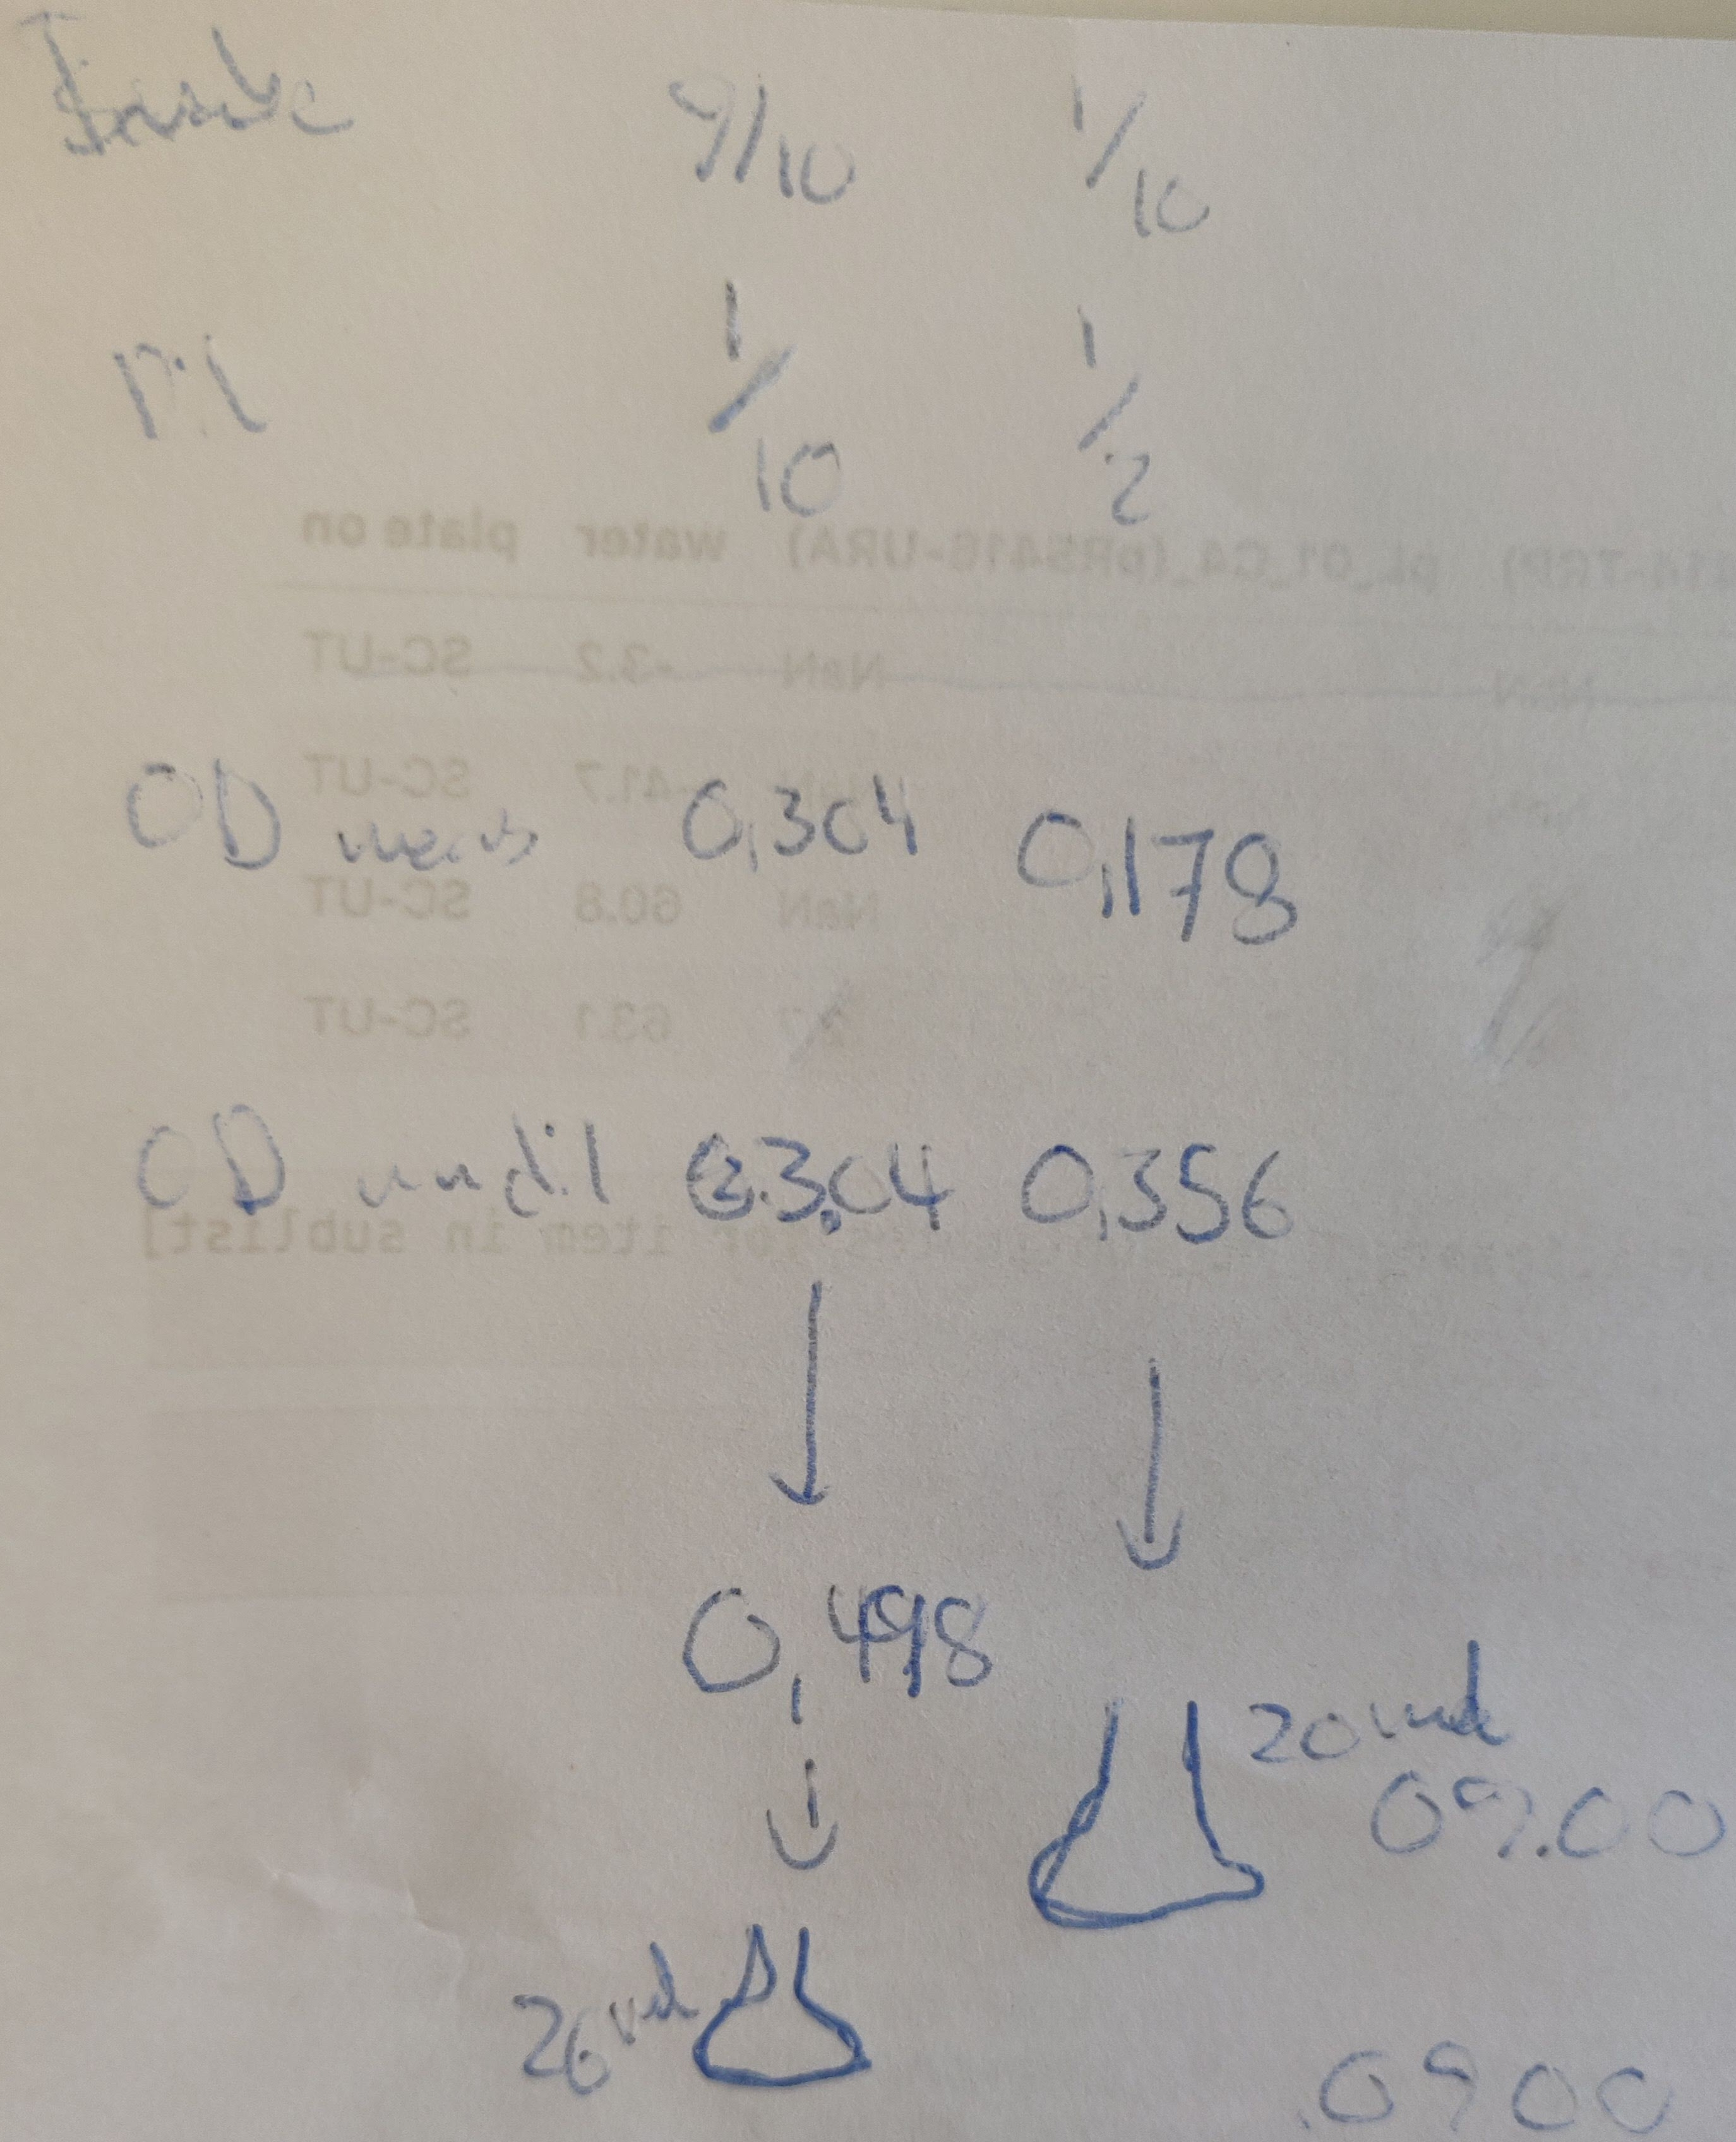

In [290]:
IPython.core.display.Image(utils.figures / '2021-04-29_ODmeasurements.jpg', width=300)

In [291]:
from datetime import timedelta
time = timedelta(hours = 2) * 0.942
print("h:m:s: ", str(time))

h:m:s:  1:53:02.400000


In [292]:
# What's the doubling time?
utils.ODtime(initialOD = 1.44, time = 1.942, td = 0.3635)

2.349

**Results**
- doubling time: 0.36 > 0.33
**Discussion**
- The colony Christine used and thus also colonies on 2021-03-16_plate_18 grows faster than other colonies on MIA-HA-1 streak.
**Conclusion**
- MIA-HA-1 g.stock not mutated. Only the biggest colony on my MIA-HA-1 streak is which Christine used for her transformation 04-SDP-croStrains!

In [293]:
transf_idx = [43, 43, 80, 81]

reaction_names_2 = [reaction_names[i] for i in transf_idx]

reaction_participants_2 = [reaction_participants[i] for i in transf_idx]

amnt = 0.0005
nmol_grna = utils.ng_to_nmol(ng = 500, bp = len(pgRNA))
wanted_amounts_2 = [[] for i in range(len(reaction_participants_2))]
names_matrix = [[] for i in range(len(reaction_participants_2))]
for reac_no, reac in enumerate(reaction_participants_2):
    for parti_no, parti in enumerate(reac):
        names_matrix[reac_no].append(parti.name)
        if reac_no == 1 and parti.name == 'promoters':
            wanted_amounts_2[reac_no].append(amnt * 4)
        elif reac_no == 1 and (parti.name.endswith('tADH1') or parti.name.endswith('tCYC1')):    
            wanted_amounts_2[reac_no].append(amnt * 2)
        elif parti.name == 'promoters':
            wanted_amounts_2[reac_no].append(amnt * 2)
        elif reac_no == 1 and parti.name == 'pESC-URA-gRNA_XI2-2':
            wanted_amounts_2[reac_no].append(amnt)
        elif parti.name == 'pESC-URA-gRNA_XI2-2':
            wanted_amounts_2[reac_no].append(nmol_grna)
        else:
            wanted_amounts_2[reac_no].append(amnt)
            
        if parti.name == 'XI-2_UP' or parti.name == 'XI-2_DW':
            parti.annotations['batches'][0]['position'] = 'I9'
            parti.annotations['batches'][0]['concentration'] = 11
        elif parti.name == 'cTRP1':
            parti.annotations['batches'][0]['position'] = 'I9'
            parti.annotations['batches'][0]['concentration'] = 40
        elif parti.name == 'pESC-URA-gRNA_XI2-2':
            parti.annotations['batches'][0]['position'] = 'a5'
            parti.annotations['batches'][0]['concentration'] = 100
        elif parti.name == 'promoters':
            parti.annotations['batches'][0]['position'] = 'd6'
            parti.annotations['batches'][0]['concentration'] = 50
        

media_2 = [media[i] for i in transf_idx]

transf_names = utils.transf_locations2(reaction_names_2, reaction_participants_2, wanted_amounts = wanted_amounts_2, water_dna_p_reac = 74, media = media_2)
transf_names.index += 1
transf_names = transf_names.set_index([pd.Index(['43','43a', '81', '82'])])
transf_names

name  XI-2_UP  OpumG8H_tADH1  promoters  CloCPR_tCYC1  cTRP1  XI-2_DW  \
43    HA64     18.0            4.6      314.2           6.7   11.8     17.7   
43a   HA64     18.0            9.2      628.3          13.5   11.8     17.7   
81   n.ctr      NaN            NaN        NaN           NaN    NaN      NaN   
82   p.ctr      NaN            NaN        NaN           NaN    NaN      NaN   

     pESC-URA-gRNA_XI2-2  pL_01_C2_(pRS414-TRP)  pL_01_C4_(pRS416-URA)  water  \
43                   5.0                    NaN                    NaN -304.0   
43a                 18.6                    NaN                    NaN -643.1   
81                   5.0                    8.2                    NaN   60.8   
82                   NaN                    8.2                    2.7   63.1   

    plate on  
43     SC-UT  
43a    SC-UT  
81     SC-UT  
82     SC-UT

In [294]:
reaction_participants_2_flat_no_duplicates = utils.recs_no_duplicates([item for sublist in reaction_participants_2 for item in sublist])
lst = transf_names.columns.tolist()
lst = [x for x in lst if x not in ('name', 'water', 'plate on')]
assert len(reaction_participants_2_flat_no_duplicates) == len(lst)
#reaction_participants_2_flat_no_duplicates

In [295]:
for amp in reaction_participants_2_flat_no_duplicates:
    print(amp.name, amp.annotations['batches'][0]['location'], amp.annotations['batches'][0]['concentration'])

XI-2_UP l4_h9 11
OpumG8H_tADH1 l4_g2 134
promoters unknown 50
CloCPR_tCYC1 l4_h1 114
cTRP1 l4_i2 40
XI-2_DW l4_i1 11
pESC-URA-gRNA_XI2-2 p1_a4 100
pL_01_C2_(pRS414-TRP) pL_01_C2 190
pL_01_C4_(pRS416-URA) pL_01_C4 600


In [296]:
transf_names.sum(numeric_only = True)

XI-2_UP                   36.0
OpumG8H_tADH1             13.8
promoters                942.5
CloCPR_tCYC1              20.2
cTRP1                     23.6
XI-2_DW                   35.4
pESC-URA-gRNA_XI2-2       28.6
pL_01_C2_(pRS414-TRP)     16.4
pL_01_C4_(pRS416-URA)      2.7
water                   -823.2
dtype: float64

In [297]:
utils.volumes(vol_p_reac = 360, 
        no_of_reactions = 4.25,
        standard_reagents = ["PEG", "LiAc_1M", "ssDNA", "water_dna"],
        standard_volumes = [240, 36, 10, 74])

vol_p_reac  vol_p_4.25_reac
PEG             240.0           1020.0
LiAc_1M          36.0            153.0
ssDNA            10.0             42.5
water_dna        74.0            314.5
Total           360.0           1530.0

In [298]:
IPython.core.display.Image(utils.imagingStation / '2021-05-03_43-43a_81-82.jpg', width=600)

FileNotFoundError: No such file or directory: '/Users/Christine/Documents/Speciale/data/processed/012_Doc-it Imaging station/2021-05-03_43-43a_81-82.jpg'

FileNotFoundError: No such file or directory: '/Users/Christine/Documents/Speciale/data/processed/012_Doc-it Imaging station/2021-05-03_43-43a_81-82.jpg'

<IPython.core.display.Image object>

**Expectation**
- 82 > 43-43a > 81 
- Obs 82-81 transformed with half molar DNA amount as 43 (to save plasmid stock).

**Results**
- 82, 81 > 43a > 43

**Discussion**

Works:
1. Cells. Looks/smells like yeast!
2. Plates. Know works from last time.
3. gRNA works. Know from before. 
4. DNA. 
    - 82: .25 pmol URA and TRP marker plasmid
    - 81: .14 of gRNA(URA) and .25 TRP
    - 43: .5 pmol UP, cTRP, DW and 4x.125 of each CDS, prom, prom CDS, .14 of gRNA.
    - 43a: .5 pmol UP, cTRP, DW and 4x.25 of each CDS, prom, prom CDS, .5 of gRNA.
        - Correct genotype?
        - mol amount wise gRNA only .14. Increase? need URA marker to survive
        - Why > 43
            - Must be 2x amounts (and thereby concentration since total volume remained constant) of CDS, prom, prom CDS and/or 4 x gRNA. 
        - Why < 81?
            - 19 parts + 1 gRNA transformation, assembly and integration needed. In contrast, 81: 2 parts + 1 gRNA transformation, no assembly and integration. 
            - Comparing my "one pot" transformation (20 parts in total where 8 specific parts must end up in a particular cell during heatshock) to Christines 16 x "single pot" transformation of 8 fragments. Is it necessary to transform a higher amount of each part when transforming 20 fragments compared to only 8 specific ones? 

Water & DNA volumes:
- 43:                         = 74 ul (initial mix)
- 43a:  18+9.2+26.9+13.5+18    = 85 ul (initial mix with 2x promoters, G8H, CPR)
- 81:  74                     =  74 ul
- 82:  74                     =  74 ul


**Conclusion**
- not a fragment missing. Too low amount of parts. It seems necessary to transform a higher amount of parts overall when transforming 20 fragments compared to 8 specific ones. Makes good sense when considering 20 parts in total where 8 specific parts must end up in a particular cell during heatshock.

Did increasing gRNA amount help??

Perform 31-40, 44-60

**Bg strain culture experiment**

For 30 transformations (31-40, 44-60,n.ctr, 2xp.ctr): Need 5 ml cells (OD1) * 30 = 150 ml YPD

Background:
- Cells, DNA, and Plates
    - see above conclusion

M&M:
- Day -1 at 11.00
    1. MIA-HA-1 scrape from 2021-03-16_plate_18 into 160 ul (same as last time). Add 16, 144 ul to 2x80 ml YPD in 2x250ml shake flasks. 

Results:
- Day 1 OD measurements
    1. 08:10; 0.155x5 = 0.775 & 0.089x1 = 0.089. Mix and split.
    2. 08:26; 0.234x2 = 0.468 & 0.242x2 = 0.484
    
If td = 0.3635 (same as last), then 12:12; 1.3. Then transform

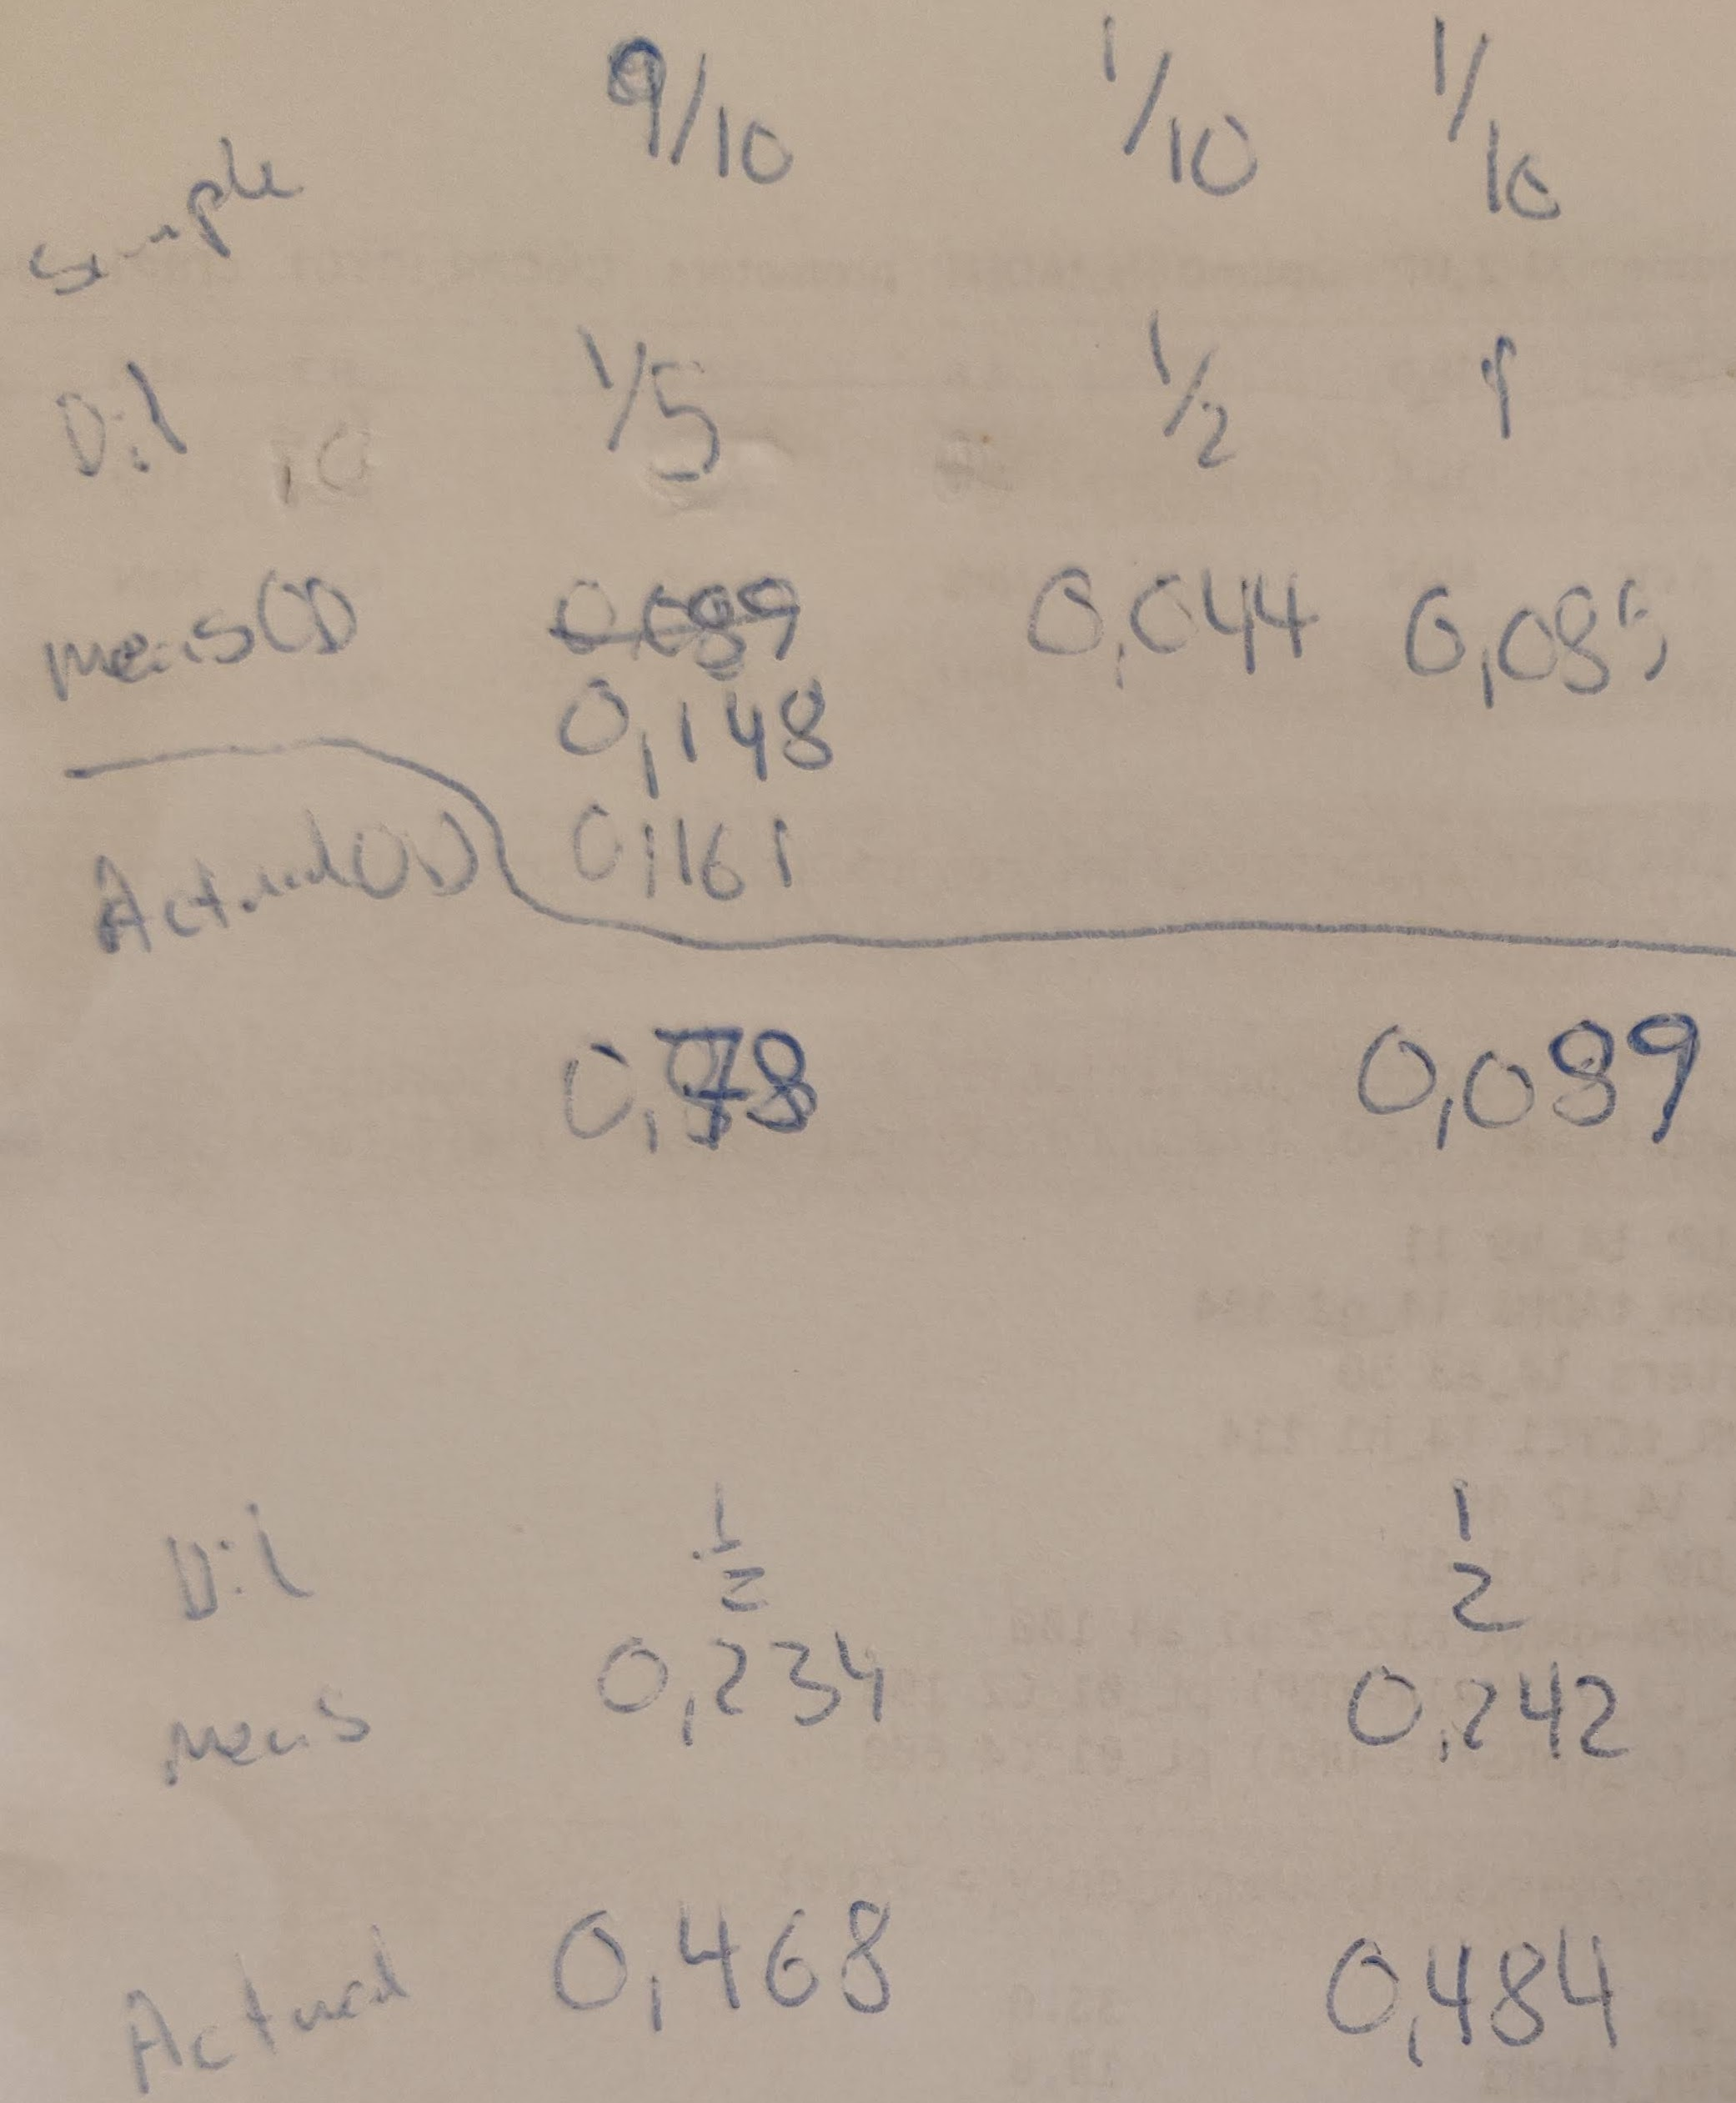

In [299]:
IPython.core.display.Image(utils.figures / '2021-05-04_ODmeasurements.jpg', width=300)

In [300]:
from datetime import timedelta
time = timedelta(hours = 2) * 0.942
print("h:m:s: ", str(time))

h:m:s:  1:53:02.400000


In [301]:
# What's the doubling time?
utils.ODtime(initialOD = 0.475, time = 4, td = 0.3635)

1.301

**Results**
**Discussion**
**Conclusion**

In [306]:

for part in reaction_participants_3:
    for p in part:
        print(p.name,p.annotations['batches'][0]['concentration'])

XI-2_UP 11
CacuG8H_tADH1 40
promoters 50
AanCPR_tCYC1 152
cTRP1 40
XI-2_DW 11
pESC-URA-gRNA_XI2-2 100
XI-2_UP 11
CacuG8H_tADH1 40
promoters 50
AraCPR_tCYC1 111
cTRP1 40
XI-2_DW 11
pESC-URA-gRNA_XI2-2 100
XI-2_UP 11
CacuG8H_tADH1 40
promoters 50
CloCPR_tCYC1 114
cTRP1 40
XI-2_DW 11
pESC-URA-gRNA_XI2-2 100
XI-2_UP 11
CacuG8H_tADH1 40
promoters 50
RseCPR_tCYC1 121
cTRP1 40
XI-2_DW 11
pESC-URA-gRNA_XI2-2 100
XI-2_UP 11
CacuG8H_tADH1 40
promoters 50
AhuCPR_tCYC1 120
cTRP1 40
XI-2_DW 11
pESC-URA-gRNA_XI2-2 100
XI-2_UP 11
CacuG8H_tADH1 40
promoters 50
AniCPR_tCYC1 131
cTRP1 40
XI-2_DW 11
pESC-URA-gRNA_XI2-2 100
XI-2_UP 11
CacuG8H_tADH1 40
promoters 50
CacCPR_tCYC1 105
cTRP1 40
XI-2_DW 11
pESC-URA-gRNA_XI2-2 100
XI-2_UP 11
CacuG8H_tADH1 40
promoters 50
OeuCPR_tCYC1 133
cTRP1 40
XI-2_DW 11
pESC-URA-gRNA_XI2-2 100
XI-2_UP 11
CacuG8H_tADH1 40
promoters 50
CpoCPR_tCYC1 134
cTRP1 40
XI-2_DW 11
pESC-URA-gRNA_XI2-2 100
XI-2_UP 11
OpumG8H_tADH1 134
promoters 50
CroCPR_tCYC1 141
cTRP1 40
XI-2_DW 11
pES

In [307]:
#Perform 31-40, 44-60
transf_idx = list(range(31,41)) + list(range(44,61)) + [81,82]
reaction_names_3 = [reaction_names[i] for i in transf_idx]
reaction_participants_3 = [reaction_participants[i] for i in transf_idx]

amnt = 0.0005
wanted_amounts_3 = [[] for i in range(len(reaction_participants_3))]
names_matrix = [[] for i in range(len(reaction_participants_3))]
for reac_no, reac in enumerate(reaction_participants_3):
    for parti_no, parti in enumerate(reac):
        wanted_amounts_3[reac_no].append(amnt)
        names_matrix[reac_no].append(parti.name)
        #if parti.name == 'promoters':
        #    wanted_amounts_2[reac_no].append(amnt)
        #elif parti.name.endswith('tADH1') or parti.name.endswith('tCYC1'):    
        #    wanted_amounts_2[reac_no].append(amnt * 2)
        #elif parti.name == 'promoters':
        #    wanted_amounts_2[reac_no].append(amnt * 2)
        #elif parti.name == 'pESC-URA-gRNA_XI2-2':
        #    wanted_amounts_2[reac_no].append(amnt)
        #else:
        #    wanted_amounts_2[reac_no].append(amnt)
            
        #if parti.name == 'XI-2_UP' or parti.name == 'XI-2_DW':
        #    parti.annotations['batches'][0]['position'] = 'I9'
        #    parti.annotations['batches'][0]['concentration'] = 11
        #elif parti.name == 'cTRP1':
        #    parti.annotations['batches'][0]['position'] = 'I9'
        #    parti.annotations['batches'][0]['concentration'] = 40
        #elif parti.name == 'pESC-URA-gRNA_XI2-2':
        #    parti.annotations['batches'][0]['position'] = 'a5'
        #    parti.annotations['batches'][0]['concentration'] = 100
        #elif parti.name == 'promoters':
        #    parti.annotations['batches'][0]['position'] = 'd6'
        #    parti.annotations['batches'][0]['concentration'] = 50
        

media_3 = [media[i] for i in transf_idx]

transf_names = utils.transf_locations2(reaction_names_3, reaction_participants_3, wanted_amounts = wanted_amounts_3, water_dna_p_reac = 74, media = media_3)
transf_names.index += 1
transf_names = transf_names.set_index([pd.Index([str(ID) for ID in transf_idx])])
transf_names

name  XI-2_UP  CacuG8H_tADH1  promoters  AanCPR_tCYC1  cTRP1  XI-2_DW  \
31   HA52     18.0           15.2      157.1           5.0   11.8     17.7   
32   HA53     18.0           15.2      157.1           NaN   11.8     17.7   
33   HA54     18.0           15.2      157.1           NaN   11.8     17.7   
34   HA55     18.0           15.2      157.1           NaN   11.8     17.7   
35   HA56     18.0           15.2      157.1           NaN   11.8     17.7   
36   HA57     18.0           15.2      157.1           NaN   11.8     17.7   
37   HA58     18.0           15.2      157.1           NaN   11.8     17.7   
38   HA59     18.0           15.2      157.1           NaN   11.8     17.7   
39   HA60     18.0           15.2      157.1           NaN   11.8     17.7   
40   HA61     18.0            NaN      157.1           NaN   11.8     17.7   
44   HA65     18.0            NaN      157.1           NaN   11.8     17.7   
45   HA66     18.0            NaN      157.1           NaN   11.8     17.7   
46   HA67     18.0            NaN      157.1           NaN   11.8     17.7   
47   HA68     18.0            NaN      157.1           NaN   11.8     17.7   
48   HA69     18.0            NaN      157.1           NaN   11.8     17.7   
49   HA70     18.0            NaN      157.1           NaN   11.8     17.7   
50   HA71     18.0            NaN      157.1           NaN   11.8     17.7   
51   HA72     18.0            NaN      157.1           5.0   11.8     17.7   
52   HA73     18.0            NaN      157.1           NaN   11.8     17.7   
53   HA74     18.0            NaN      157.1           NaN   11.8     17.7   
54   HA75     18.0            NaN      157.1           NaN   11.8     17.7   
55   HA76     18.0            NaN      157.1           NaN   11.8     17.7   
56   HA77     18.0            NaN      157.1           NaN   11.8     17.7   
57   HA78     18.0            NaN      157.1           NaN   11.8     17.7   
58   HA79     18.0            NaN      157.1           NaN   11.8     17.7   
59   HA80     18.0            NaN      157.1           NaN   11.8     17.7   
60   HA81     18.0            NaN      157.1           NaN   11.8     17.7   
81  p.ctr      NaN            NaN        NaN           NaN    NaN      NaN   
82  p.ctr      NaN            NaN        NaN           NaN    NaN      NaN   

    pESC-URA-gRNA_XI2-2  AraCPR_tCYC1  CloCPR_tCYC1  RseCPR_tCYC1  \
31                 18.6           NaN           NaN           NaN   
32                 18.6           6.7           NaN           NaN   
33                 18.6           NaN           6.7           NaN   
34                 18.6           NaN           NaN           6.4   
35                 18.6           NaN           NaN           NaN   
36                 18.6           NaN           NaN           NaN   
37                 18.6           NaN           NaN           NaN   
38                 18.6           NaN           NaN           NaN   
39                 18.6           NaN           NaN           NaN   
40                 18.6           NaN           NaN           NaN   
44                 18.6           NaN           NaN           6.4   
45                 18.6           NaN           NaN           NaN   
46                 18.6           NaN           NaN           NaN   
47                 18.6           NaN           NaN           NaN   
48                 18.6           NaN           NaN           NaN   
49                 18.6           NaN           NaN           NaN   
50                 18.6           NaN           NaN           NaN   
51                 18.6           NaN           NaN           NaN   
52                 18.6           6.7           NaN           NaN   
53                 18.6           NaN           6.7           NaN   
54                 18.6           NaN           NaN           6.4   
55                 18.6           NaN           NaN           NaN   
56                 18.6           NaN           NaN           NaN   
57      

In [303]:
wanted_amounts_3

[[0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
 [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005

In [ ]:
reaction_participants_3_flat_no_duplicates = utils.recs_no_duplicates([item for sublist in reaction_participants_3 for item in sublist])
lst = transf_names.columns.tolist()
lst = [x for x in lst if x not in ('name', 'water', 'plate on')]
assert len(reaction_participants_3_flat_no_duplicates) == len(lst)
#reaction_participants_3_flat_no_duplicates

In [ ]:
for amp in reaction_participants_3_flat_no_duplicates:
    print(amp.name, amp.annotations['batches'][0]['location'], amp.annotations['batches'][0]['concentration'])

In [ ]:
transf_names.sum(numeric_only = True)

In [ ]:
utils.volumes(vol_p_reac = 360, 
        no_of_reactions = 31,
        standard_reagents = ["PEG", "LiAc_1M", "ssDNA", "water_dna"],
        standard_volumes = [240, 36, 10, 74])

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-07_31-36.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-07_37-40_44-45.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-07_46-51.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-07_52-57.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-07_58-60_83_83.jpg', width=600)

**Bg strain culture experiment**

For 20 transformations (61-81, 2 x p.ctr): Need 5 ml cells (OD1) * 25 = 125 ml YPD

Background:
- Cells, DNA, and Plates
    - see above conclusion

M&M:
- Day -1 at 11.00
    1. MIA-HA-1 scrape from 2021-03-16_plate_18 into 160 ul (same as last time). Add 16, 144 ul to 2x80 ml YPD in 2x250ml shake flasks. 

Results:
- Day 1 OD measurements

|Sample| Time   | Dilution  |  MeasuredOD   | ActualOD  |
|-----:|:-------|:----------|:--------------|:----------|
| 1/10 | 09:00  | 1         | 0.89          | 0.89      |
| 9/10 | 09:00  | 5         | 0.15          | O.75      |

- Use 9/10. Mix and split
- If td = 0.3635 (same as last), then 12:12; OD=1.3. Then transform

|Sample| Time   | Dilution  |  MeasuredOD   | ActualOD  |
|-----:|:-------|:----------|:--------------|:----------|
| 9/10 | 09:00  | 1         | 0.3           | 0.3      |
|      | 13:00  | 2         | 0.6           | 1.2      |

In [ ]:
len(list(range(60,81)) + [81,82])

In [ ]:
#Perform 61, 81
transf_idx = list(range(60,81)) + [81,82]
reaction_names_4 = [reaction_names[i] for i in transf_idx]
reaction_participants_4 = [reaction_participants[i] for i in transf_idx]


amnt = 0.0005
wanted_amounts_4 = [[] for i in range(len(reaction_participants_4))]
#names_matrix = [[] for i in range(len(reaction_participants_4))]
for reac_no, reac in enumerate(reaction_participants_4):
    for parti_no, parti in enumerate(reac):
        #wanted_amounts_4[reac_no].append(amnt)
        names_matrix[reac_no].append(parti.name)
        if parti.name == 'pESC-URA-gRNA_XI2-2':
            wanted_amounts_4[reac_no].append(amnt/2)
        else:
            wanted_amounts_4[reac_no].append(amnt)

media_4 = [media[i] for i in transf_idx]

transf_names = utils.transf_locations2(reaction_names_4, reaction_participants_4, wanted_amounts = wanted_amounts_4, water_dna_p_reac = 74, media = media_4)
transf_names = transf_names.set_index([pd.Index([str(ID + 1) for ID in transf_idx])])
transf_names

In [ ]:
if False:
    transf_names.to_csv("transf_names.csv")

In [ ]:
reaction_participants_4_flat_no_duplicates = utils.recs_no_duplicates_names([item for sublist in reaction_participants_4 for item in sublist])
lst = transf_names.columns.tolist()
lst = [x for x in lst if x not in ('name', 'water', 'plate on')]
assert len(reaction_participants_4_flat_no_duplicates) == len(lst)

In [ ]:
for amp in reaction_participants_4_flat_no_duplicates:
    print(f"{amp.name}\t\t\t{amp.annotations['batches'][0]['location']}\t{len(amp)}")

In [ ]:
transf_names.sum(numeric_only = True)

In [ ]:
utils.volumes(vol_p_reac = 360, 
        no_of_reactions = 27,
        standard_reagents = ["PEG", "LiAc_1M", "ssDNA", "water_dna"],
        standard_volumes = [240, 36, 10, 74])

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-21_61-66.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-21_67-72.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-21_73-78.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-21_79-80.jpg', width=600)

In [ ]:
#IPython.core.display.Image(utils.imagingStation / '2021-05-03_43-43a_81-82.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-25_1-6.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-25_7-12.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-25_13-18.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-25_19-24.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-25_25-30.jpg', width=600)

In [ ]:
IPython.core.display.Image(utils.imagingStation / '2021-05-25_82-83.jpg', width=600)

# Analytics

When making libraries sample maximally same no as potential constructs e.g. 1440 in our case
Save that many colonies in glycerol e.g 1440colonies/ 96WellsPerPlate = 15 plates , with blanks and bg strain in each maybe 16 96 well plates.
When checking library, sampling pick random colonies from random plates (take from all) and run.
E.g. 3x {90 colonies [3 colonies * 30 plates] + 4x MIA-CH-A2, 1xMIA-CM-3 and 1xblank = 96 wells)}

**MIA-HA-51-80_analytics_experiment**

Strains  
1. YP49
    - MIA-HA-51 - 80 (30 plates i.e. transf. nos 31-60)
    - (3 colonies * 30 plates) + 4x MIA-CH-A2, 1xMIA-CM-3 and 1xblank = 96 wells

Media feed: 0.2 mM geraniol & 1 mM tryptamine
1. YP + 2 % glucose + feed

Sampling times:
1. One: Day: 6

For each sampling time: 
1. Cultivation 30C, 300 rpm:
2. (Monday 10/5): Inoculate precultures. Transfer 10 of YP48 g.stock to 90 media (-feed).
3. (Wednesday 12, at 11): Inoculate maincultures. Transfer 10 of preculture to 500 media
4. (Tuesday 18, at 11): 
    Sample
     1. Transfer 10 of mainculture into 140 to measure OD (in incubator while measuring) # Skipped due to dense cultures
     2. Transfer 200 into new 96 well plate,
     3. Add 20 uL 10 mg/L caffeine stock
     4. Transfer 220 onto filter in collection plate, centrifuge (2000 g x 1 min; put collection plate in -80C) 
     5. Measure MIAs (extracellular loganin)
    Prepare standards (in its own 96wellplate)
        1. Prepare [standards](/files/reports/spreadsheets/20200728_MIA_standards_prep_scheme_v2_std_v13.xlsx)
        2. Transfer X ul Std_MM_v13 onto filter in collection plate, centrifuge (2000 g x 1 min; put collection plate in -80C)      
5. (TBD): Khem run plate
6. (TBD): Data analysis

Analytics sample submission: https://biosustain-dev.atlassian.net/wiki/spaces/LHG/pages/86900764/Analytical+sample+submission+to+the+Analytical+Core+or+IPC
Create spreadsheet for sample registration in benchling: https://lims.biosustain.dtu.dk/app/sample-registration

YPD + feed
1. stocks (in absolute ethanol)
    - 100 mM geraniol (Molar mass 154.253 g·mol−1, Density 0.889 g·cm-3)
        - 154.253 mg (or 173.5 µl) in 10 mL
            $$ \frac{\frac{x mg}{154.253 mg/mmol}}{10 ml} = 0.100 mmol/ml $$
            $$0.100 mmol/ml * 10 ml * 154.253 mg/ml = 154.253 mg$$
            $$ \frac{154.253 mg}{889mg/cm} * 1000 ul/ml = 173.5 ul $$  
    - 1000 mM tryptamine (Molar mass 160.220 g·mol−1) 
        - 160.220 mg in 1 mL
            $$ 1 mmol/ml * 1 ml * 160.220 mg/mmol = 160.220 mg$$

2. Add x to 100 ml YPD
    - geraniol: 200 µl 100 mM to make 0.2 mM (500x dilution)
       $$ \frac{100000 ul}{500} = 200 ul $$
    - tryptamine: 100 µl 1000 mM to make 1 mM (1000x dilution)
       $$ \frac{100000 ul}{1000} = 100 ul $$

In [ ]:
lcms / "raw/023_LC-MS"

In [ ]:
lcms = pathlib.Path("/Users/sorpet/projects/g8h_cpr_library/data/")
# Create strain names
#lst = list(range(81,101))
#n = 3
#['MIA-HA-' + str(item) for item in lst for i in range(n)]
yp49 = pd.read_excel(lcms / "raw/023_LC-MS/plateDesign_yp48-51_MIA-HA-1-17_21-100.xls", sheet_name="MIA-HA-51-80_yp49").reset_index(drop=True)
yp50 = pd.read_excel(lcms / "raw/023_LC-MS/plateDesign_yp48-51_MIA-HA-1-17_21-100.xls", sheet_name="MIA-HA-21-50_yp50").reset_index(drop=True)
yp51 = pd.read_excel(lcms / "raw/023_LC-MS/plateDesign_yp48-51_MIA-HA-1-17_21-100.xls", sheet_name="MIA-HA-81-100_yp51").reset_index(drop=True)
yp49.head()

convert to xls (for lims extension upload), move to desktop and upload

In [ ]:
#%%bash
#for f in *.csv; do ssconvert $f ${f%.csv}.xls; done
#
#mv *.xls $HOME/Desktop/

[yp49](https://biosustain.benchling.com/requests/req_8dg07iFv)

In [ ]:
yp49['prow'] = yp49['position'].str.slice(stop=-2)
yp49['pcol'] = yp49['position'].str.slice(start=-2)
utils.plate_plot(yp49, 'Strain')

In [ ]:
utils.plate_plot(yp50, 'Strain')

## Data analysis

- [Presentation](/files/reports/presentation/2021-06-23_Soeren.pdf)
- [Data analysis](/files/reports/06-SDP-DataAnalysis.pdf)

In [ ]:
#len(genotype_changes_short)
#
#yp49 = genotype_changes_short[30:60]
#yp50 = genotype_changes_short[0:30]
#yp51 = genotype_changes_short[60:80]
#n = 3
#
#len(yp49)
#
#len(yp50)
#
#len(yp51)
#
#[y for y in yp49 for z in range(n) ]
#
#[y for y in yp50 for z in range(n) ]
#
#[y for y in yp51 for z in range(n) ]

# Genotyping 

- 240 (80*3) library colonies are positioned in 3*96 well plates. See "../data/processed/023_LC-MS/yp48-51_meta.csv"
- DNA has been extracted in same format 
- Edge wells cannot be used for PCR's as plates cannot close properly and evaporation hinders reaction.
- Thus DNA must be rearranged before PCR's. Two plates per 96 well. That is 6 (=2*3) 96 well plates
- PCRs must be run for each amplification site (G8H and CPR)
- Thus 12 (=2x6) 96 well plates PCR plates must be run in total. 
- After PCR's are run reaarange plates back into 6(=2*3) 96 well plates
- Labchip
- If labchip ok: Eurofins plate seq with sequencing primers: pad_pG8H_fw, pad_pCPR_fw
- Eurofins returns 2xsequence files for of the 240 library colony 
- Use Sørens program to find match of promoter with list of 8 possible promoters 
- When promoters have been determined we have the input data for ML and recommendations with ART
    - Should points us towards promoters and homologs not to use and thus a new library meaning the the circle can continue.
- These 

1. Design and order primers
2. Simulate
3. Genotype
    - HT yeast dna extraction protocol for PCR of YP49-51 Protocol: IPython.display.FileLink('../references/methods.ipynb')
    - Colony PCR
6. Glycerol stock

## Design primers

Primers
1. Design
2. Upload (name, sequence, register)
3. Order and receive
    - when arrived
        - retrive primer (physically)
        - find box with available position (algorithmically)
        - create container and batch (for both 10 and 100 µM stock) (algorithmically)
        - dilute, label and place (physically)
4. Download for simulation

In [ ]:
#1. Design (Add code)

# 2. Strategy. More difficult (longer bands)
#ADH1_test_fw #224
#CYC1_test_rv #225
#pad_pG8H_fw
#pad_pCPR_fw
# If integration:
# - succesfull: tADH1_160_rv + pad_pG8H_fw2 ~2.5 kb
#               tCYC1_150_rv + pad_pCPR_fw2 ~3.2 kb
#
# allows sequencing of {} with {}
# G8H
# CPR
# pG8H pad_pG8H_fw
# pCPR pad_pCPR_fw

In [ ]:
#2. Upload
#utils.sequence_to_benchling("ssDNA", "pad_pG8H_fw2", "AGACAGGTCCATACGCC", "Primer")
#utils.sequence_to_benchling("ssDNA", "pad_pCPR_fw2", "TGCCTTATCGAATGGGCA", "Primer")

#3. Order and receive (Add code)
- Create .csv for upload
- selenium open idt.com order page

NameError: name 'from_benchling' is not defined

In [ ]:
#4. Download for simulation (Add code)

# 1. Strategy
pad_pG8H_fw2  = utils.from_benchling("pad_pG8H_fw2", 'Primer')
tADH1_160_rv = utils.from_benchling("ADH1_test_fw", 'Primer') #224

pad_pCPR_fw2  = utils.from_benchling("pad_pCPR_fw2", 'Primer')
tCYC1_150_rv = utils.from_benchling("CYC1_test_rv", 'Primer') #225

## Simulate

In [ ]:
# Background strain. As we do not know the actual genotype (promoter combination) of the individual library colonies we are using a similar genotype to simulate PCR length.
# As the two primer pairs each should yield the amplicon of a given length just two pcr's are simulated out of 2x240 amplifications
# We are also sequencing MIA-CM-3 and MIA-CH-A2 as controls
# no_of_colonies = 240
# 

HA2 = utils.from_benchling("MIA-HA-2")

# Check HA2 sequence and annotations in CLC
#HA2.annotations['topology']='linear'
#clc20.open(HA2)

In [ ]:
G8H_amplicon = pydna.amplify.pcr(tADH1_160_rv, pad_pG8H_fw2, HA2)
CPR_amplicon = pydna.amplify.pcr(pad_pCPR_fw2, tCYC1_150_rv, HA2)

G8H_amplicon.name = "HA21-100 G8H"
G8H_amplicon.annotations['batches'] = [{'location':"yp49-51"}]
#G8H_amplicon.annotations['template_location'] = 'yp49-51'
CPR_amplicon.name = "HA21-100 CPR"
CPR_amplicon.annotations['batches'] = [{'location':"yp49-51"}]
#CPR_amplicon.annotations['template_location'] = 'yp49-51'

In [ ]:
tADH1_160_rv.annotations['batches'], pad_pG8H_fw2.annotations['batches']

In [ ]:
tCYC1_150_rv.annotations['batches'], pad_pCPR_fw2.annotations['batches']

In [ ]:
tADH1_160_rv.seq, pad_pG8H_fw2.seq, pad_pG8H_fw.seq

In [ ]:
tCYC1_150_rv.seq, pad_pCPR_fw2.seq, pad_pCPR_fw.seq

In [ ]:
utils.pcr_locations1([G8H_amplicon,CPR_amplicon])

In [139]:
# for each amplification site (G8H and CPR)
# make 240 (80 plates * 3 colonies per plate) * 10 % extra to account for pipetting error 
n = 70
no_of_react = n + n/10
no_of_react

77.0

In [140]:
utils.volumes(vol_p_reac = 30, 
        no_of_reactions = no_of_react,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

vol_p_reac  vol_p_77.0_reac
Template         0.6             46.2
Primer 1         1.5            115.5
Primer 2         1.5            115.5
H20             11.4            877.8
Pol             15.0           1155.0
Total           30.0           2310.0

Make two pcr mixes - one for G8H and one for CPR. 

In [141]:
def PCR_program(amplicon, pgroup, touch_down = False, ta_tm_refresh = False, primer_con = 500):
    """Investigates ta and tm for amplicons and creates PCR program."""
    # Set product group & polymerase(/kit)
    # Product groups: Q5, Q5 Hot Start, OneTaq, OneTaq Hot Start, Phusion, LongAmp Taq, LongAmp Hot Start Taq,
    if pgroup == "OneTaq Hot Start":
        pol = "OneTaq Hot Start 2X Master Mix with Standard Buffer"
        proc_speed, In_den_temp, melt_temp, melt_time, elong_temp, final_temp,final_time = 60, 94, 94, 30, 68, 68, 10
    elif pgroup == "Q5 Hot Start":
        pol = "Q5 Hot Start High-Fidelity 2X Master Mix"
        proc_speed, In_den_temp, melt_temp, melt_time, elong_temp, final_temp = 30, 98, 98, 10, 72, 72
        final_time = " 2"
    elif pgroup == "Phusion":
        pol = "Phusion High-Fidelity DNA Polymerase (HF Buffer)"
        proc_speed, In_den_temp, melt_temp,melt_time, elong_temp, final_temp, final_time = 30, 98, 98, 10, 72, 72, 10
    else: 
        print("The provided polymerase is not accounted for in this code.")
        print("""Write either "OneTaq Hot Start", "Q5 Hot Start" or "Phusion".""")
    
    #Extension time.
    extension_time_taq = int(proc_speed * len(amplicon) / 1000)

    # check if keys already exist
    tm1_key = 'tm ' + pgroup
    tm2_key = 'tm ' + pgroup
    ta_key = 'ta '  + pgroup
    if (tm1_key not in amplicon.forward_primer.annotations and tm2_key not in amplicon.reverse_primer.annotations and ta_key not in amplicon.annotations) or ta_tm_refresh:
    
        #Extract primer sequence
        p1_seq = Dseqrecord(amplicon.forward_primer.footprint).seq.watson
        p2_seq = Dseqrecord(amplicon.reverse_primer.footprint).seq.watson

        if 'polymerase' in amplicon.annotations:
            pass
        else:
            amplicon.annotations['polymerase'] = pgroup
    
        #Open TM calculator
        chrome_webdriver_path = os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/chromedriver"
        driver = webdriver.Chrome(chrome_webdriver_path)
        driver.get('http://tmcalculator.neb.com/#!/main')
        assert "Calculator" in driver.title

        # Wait for webpage to load
        driver.implicitly_wait(5)

        ## Select product group and polymerase/kit
        prod_group = Select(driver.find_element_by_xpath('//*[@id="input"]/div[1]/div/select[1]')) 
        prod_group.select_by_visible_text(pgroup)
        polymerase = Select(driver.find_element_by_xpath('//*[@id="input"]/div[1]/div/select[2]')) 
        polymerase.select_by_visible_text(pol)

        #Change primer concentration
        prim_con = driver.find_element_by_id('ct')
        prim_con.clear() # Clear bar incase of input
        prim_con.send_keys(str(primer_con))

        # Input primers and extract tm
        def input_primer_and_extract_tm(prim_no, prim_seq):
            # Input primer
            bar_id = "p" + str(prim_no)
            prim_bar = driver.find_element_by_id(bar_id)
            prim_bar.clear() # Clear bar incase of input
            prim_bar.send_keys(prim_seq)

            # Extract Tm
            result_id = "tm" + str(prim_no)
            tm_elem = driver.find_element_by_id(result_id)
            tm_text = tm_elem.text
            pattern = '^Primer ' + str(prim_no) + '\\n\d+\snt\\n\d+%\sGC\\nTm:\s(-?\d+).C$'
            m = re.match(pattern,tm_text)
            tm = int(m.group(1))
            return tm

        #Save melting temperature
        tm1 = input_primer_and_extract_tm(1,p1_seq)
        tm2 = input_primer_and_extract_tm(2,p2_seq)

        #Save annealing temperature
        ta_elem = driver.find_element_by_id("ta")
        ta_text = ta_elem.text
        ta_pattern = '^Anneal at\\n(-?\d+)\s.C$'
        m3 = re.match(ta_pattern,ta_text)
        ta = int(m3.group(1))

        #Close tmcalculator
        driver.close()
        
        amplicon.forward_primer.annotations[tm1_key] = tm1
        amplicon.reverse_primer.annotations[tm2_key] = tm2
        amplicon.annotations[ta_key] = ta 
    else: 
        ta = amplicon.annotations[ta_key]
        tm1 = amplicon.forward_primer.annotations[tm1_key]
        tm2 = amplicon.reverse_primer.annotations[tm2_key]
    
    #ta messages
    if ta < 45:
        print("Annealing temperature is lower than the recommended minimum of 45 °C.")
    elif ta > 72:
        print("Annealing temperature for experiments with this enzyme should typically not exceed 72°C.")
    if abs(tm1 - tm2) > 5:
        print("Tm difference is greater than the recommended limit of 5 °C.")
    
    #PCR program
    if touch_down:
        f = _textwrap.dedent(
        r"""
        | x1 |       -1°Cx6      |        x24        | 1x  |
        |{initial_den}°C|{melting_temp}°C               |{melting_temp}°C               |     |tmf:{tmf:.1f}
        |____|_____          {el_tem}°C|_____          {el_tem}°C|{f_temp}°C |tmr:{tmr:.1f}
        |30s |{melting_time}s  \ {ta_start:.1f}°C _____|{melting_time}s  \ {ta_end:.1f}°C _____|_____|{rate}s/kb
        |    |      \______/{0:2}:{1:2}|      \______/{0:2}:{1:2}|{f_time}min|GC {GC_prod}%
        |    |       30s         |       30s         |     |{size}bp
                            """[
            1:-1
        ].format(
            initial_den = In_den_temp,
            melting_temp = melt_temp,
            melting_time = melt_time,
            el_tem = elong_temp,
            f_temp =final_temp,
            f_time = final_time,
            rate=proc_speed,
            size=len(amplicon.seq),
            ta_start=ta+3,
            ta_end=ta-3,
            tmf=tm1,
            tmr=tm2,
            GC_prod=int(amplicon.gc()),
            *map(int, divmod(extension_time_taq, 60)),
        )
    )
    else:
        f = _textwrap.dedent(
            r"""
                                |{initial_den}°C|{melting_temp}°C               |     |tmf:{tmf:.1f}
                                |____|_____          {el_tem}°C|{f_temp}°C |tmr:{tmr:.1f}
                                |30s |{melting_time}s  \ {ta:.1f}°C _____|____ |{rate}s/kb
                                |    |      \______/{0:2}:{1:2}|{f_time}min|GC {GC_prod}%
                                |    |       30s         |     |{size}bp
                                """[
                1:-1
            ].format(
                initial_den = In_den_temp,
                melting_temp = melt_temp,
                melting_time = melt_time,
                el_tem = elong_temp,
                f_temp =final_temp,
                f_time = final_time,
                rate=proc_speed,
                size=len(amplicon.seq),
                ta=ta,
                tmf=tm1,
                tmr=tm2,
                GC_prod=int(amplicon.gc()),
                *map(int, divmod(extension_time_taq, 60)),
            )
        )
    
 
    return _pretty_str(f)

In [142]:
import textwrap as _textwrap
from pydna._pretty import pretty_str as _pretty_str
from Bio.Seq import Seq
from pydna.dseqrecord import Dseqrecord
import os
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import re

In [143]:
PCR_program(G8H_amplicon, "OneTaq Hot Start", touch_down = True)

NameError: name 'G8H_amplicon' is not defined

In [ ]:
PCR_program(CPR_amplicon, "OneTaq Hot Start", touch_down = True)

PCR:
run two different PCR's 
- polymerase: OneTq 60 sek/kb
- Program: 
- Annealing temp:
    - 51/54
- Elongation time: 
    - 2:34/3:13

In [ ]:
bands = [G8H_amplicon, CPR_amplicon]
for band in bands:
    print(band.name)
pydna.gel.gel([pydna.ladders.PennStateLadder,*[[band] for band in bands]])

## Genotype

### Colony pcr result

In [1]:
IPython.core.display.Image(utils.bioimager / '2021-03-22_croG8H_colony_PCR.jpg', width=800)

NameError: name 'IPython' is not defined

In [ ]:
IPython.core.display.Image(utils.bioimager / '2021-03-22_croCPR_colony_PCR.jpg', width=800)